## Industry Review

- Industry Review – Current practices, Background Research

- Literature Survey - Publications, Application, past and undergoing research

## Dataset and Domain

##### Data Dictionary

In [1]:
#important libraries
#importing the necessary packages
import pandas as pd
import string
#import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_selection import RFE
from scipy.stats import zscore
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,log_loss,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator


warnings.filterwarnings(action="ignore")
%matplotlib inline

# Read the data set 

In [2]:
bank_df=pd.read_csv('bank-additional-full.csv',sep=';')
bank_df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

#### bank client data:
1.	age (numeric)
2.	job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
4.	education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6.	housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7.	loan: has personal loan? (categorical: 'no',' yes',' unknown')

#### related with the last contact of the current campaign:
8.	contact: contact communication type (categorical: 'cellular', 'telephone')
9.	month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	duration: last contact duration, in seconds (numeric). 

#### other attributes:

12.	campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	previous: number of contacts performed before this campaign and for this client (numeric)
15.	poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16.	emp.var.rate: employment variation rate - quarterly indicator (numeric)
17.	cons.price.idx: consumer price index - monthly indicator (numeric)
18.	cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19.	euribor3m: euribor 3 month rate - daily indicator (numeric)
20.	nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21.	y - has the client subscribed a term deposit? (binary: 'yes','no')

## Let's Get into the DataSet :

In [3]:
#checking the shape of the dataset 
bank_df.shape

(41188, 21)

Note : We have 41188 records in  our dataset with 21 features

In [4]:
#Extract all the columns name from the dataset
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Variable categorization

In [5]:
#let's get in to the data information with datatypes
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#Let us check out the individual data types
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
#Let us replace our target variable with binary values 0 as 'No' and 1 as 'Yes'
bank_df['y']=bank_df['y'].replace(['yes','no'],[1,0])
bank_df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

In [8]:
#as by default our target variable is a numerical data we will change our datatype to categorical 
bank_df['y']=bank_df['y'].astype('object')

In [9]:
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
#Let's extract all the categorical and the numerical columns for the further Analysis
df_categorical=bank_df.select_dtypes(object)

In [11]:
df_numerical=bank_df.select_dtypes(include=np.number)

In [12]:
categorical_columns=df_categorical.columns
numerical_columns=df_numerical.columns

In [13]:
print("The number of categorical columns is: ",len(categorical_columns))
print("The columns are:",list(categorical_columns))

The number of categorical columns is:  11
The columns are: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [14]:
print("The number of numerical columns is: ",len(numerical_columns))
print("The columns are:",list(numerical_columns))

The number of numerical columns is:  10
The columns are: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Note : We Have 11 Categorical Column and 10 Numerical column 

# Data Pre Processing Exploratory Data Analysis :

In [15]:
#Let's check the null values 
number_of_missing_values = bank_df.isna().sum().sort_values(ascending=False)          
percentage_of_missing_values = (bank_df.isna().sum()*100/bank_df.isna().count()).sort_values(ascending=False)   
missing_data = pd.concat([number_of_missing_values,percentage_of_missing_values], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
y                   0                           0.0
day_of_week         0                           0.0
job                 0                           0.0
marital             0                           0.0
education           0                           0.0
default             0                           0.0
housing             0                           0.0
loan                0                           0.0
contact             0                           0.0
month               0                           0.0
duration            0                           0.0
nr.employed         0                           0.0
campaign            0                           0.0
pdays               0                           0.0
previous            0                           0.0
poutcome            0                           0.0
emp.var.rate        0                           0.0
cons.price.idx      0                           0.0
cons.conf.idx       0                           0.0
euribor3m           0                           0.0
age                 0                           0.0

## OBSERVATION :

As we can clearly observe from the above cell there are no missing value present in any attribute.

### Summerize the numerical column

In [16]:
bank_df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

### Summerize the categorical column percentages

In [17]:
print('% Values in each categorical columns in the dataset')
for k in categorical_columns:
    print('\n% Values in columns : ',k)
    print((bank_df[k].value_counts()/len(bank_df[k])*100))

% Values in each categorical columns in the dataset

% Values in columns :  job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64

% Values in columns :  marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64

% Values in columns :  education
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: education, dtype: float64

% Values in columns :  default
no         79.120132
unknown    20.872584
yes         0.00

- Alternate sources of data that can supplement the core dataset (at least 2-3 columns)



- Project Justification - Project Statement, Complexity involved, Project Outcome –Commercial, Academic or Social value

# Let's Start With Univariate Analysis :

## Analyse Our categorical column first :

In [18]:
df_categorical=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']

univariate analysis of indivual job
-----------------------------------
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


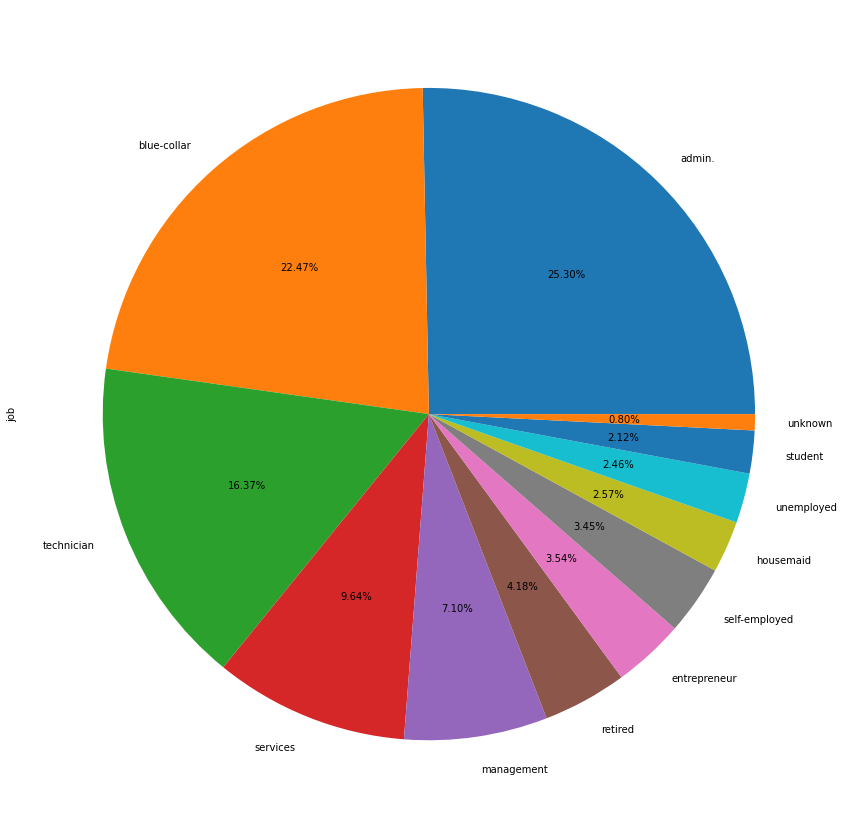

In [19]:
print('univariate analysis of indivual job')
print('-----------------------------------')
print(bank_df['job'].value_counts())
plt.rcParams['figure.figsize']=(12,6)
bank_df['job'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(20,15))
plt.show()

### Observation :

From the above barchart we can clearly infer that there are most job holders are admin almost 10400 people are admin.
Then blue-collar and technician job holders are almost 9000 and 6700 respectively.count of housemaid ,unemployed and students are almost same. And unknown are very less.

univariate analysis of marital status
-------------------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


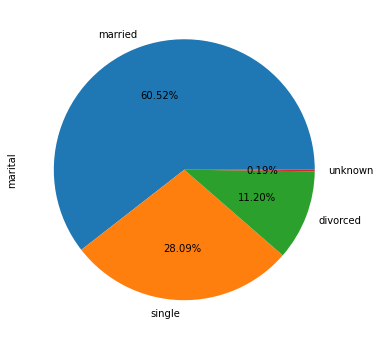

In [20]:
print('univariate analysis of marital status')
print('-------------------------------')
print(bank_df['marital'].value_counts())
bank_df['marital'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

### Observation:

All most 25000 people are married in this campaign,also single and devorced peopleare ther.
Unknown marital status is very less about 80

univariate analysis of educational status
-----------------------------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


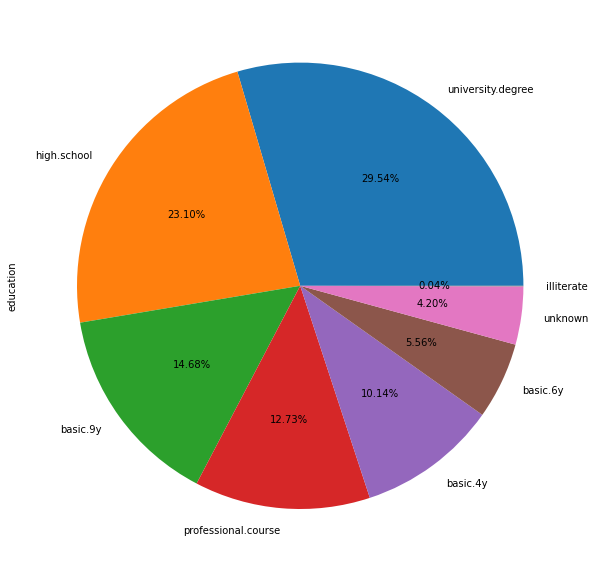

In [21]:
print('univariate analysis of educational status')
print('-----------------------------------------')
print(bank_df['education'].value_counts())
plt.figure(figsize=(10,12))
bank_df['education'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

### Observation :

In this educational field the highly qualified people is most.More than 12000 people has highest university degree.
There is a unknown field and illiterate person which is very less.

univariate analysis of default status
-----------------------------------------
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


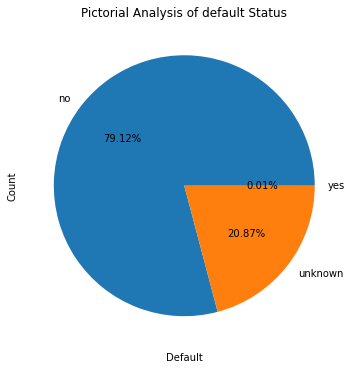

In [21]:
print('univariate analysis of default status')
print('-----------------------------------------')
print(bank_df['default'].value_counts())
bank_df['default'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Pictorial Analysis of default Status')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

### Observation :

there are more than 32000 people has no credit in default.there are very less person who has credit in default.some unknown status are also there we donot have any information about them.

univariate analysis of housing status
-------------------------------------
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


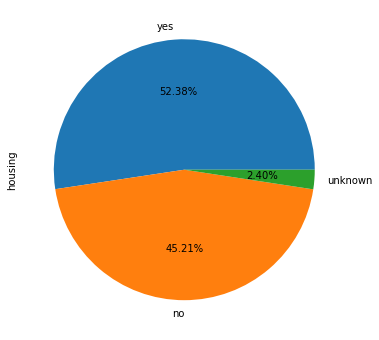

In [21]:
print('univariate analysis of housing status')
print('-------------------------------------')
print(bank_df['housing'].value_counts())
bank_df['housing'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

### Observation :

In [ ]:
There are almost 21000 people who has housing loan. And more than 18000 people has no housing loan .

univariate analysis of loan status
----------------------------------
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


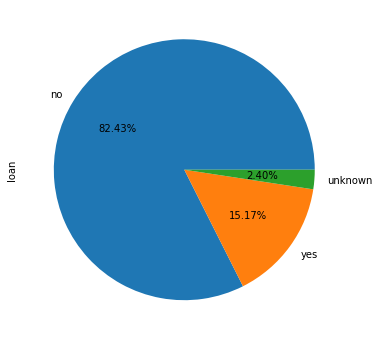

In [22]:
print('univariate analysis of loan status')
print('----------------------------------')
print(bank_df['loan'].value_counts())
bank_df['loan'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

### Observation :

In [ ]:
There are almost 34000 people who has no loan from bank and more than 6000 people has loan from bank

univariate analysis of contact medium
-------------------------------------
cellular     26144
telephone    15044
Name: contact, dtype: int64


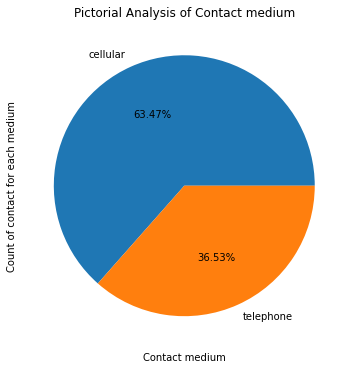

In [24]:
print('univariate analysis of contact medium')
print('-------------------------------------')
print(bank_df['contact'].value_counts())
bank_df['contact'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Pictorial Analysis of Contact medium')
plt.xlabel('Contact medium')
plt.ylabel('Count of contact for each medium')
plt.show()

### Observation:

* There are more than 26000 people who are contacted by mobile and 15000 people contacted by telephone.

univariate analysis of Month Wise status
-----------------------------------------
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


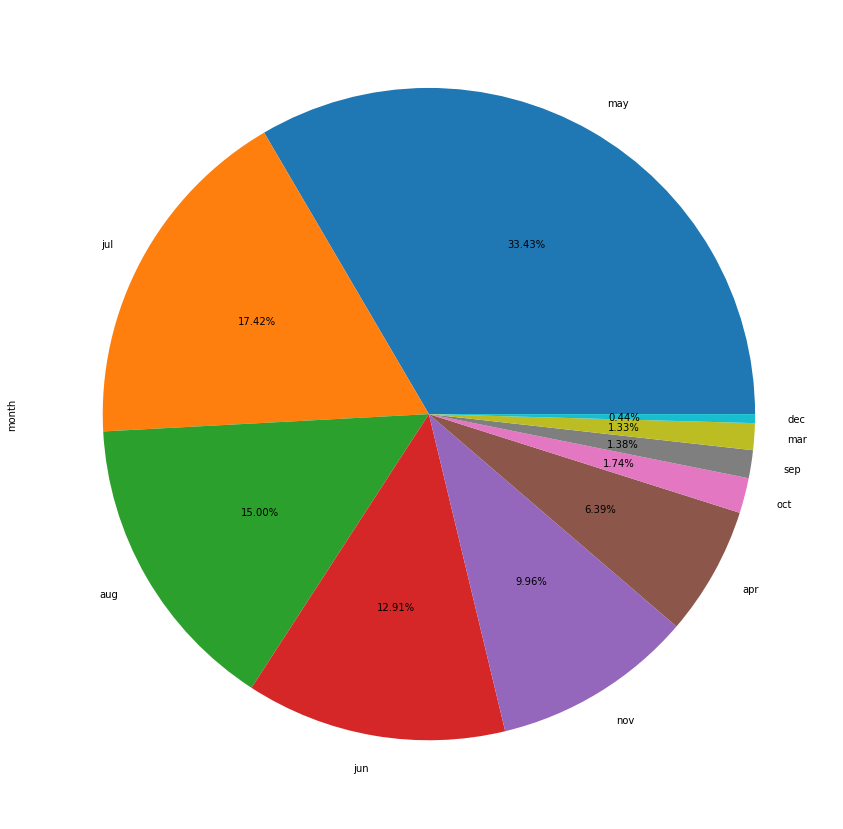

In [23]:
print('univariate analysis of Month Wise status')
print('-----------------------------------------')
print(bank_df['month'].value_counts())
bank_df['month'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(20,15))
plt.show()

### Observation :

Last most contacted month is may almost 13700 contacts made on may after that july and august .And ocober,september,and december are less contacted.

univariate analysis of day of week  status
------------------------------------------
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


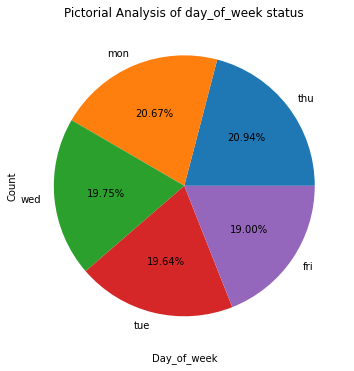

In [29]:
print('univariate analysis of day of week  status')
print('------------------------------------------')
print(bank_df['day_of_week'].value_counts())
bank_df['day_of_week'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Pictorial Analysis of day_of_week status')
plt.xlabel('Day_of_week')
plt.ylabel('Count')
plt.show()

### Observation :

* On thursday of the week the most contact made.But on monday,wednesday and tuesday are almost same number of contacts made.

univariate analysis of poutcome 
--------------------------------
nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


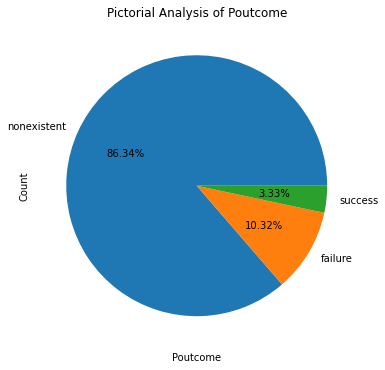

In [30]:
print('univariate analysis of poutcome ')
print('--------------------------------')
print(bank_df['poutcome'].value_counts())
bank_df['poutcome'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Pictorial Analysis of Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Count')
plt.show()

### Observation :

 More than 85% people are belongs to the category nonexistent.In this category success rate is very less.

## Univariate Analysis of our Continuous(Numarical) variable

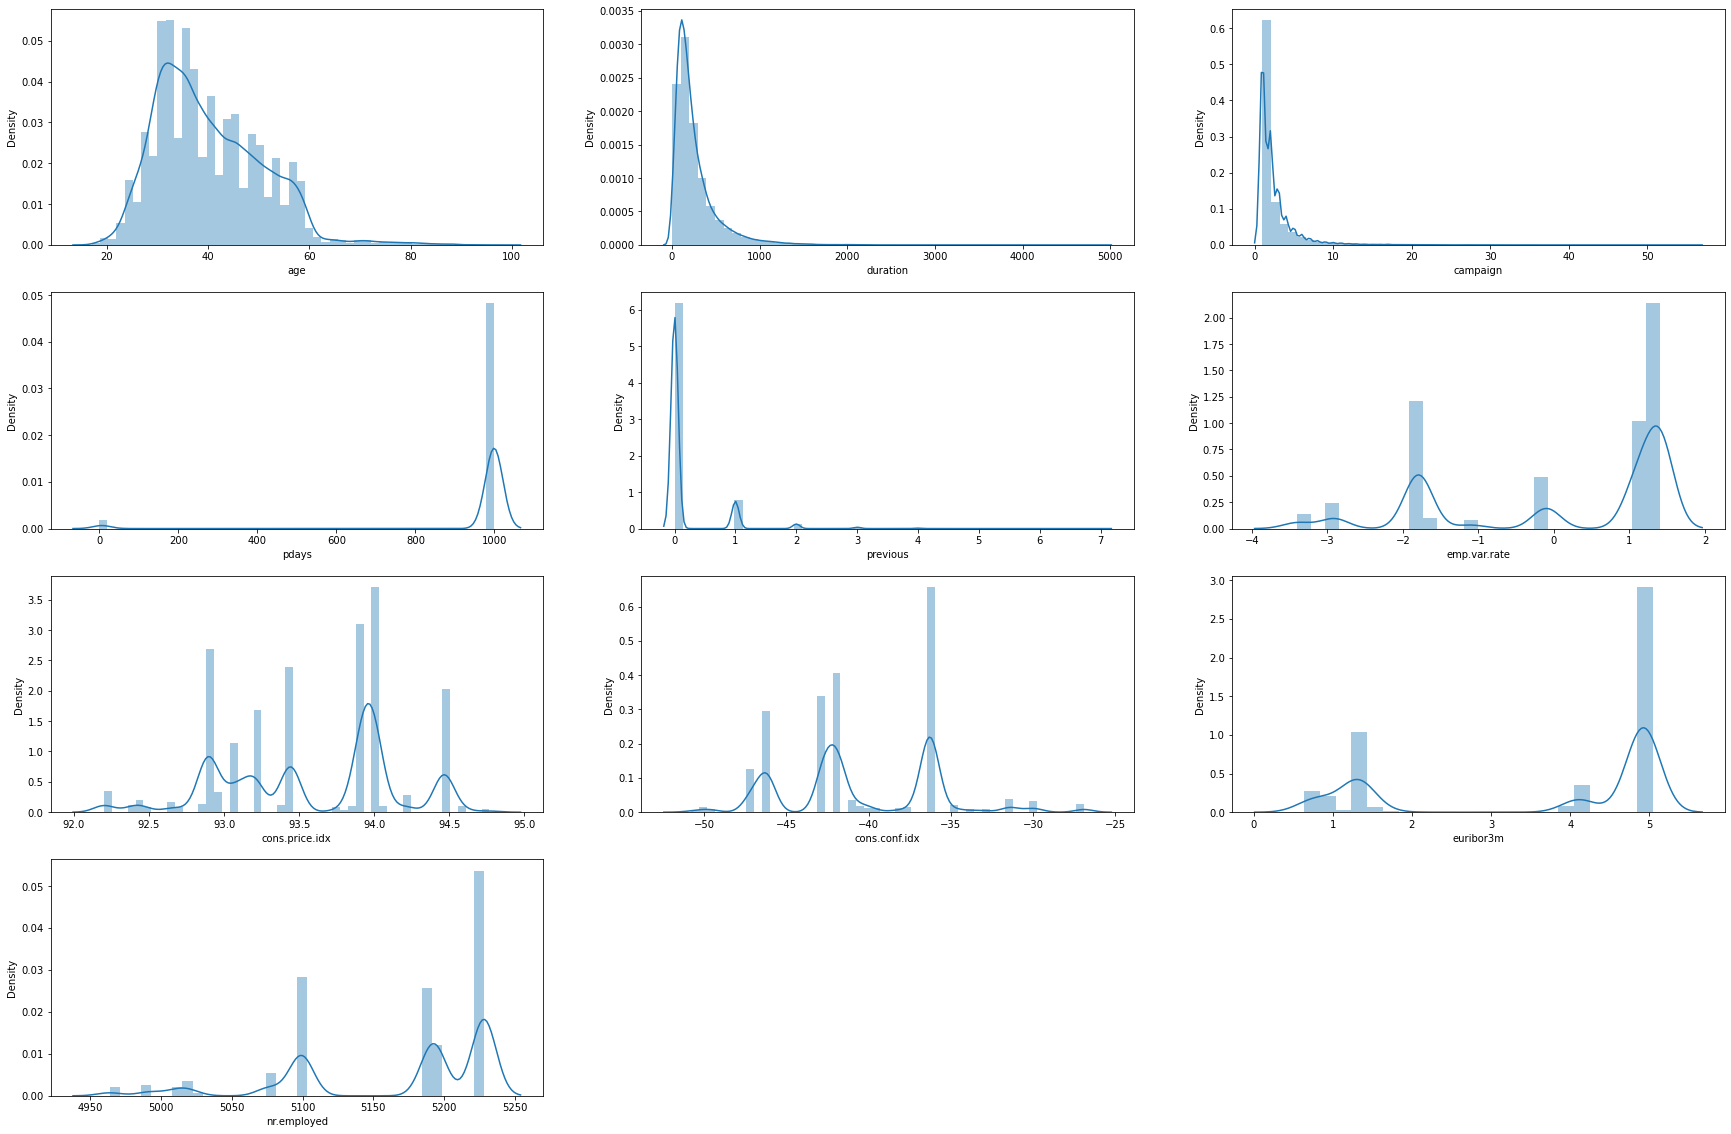

In [29]:
plt.figure(figsize=(30,20))
s=1
for p in numerical_columns:
    plt.subplot(4,3,s)
    sns.distplot(bank_df[p])
    s+=1

### Observation :

. In the age column we can clearly see that most of our clients age is between 30-50 years.andthe   average age is nearly 38 years.
. In the duration column we can see that most of the call duration made by bank is rarely  500   seconds.
. In the campaign columns nearly 1 to 4 times  contacts are made for any clients for this campaign.
. In the pdays column we can clearly see that the most of the clients are not contacted previously fro the campaign.
. Most of the client are not contacted before the campaign through the bank but we can see very few clients are contacted for atleast once.
. We can see there is a high employee variation in the emp.var.rate column rate from which we can say
  that they have made the campaign when there were high shifts in job due to the economic conditions.
. The Consumer price index is good from which we can say the leads where having good price to pay 
  for goods and services may be that could be the reason to stimulate these leads into making a deposit and plant the idea of savings.
. Consumer confidence index is pretty low as we can say they have not much confidence about the ecconomy.
. The 3 month Euribor interest rate is the interest rate from which we can say interest rate are high for lending a loan.
. The number of employee has high peek we can say the income index are also high so that this campaign traget the employed person for saying yes.

### Checking The Class Imbalace :

In [30]:
bank_df['y'].value_counts(normalize=True)*100

0    88.734583
1    11.265417
Name: y, dtype: float64

Text(0, 0.5, 'Count')

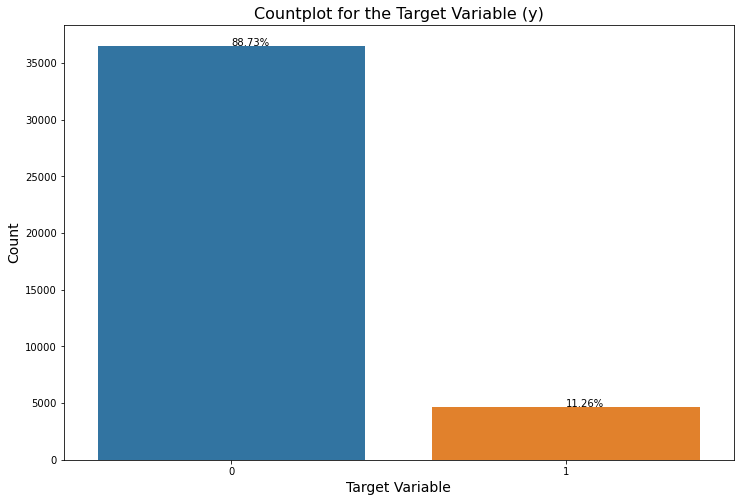

In [31]:
#Let's analyse the our responsive variable 'y'
plt.figure(figsize=(12,8))
sns.countplot(bank_df['y'])
plt.text(x=1,y=bank_df['y'].value_counts()[1]+1,
        s='11.26%');
plt.text(x=0,y=bank_df['y'].value_counts()[0]+1,
        s='88.73%');

plt.title('Countplot for the Target Variable (y)',fontsize=16)
plt.xlabel('Target Variable',fontsize=14)
plt.ylabel('Count',fontsize=14)

### Observation :

In this target column 1 is yes and 0 is no that's mean 88.73% clients has not subscribed the term of deposit.But 11.26% client has subscribed the term of deposit.

## Now We Can get into the Bivariate Analysis:

Now ,let's start Bi-variate Analysis. Here we are going to analyse 2 variables trying to find any relation between them.

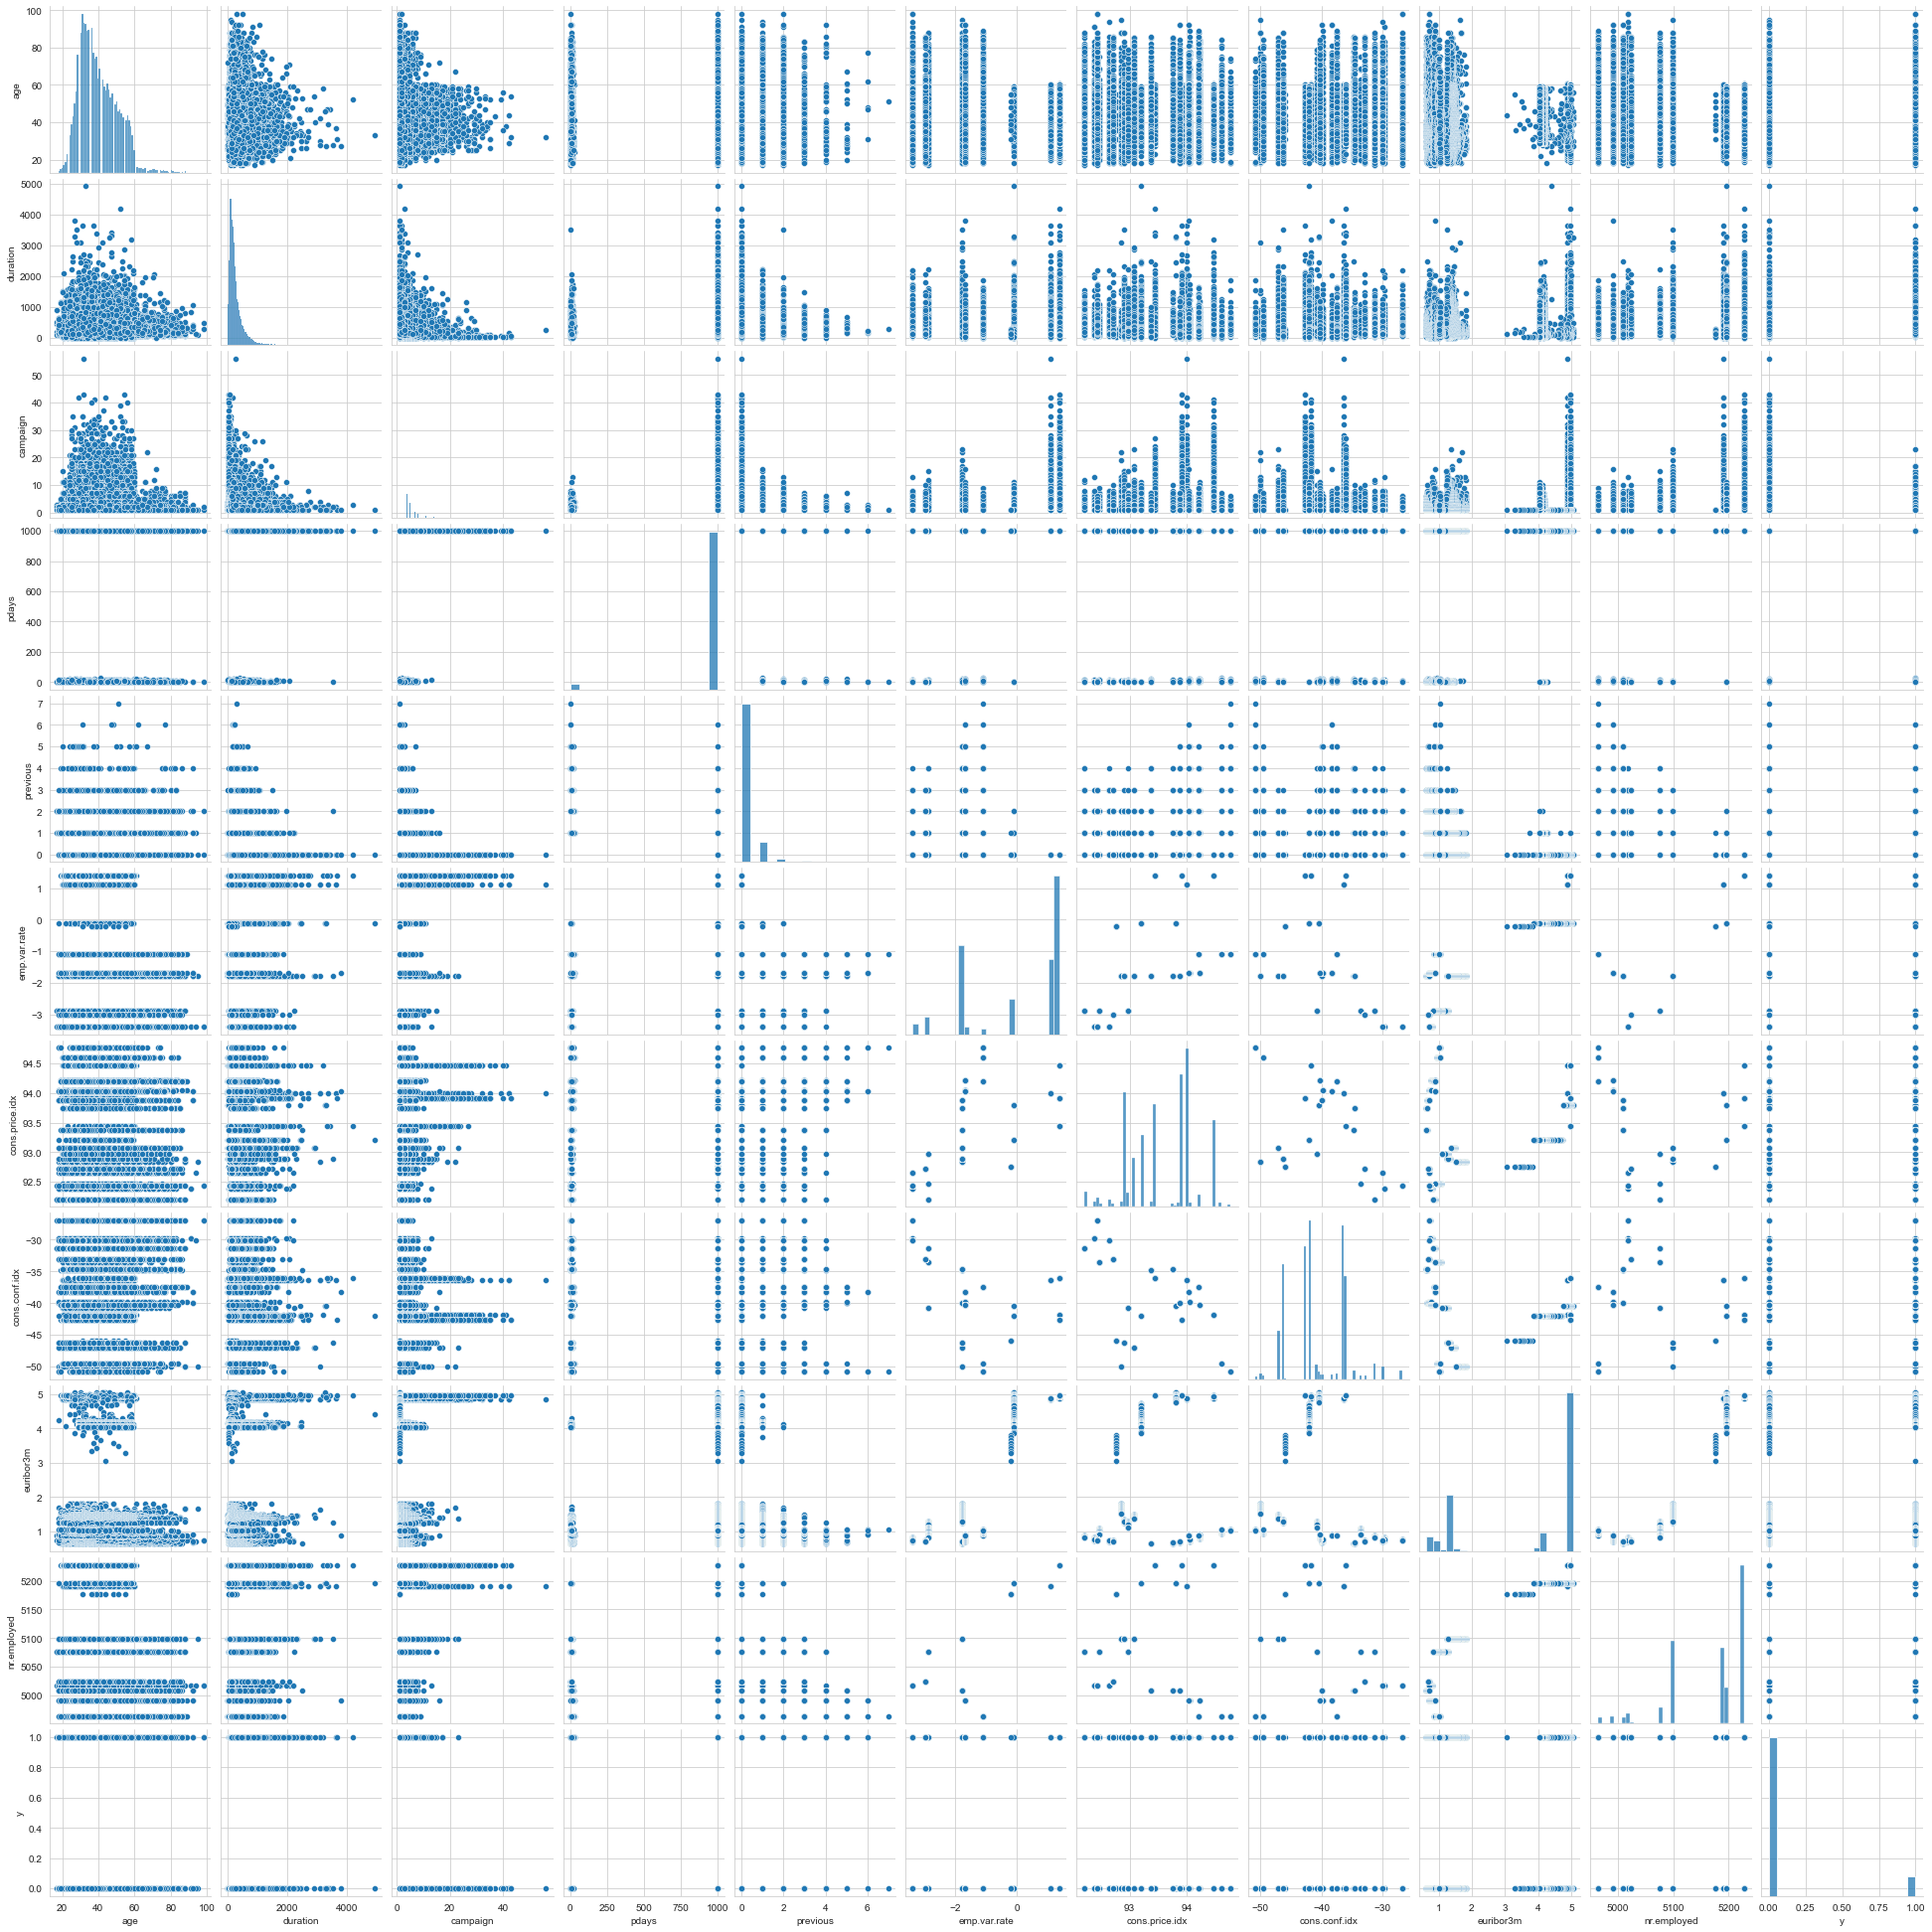

In [32]:
#starting with the pair plot
sns.set_style('whitegrid')
sns.pairplot(data=bank_df)

<AxesSubplot:>

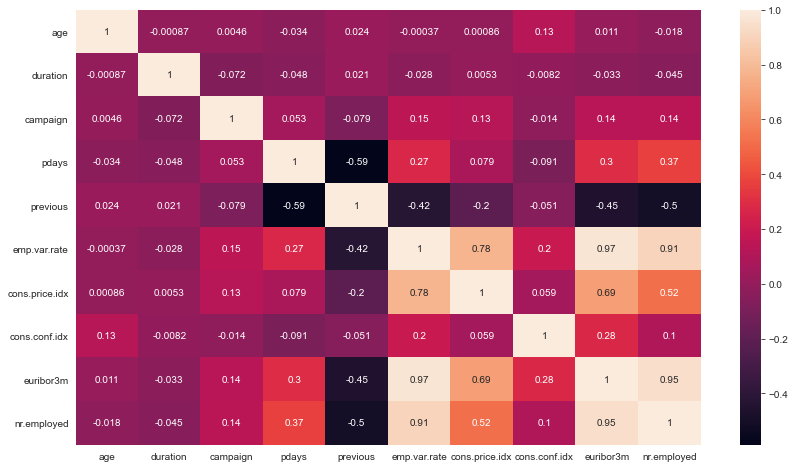

In [33]:
plt.figure(figsize=(14,8))
sns.heatmap(bank_df.corr(),annot=True)

### Observation :

.Independent variables are correlated with each other.So we can say there are Multicolinearity presence.

.The Employee variation rates are highly correlated with the number of employees.

.The number of employees are highly correlated with the bank Interest rate.

.Consumer price index is highly correlated with employee variation rate also highly correlated   with the bank interest rate .

## Categorical-Continuous Analysis

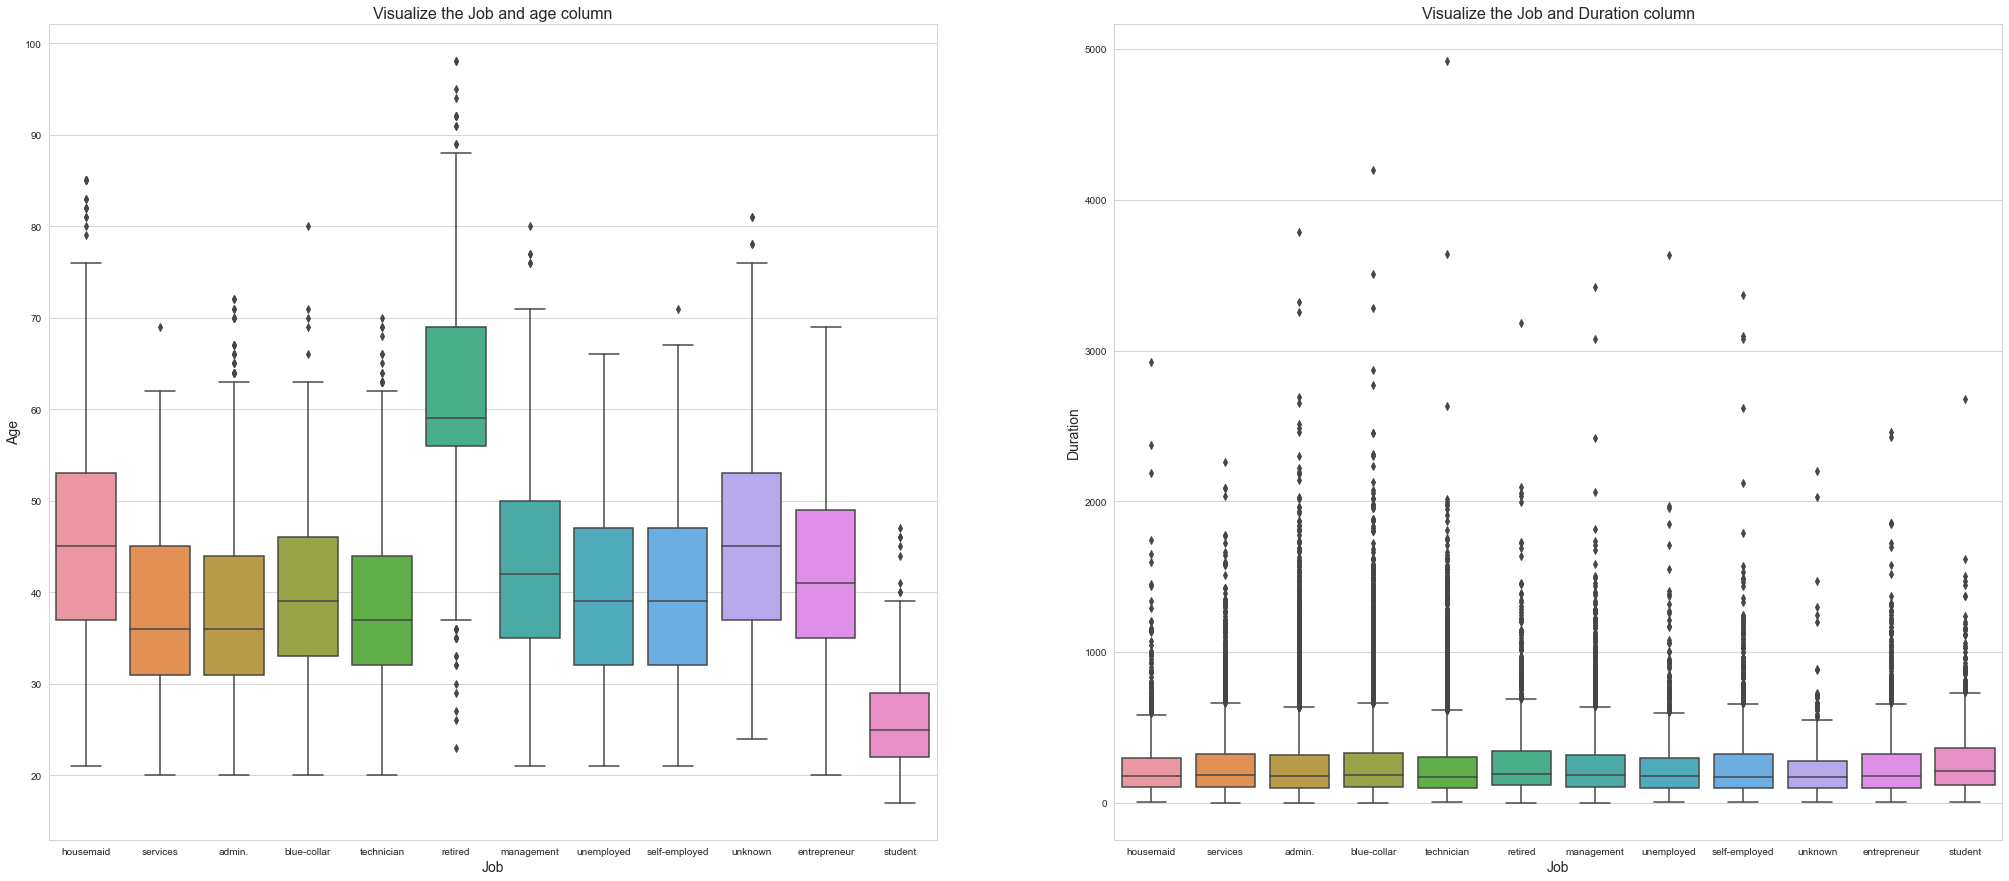

In [34]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='job',y='age',data=bank_df)
plt.title('Visualize the Job and age column',fontsize=16)
plt.xlabel('Job',fontsize=14)
plt.ylabel('Age',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='job',y='duration',data=bank_df)
plt.title('Visualize the Job and Duration column',fontsize=16)
plt.xlabel('Job',fontsize=14)
plt.ylabel('Duration',fontsize=14)

plt.show()


### Observation :

. Retired clients age is mosly 60 t0 70 years in our campaign.the unemployed and self employed,blue-collar,service,admin,technician,management,unknown and enterpreneur clients are almost from (30-50)age group.clients 20 to 25 age groups are students.from the age group 38 to 58 are housemaid.


. For every job holders call duration is almost same for the campaign its nearly 100 to 300 seconds.retiered person ,students enterpreneur self employeed ,blue-collar clients call duration are slightly high than other.But everyones average call duration are pretty same as per our analysis.


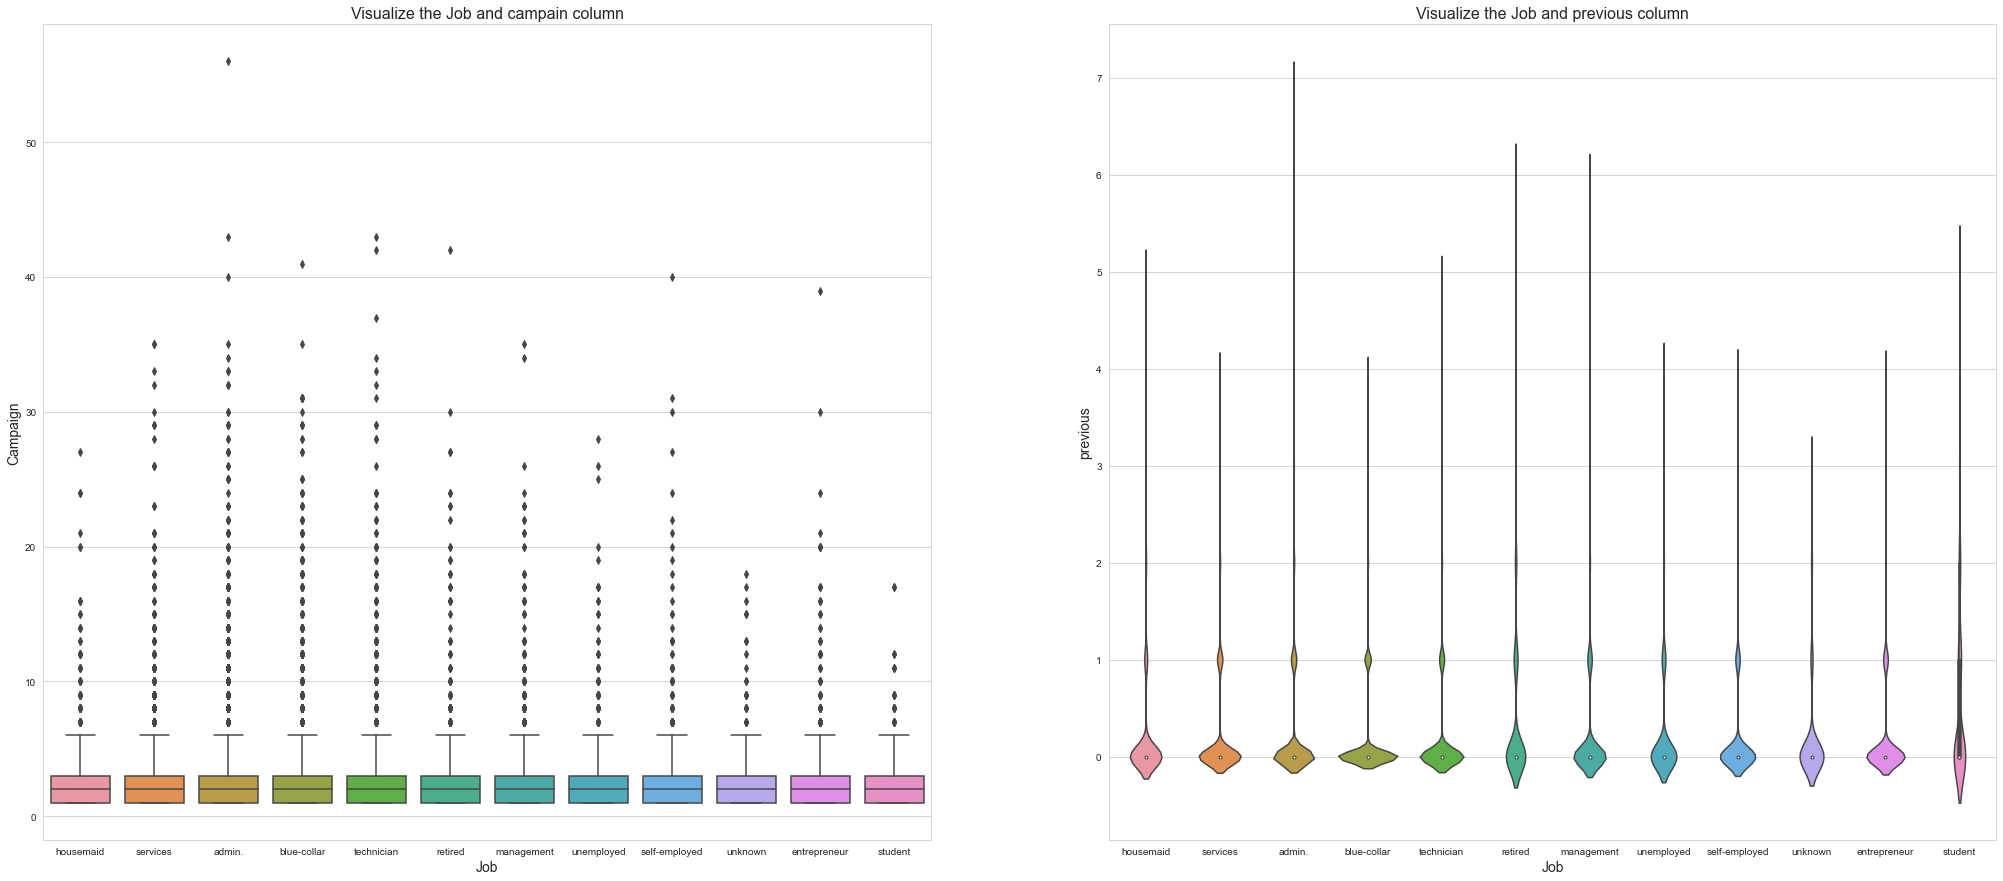

In [35]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='job',y='campaign',data=bank_df)
plt.title('Visualize the Job and campain column',fontsize=16)
plt.xlabel('Job',fontsize=14)
plt.ylabel('Campaign',fontsize=14)

plt.subplot(1,2,2)
sns.violinplot(x='job',y='previous',data=bank_df)
plt.title('Visualize the Job and previous column',fontsize=16)
plt.xlabel('Job',fontsize=14)
plt.ylabel('previous',fontsize=14)

plt.show()


### Observation :

* For Every clients number of contact are almost same its about 1 to 2 times nearly they are contacted.On an average every clients are contacted once.


* Before this campaign most of the clients are contacted previously for any other campaign.

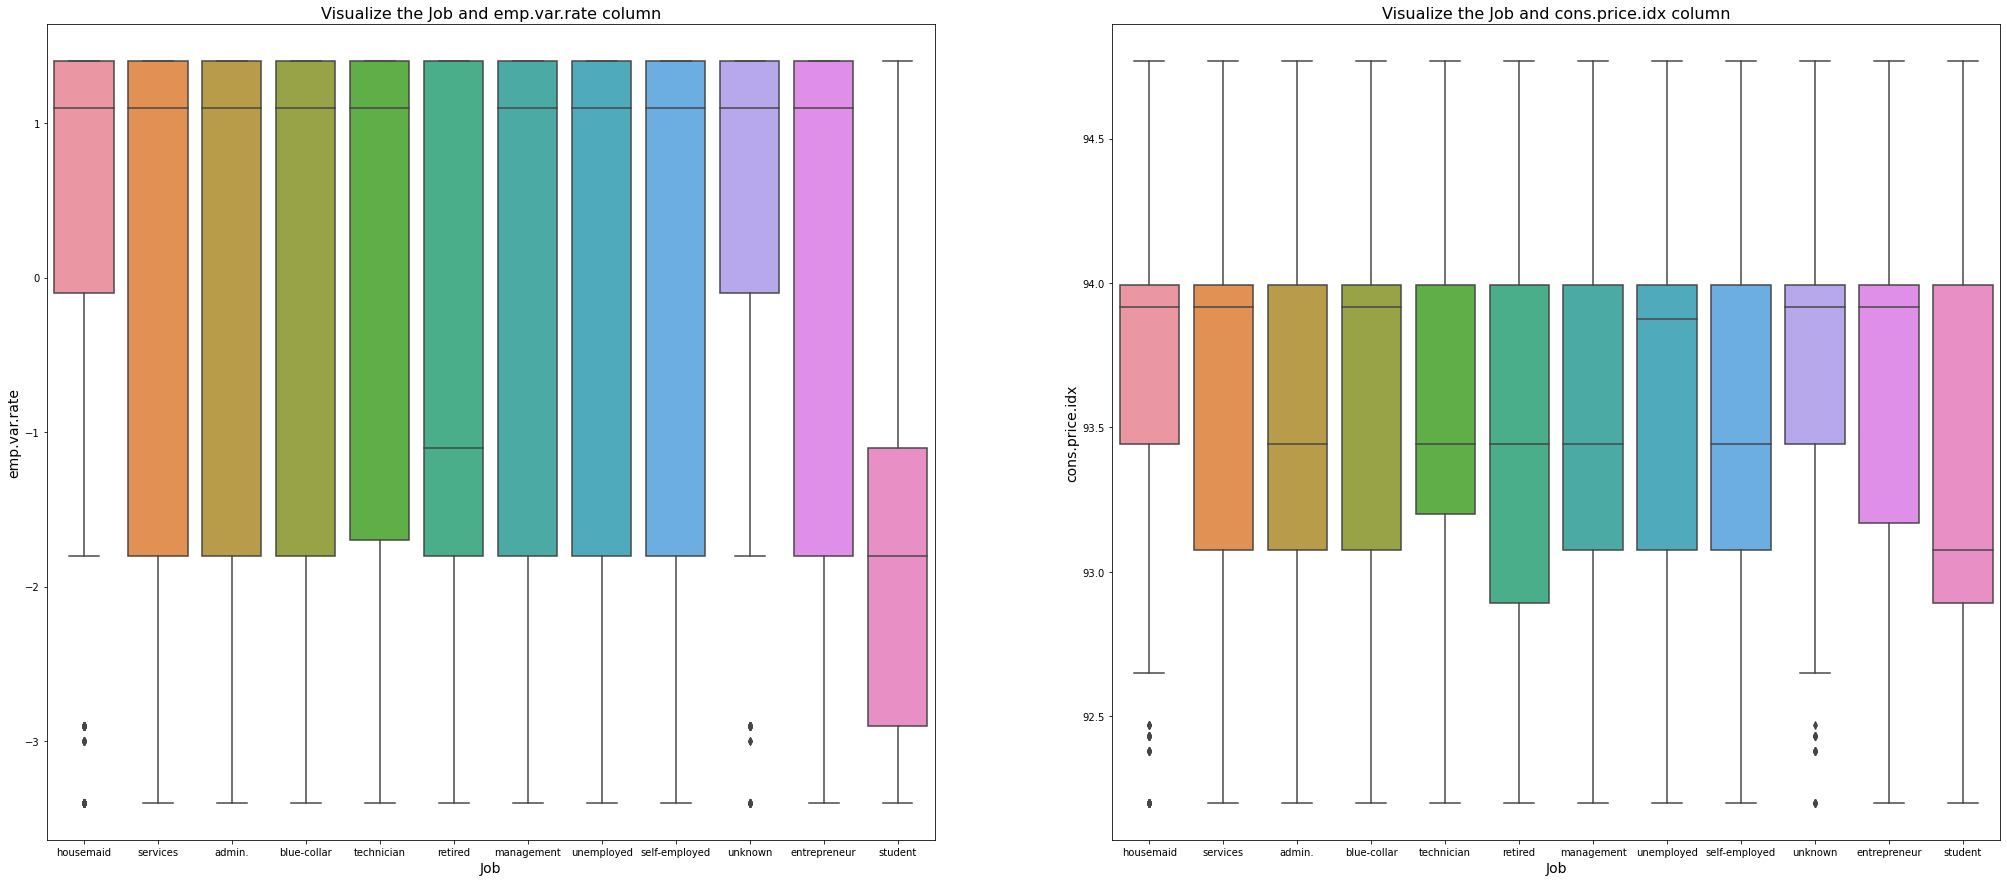

In [27]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='job',y='emp.var.rate',data=bank_df)
plt.title('Visualize the Job and emp.var.rate column',fontsize=16)
plt.xlabel('Job',fontsize=14)
plt.ylabel('emp.var.rate',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='job',y='cons.price.idx',data=bank_df)
plt.title('Visualize the Job and cons.price.idx column',fontsize=16)
plt.xlabel('Job',fontsize=14)
plt.ylabel('cons.price.idx',fontsize=14)

plt.show()

### Observation :

* Employee variation rate is pretty high for every individual type of job.only students has no employee variation rate.

* the median consumer price index are almost same for housemaid,service,blue-collar,unemployeed,unknown and enterpreneur admin,technician,retired,management,self-employed are also same consumer price index.without student and retiered person every othe jobholders have consumer index between 93 to 95.

Text(0, 0.5, 'cons.conf.idx')

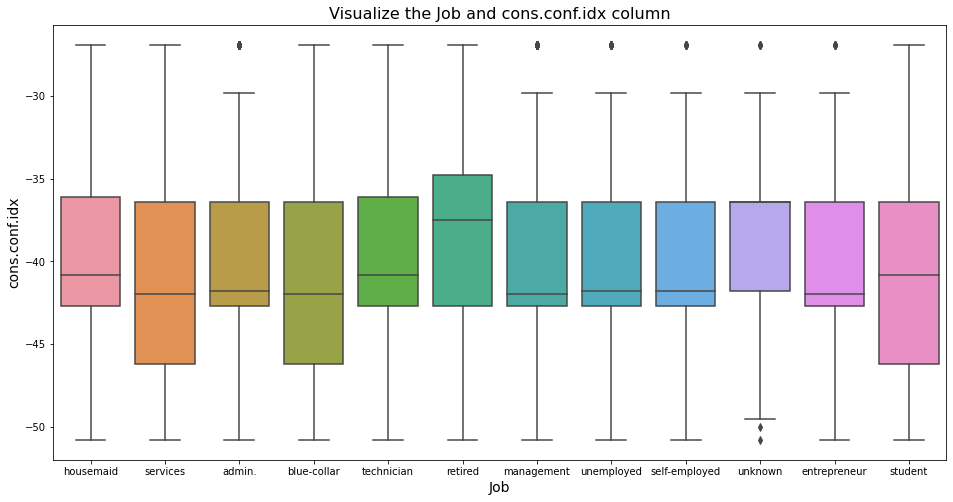

In [39]:
sns.boxplot(x='job',y='cons.conf.idx',data=bank_df)
plt.title('Visualize the Job and cons.conf.idx column',fontsize=16)
plt.xlabel('Job',fontsize=14)
plt.ylabel('cons.conf.idx',fontsize=14)

### Observation :

* Monthly consumer confidence index are pretty high for retired person othe than that every individuals relied almost same consume monthly confidence index

Text(0.5, 0, 'nr.employed')

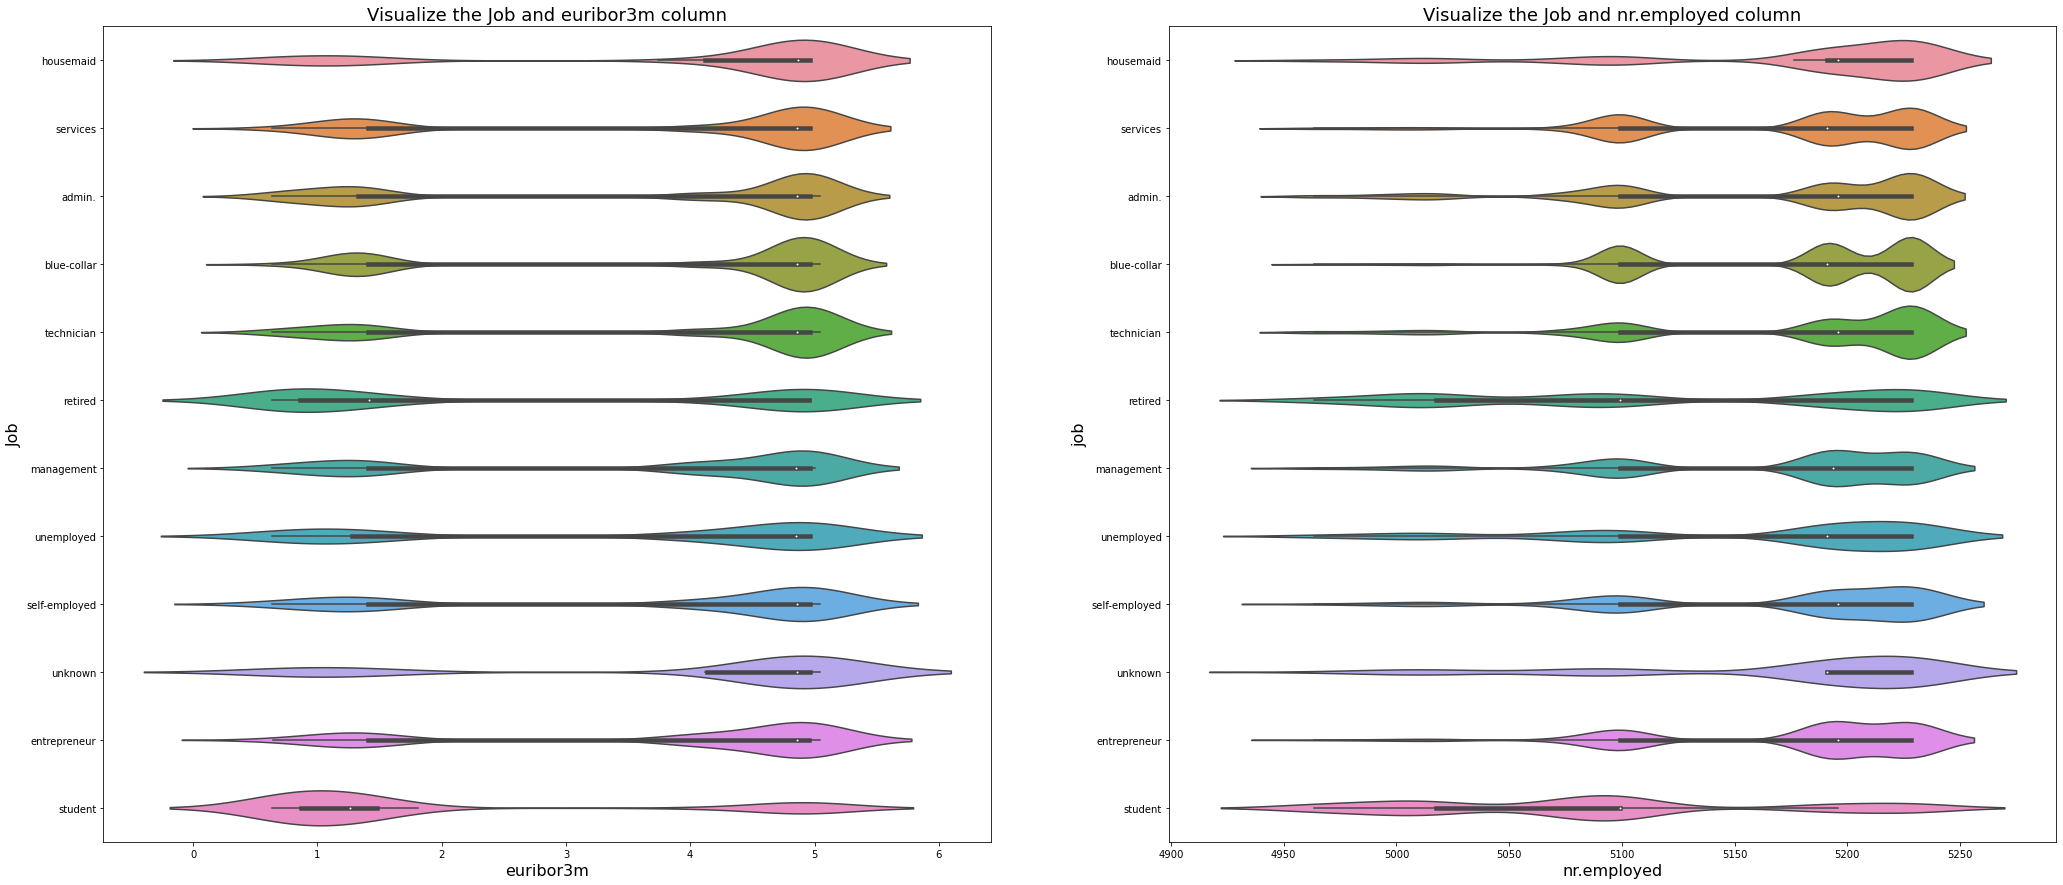

In [40]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.violinplot(y='job',x='euribor3m',data=bank_df)
plt.title('Visualize the Job and euribor3m column',fontsize=18)
plt.ylabel('Job',fontsize=16)
plt.xlabel('euribor3m',fontsize=16)

plt.subplot(1,2,2)
sns.violinplot(y='job',x='nr.employed',data=bank_df)
plt.title('Visualize the Job and nr.employed column',fontsize=18)
plt.ylabel('job',fontsize=16)
plt.xlabel('nr.employed',fontsize=16)


### Observation :

* For students the interest ret is very low but other than student every job holder has high banking interest rate

* Quarterly the most number of employees in housemaid,technician, admin ,blue-collar ,and service section.

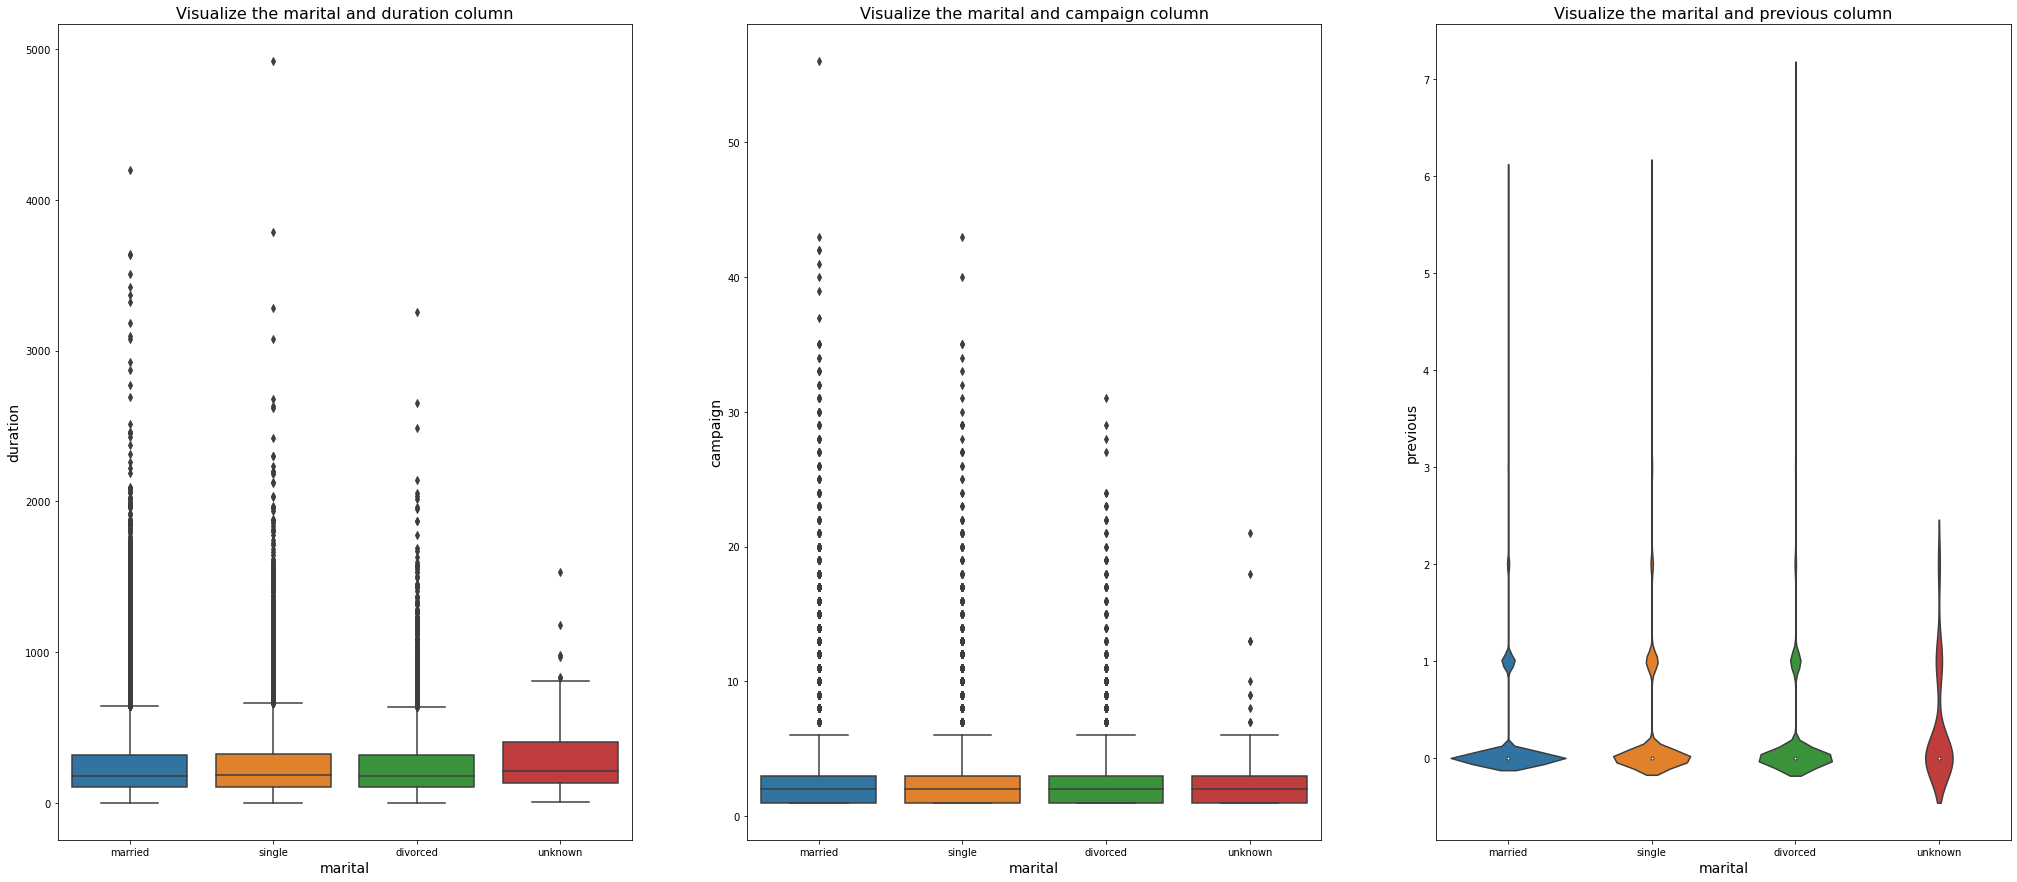

In [30]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.boxplot(x='marital',y='duration',data=bank_df)
plt.title('Visualize the marital and duration column',fontsize=16)
plt.xlabel('marital',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(x='marital',y='campaign',data=bank_df)
plt.title('Visualize the marital and campaign column',fontsize=16)
plt.xlabel('marital',fontsize=14)
plt.ylabel('campaign',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='marital',y='previous',data=bank_df)
plt.title('Visualize the marital and previous column',fontsize=16)
plt.xlabel('marital',fontsize=14)
plt.ylabel('previous',fontsize=14)

plt.show()


### Observation :

* With every marital status the call duration are almost same.The median call duration time is nealry 100 seconds.

* The bank contacted married ,single or divorced person and also the unknown person 1 to 20  times nearly.

* Before this campaign most of the person belongs to this marital status category not contacted for any other campaign some people cabn be contacted may be once.

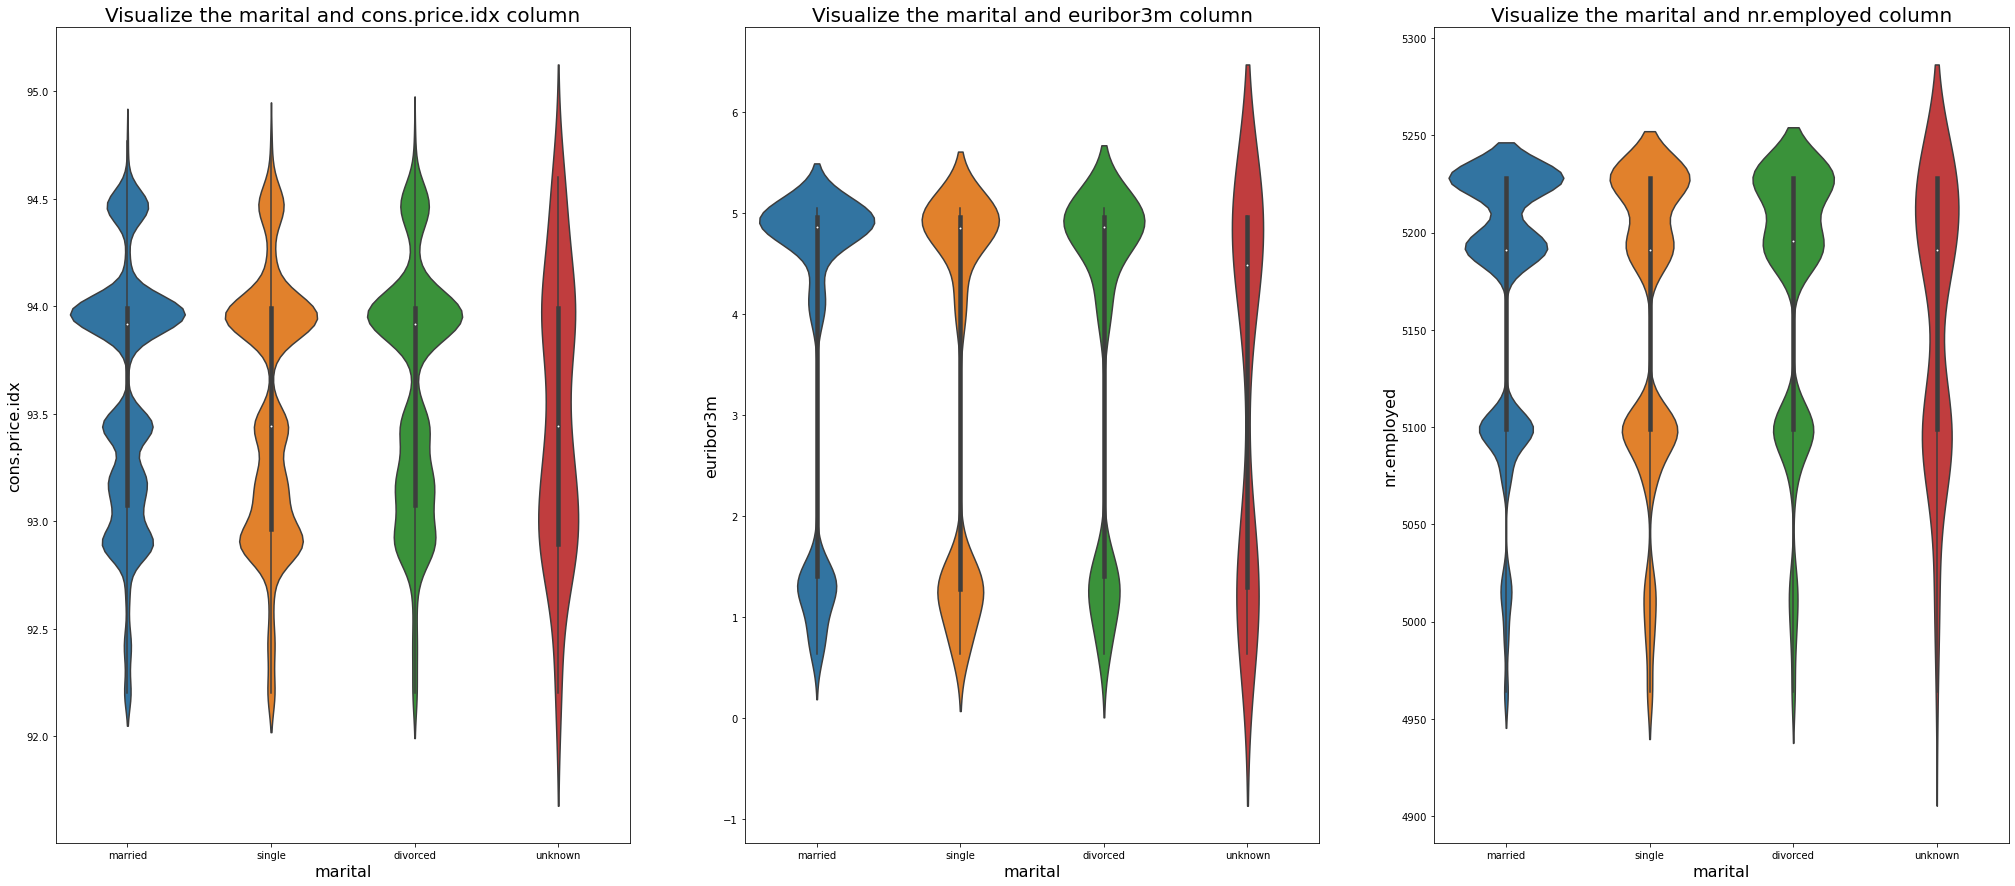

In [44]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='marital',y='cons.price.idx',data=bank_df)
plt.title('Visualize the marital and cons.price.idx column',fontsize=20)
plt.xlabel('marital',fontsize=16)
plt.ylabel('cons.price.idx',fontsize=16)

plt.subplot(1,3,2)
sns.violinplot(x='marital',y='euribor3m',data=bank_df)
plt.title('Visualize the marital and euribor3m column',fontsize=20)
plt.xlabel('marital',fontsize=16)
plt.ylabel('euribor3m',fontsize=16)

plt.subplot(1,3,3)
sns.violinplot(x='marital',y='nr.employed',data=bank_df)
plt.title('Visualize the marital and nr.employed column',fontsize=20)
plt.xlabel('marital',fontsize=16)
plt.ylabel('nr.employed',fontsize=16)

plt.show()

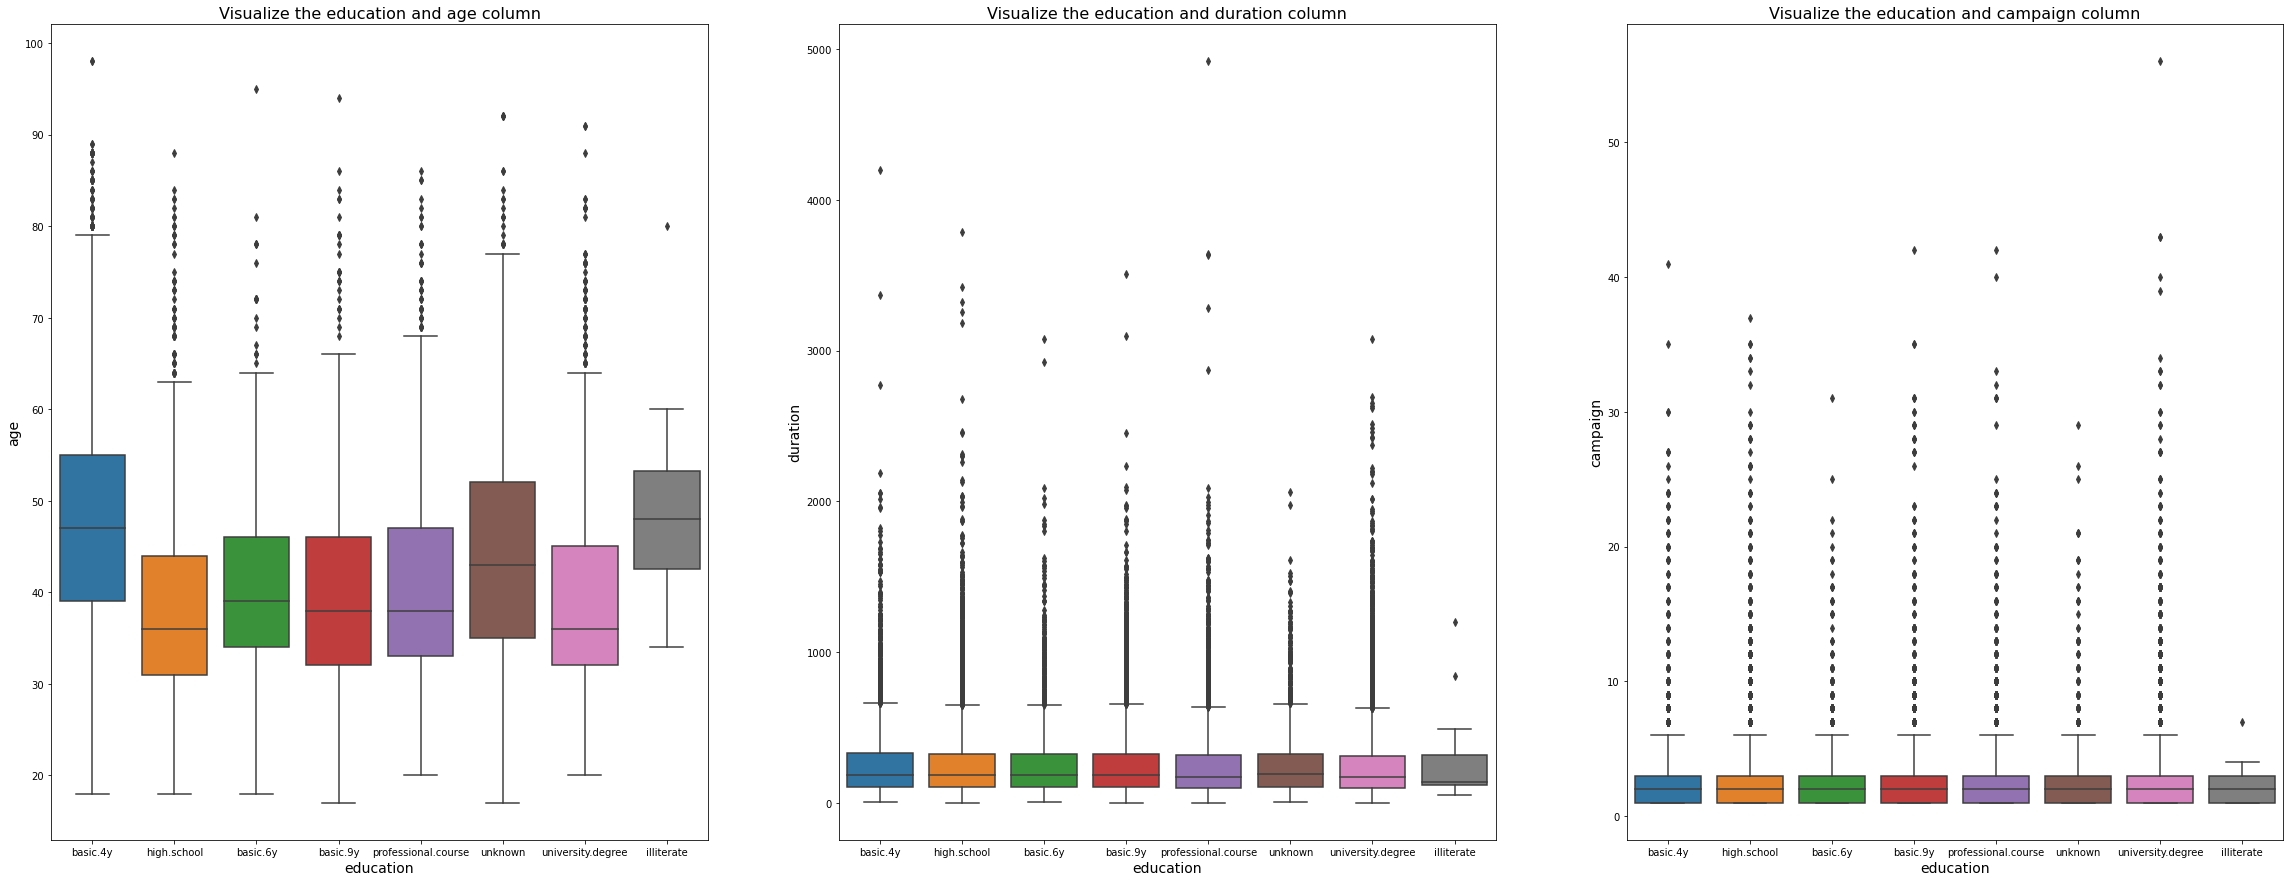

In [32]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.boxplot(x='education',y='age',data=bank_df)
plt.title('Visualize the education and age column',fontsize=16)
plt.xlabel('education',fontsize=14)
plt.ylabel('age',fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(x='education',y='duration',data=bank_df)
plt.title('Visualize the education and duration column',fontsize=16)
plt.xlabel('education',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,3,3)
sns.boxplot(x='education',y='campaign',data=bank_df)
plt.title('Visualize the education and campaign column',fontsize=16)
plt.xlabel('education',fontsize=14)
plt.ylabel('campaign',fontsize=14)

plt.show()


* most of the clients between 40 to 55 years age besic 4y pass.The clients of age between 32 to 45 who has educational digree of high scool,besic 6y,besic 9y and proffessional course.clients who has university digrees relies on the age group of 30 to 42the median age of besic 4y is almost 48 and median age of university digree clients 35.there are some illeterate person who are 30 to 40 yrs age.

* call duration from bank with every educational baground are almost same.

* bank has not contacted many times with any clients more than 1 or 2 during this campaign.

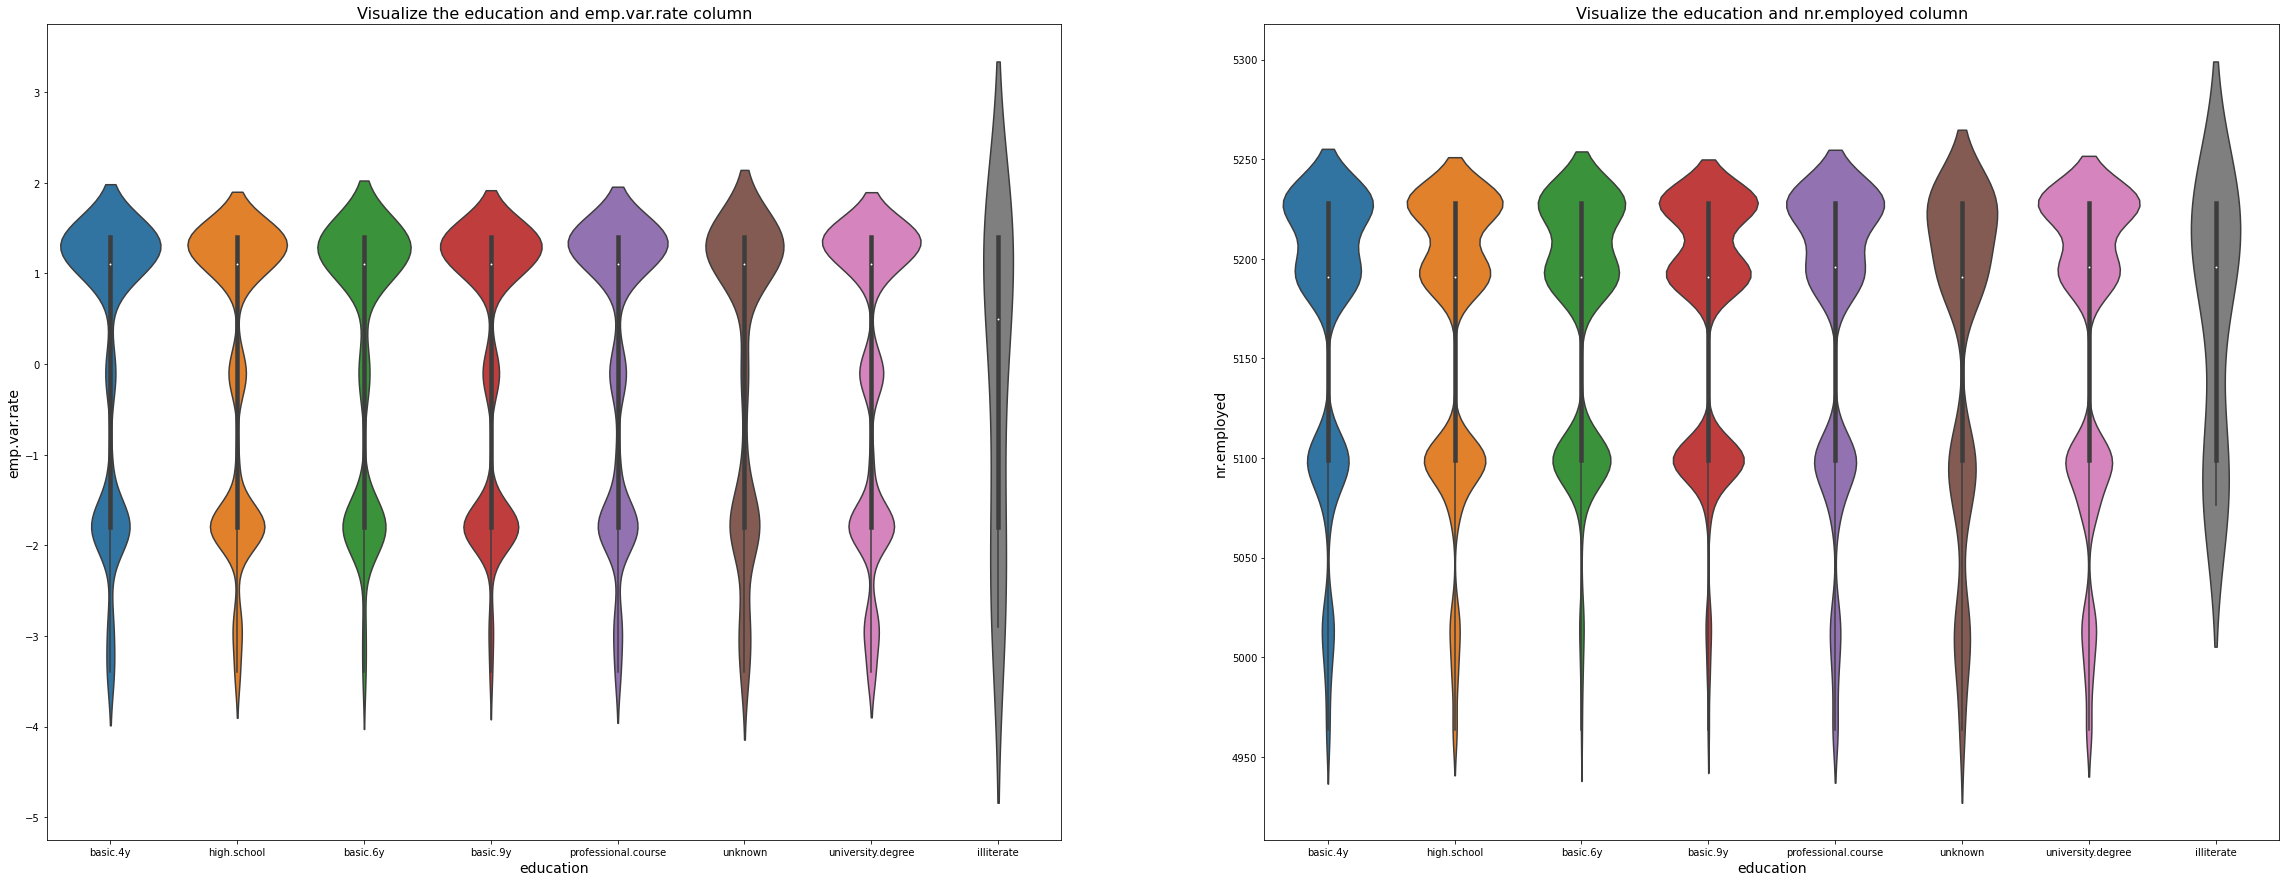

In [33]:
plt.figure(figsize=(40,15))

plt.subplot(1,2,1)
sns.violinplot(x='education',y='emp.var.rate',data=bank_df)
plt.title('Visualize the education and emp.var.rate column',fontsize=16)
plt.xlabel('education',fontsize=14)
plt.ylabel('emp.var.rate',fontsize=14)

plt.subplot(1,2,2)
sns.violinplot(x='education',y='nr.employed',data=bank_df)
plt.title('Visualize the education and nr.employed column',fontsize=16)
plt.xlabel('education',fontsize=14)
plt.ylabel('nr.employed',fontsize=14)

plt.show()


* without any illiterate client the employee variation rate is pretty high for every educational baground.

* From education baground high number of employees join in every quarter.

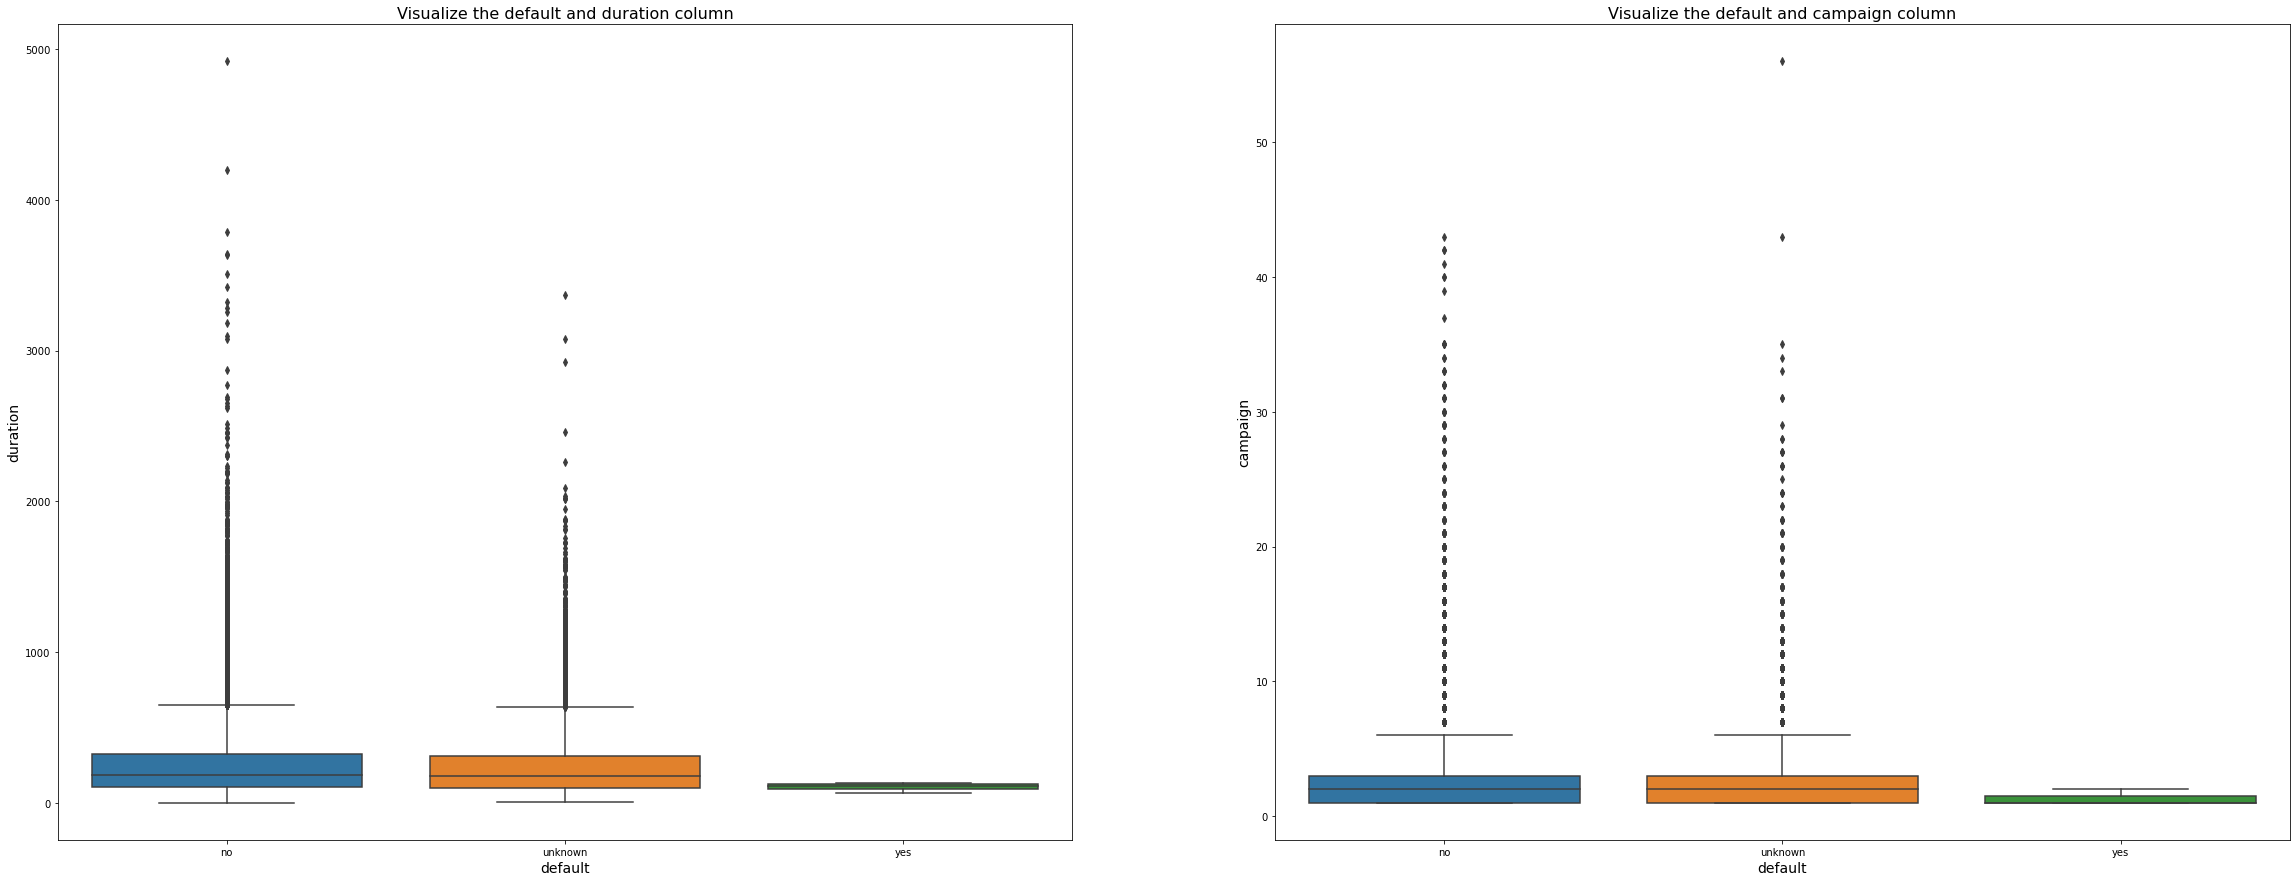

In [35]:
plt.figure(figsize=(40,15))

plt.subplot(1,2,1)
sns.boxplot(x='default',y='duration',data=bank_df)
plt.title('Visualize the default and duration column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='default',y='campaign',data=bank_df)
plt.title('Visualize the default and campaign column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('campaign',fontsize=14)

plt.show()

* Who are not credid defaulter hasbeen contacted from bank. but the credit defaulter persons are not contacted from bank during this campaign.there are some clients are contacted for the same but their status are unknown,don't know either they are defaulter or not.call duration was prety high for person who are not credit defaulter.



* Bank contact most of the clients for 1 to 2 times who are not credit dedefaulter few person are contacted more times during the campaign . also whose status is unknown they are also contacted for 1 or 2 times.


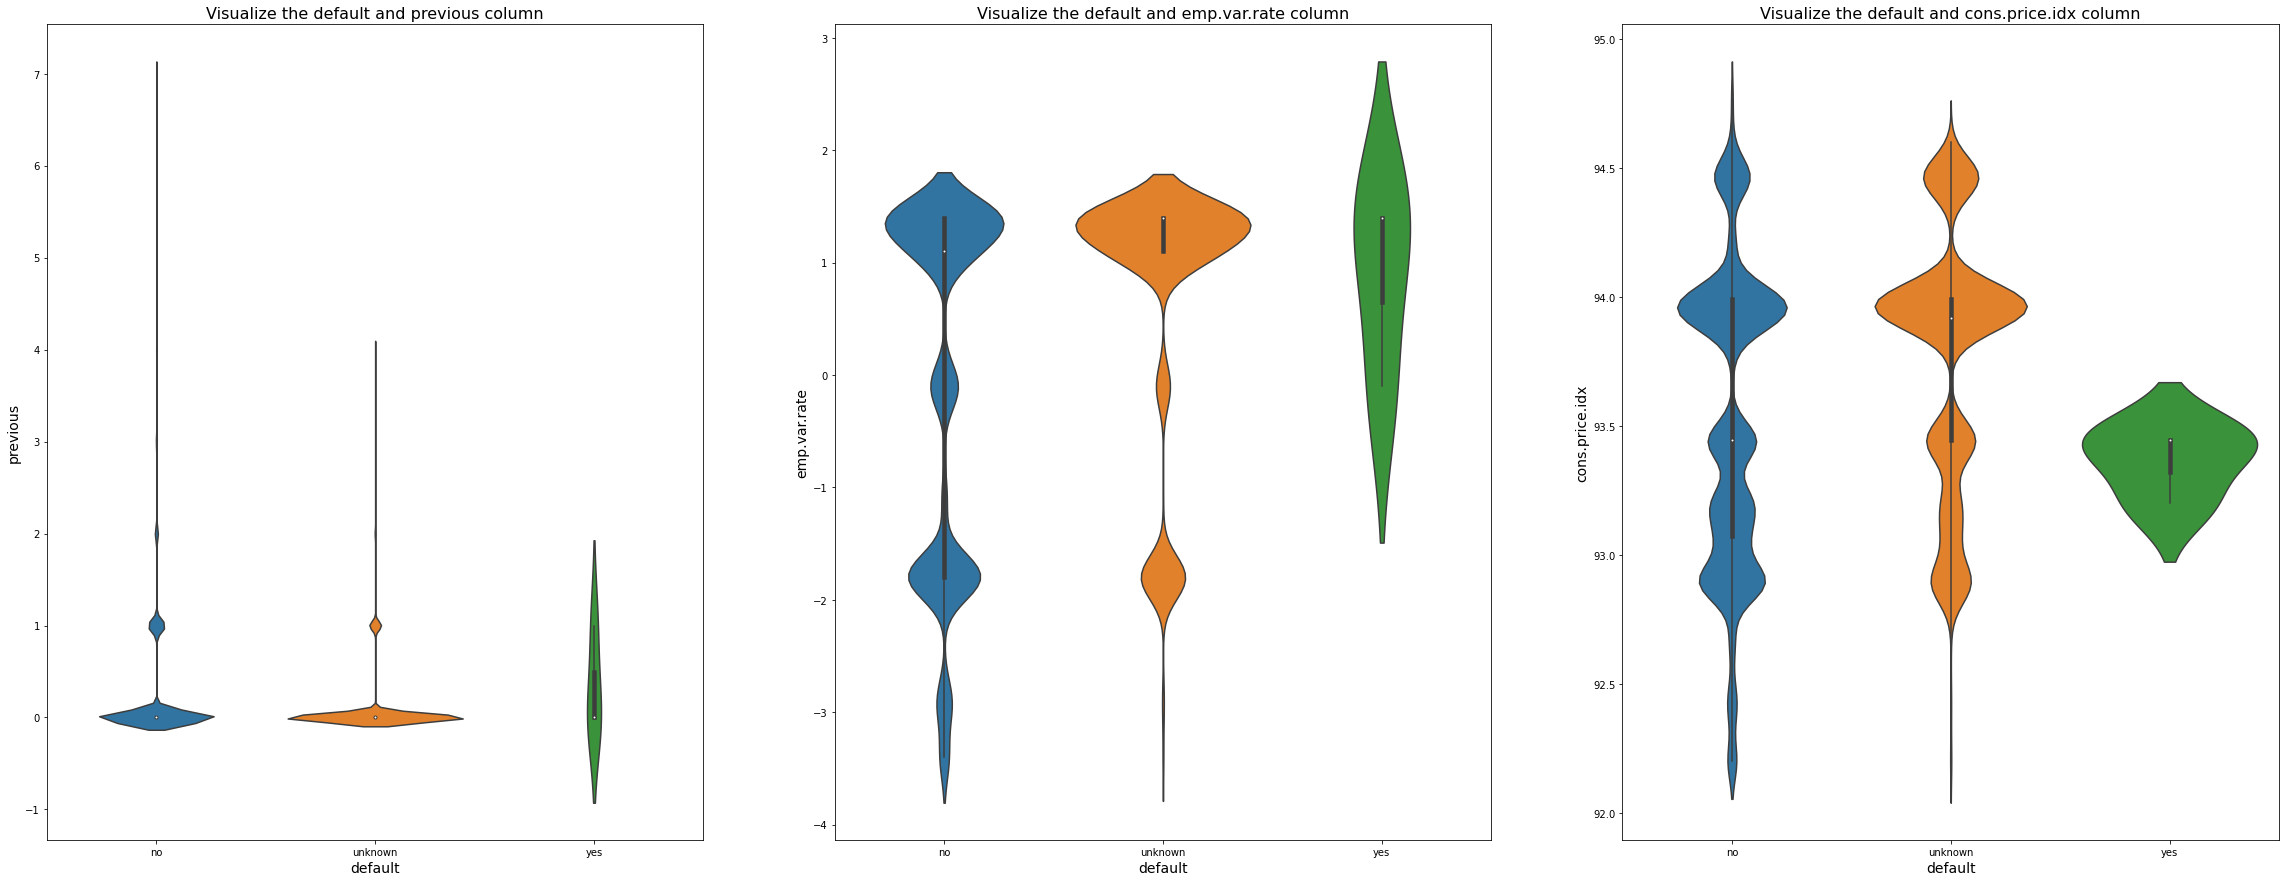

In [37]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.violinplot(x='default',y='previous',data=bank_df)
plt.title('Visualize the default and previous column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('previous',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='default',y='emp.var.rate',data=bank_df)
plt.title('Visualize the default and emp.var.rate column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('emp.var.rate',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='default',y='cons.price.idx',data=bank_df)
plt.title('Visualize the default and cons.price.idx column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('cons.price.idx',fontsize=14)

plt.show()

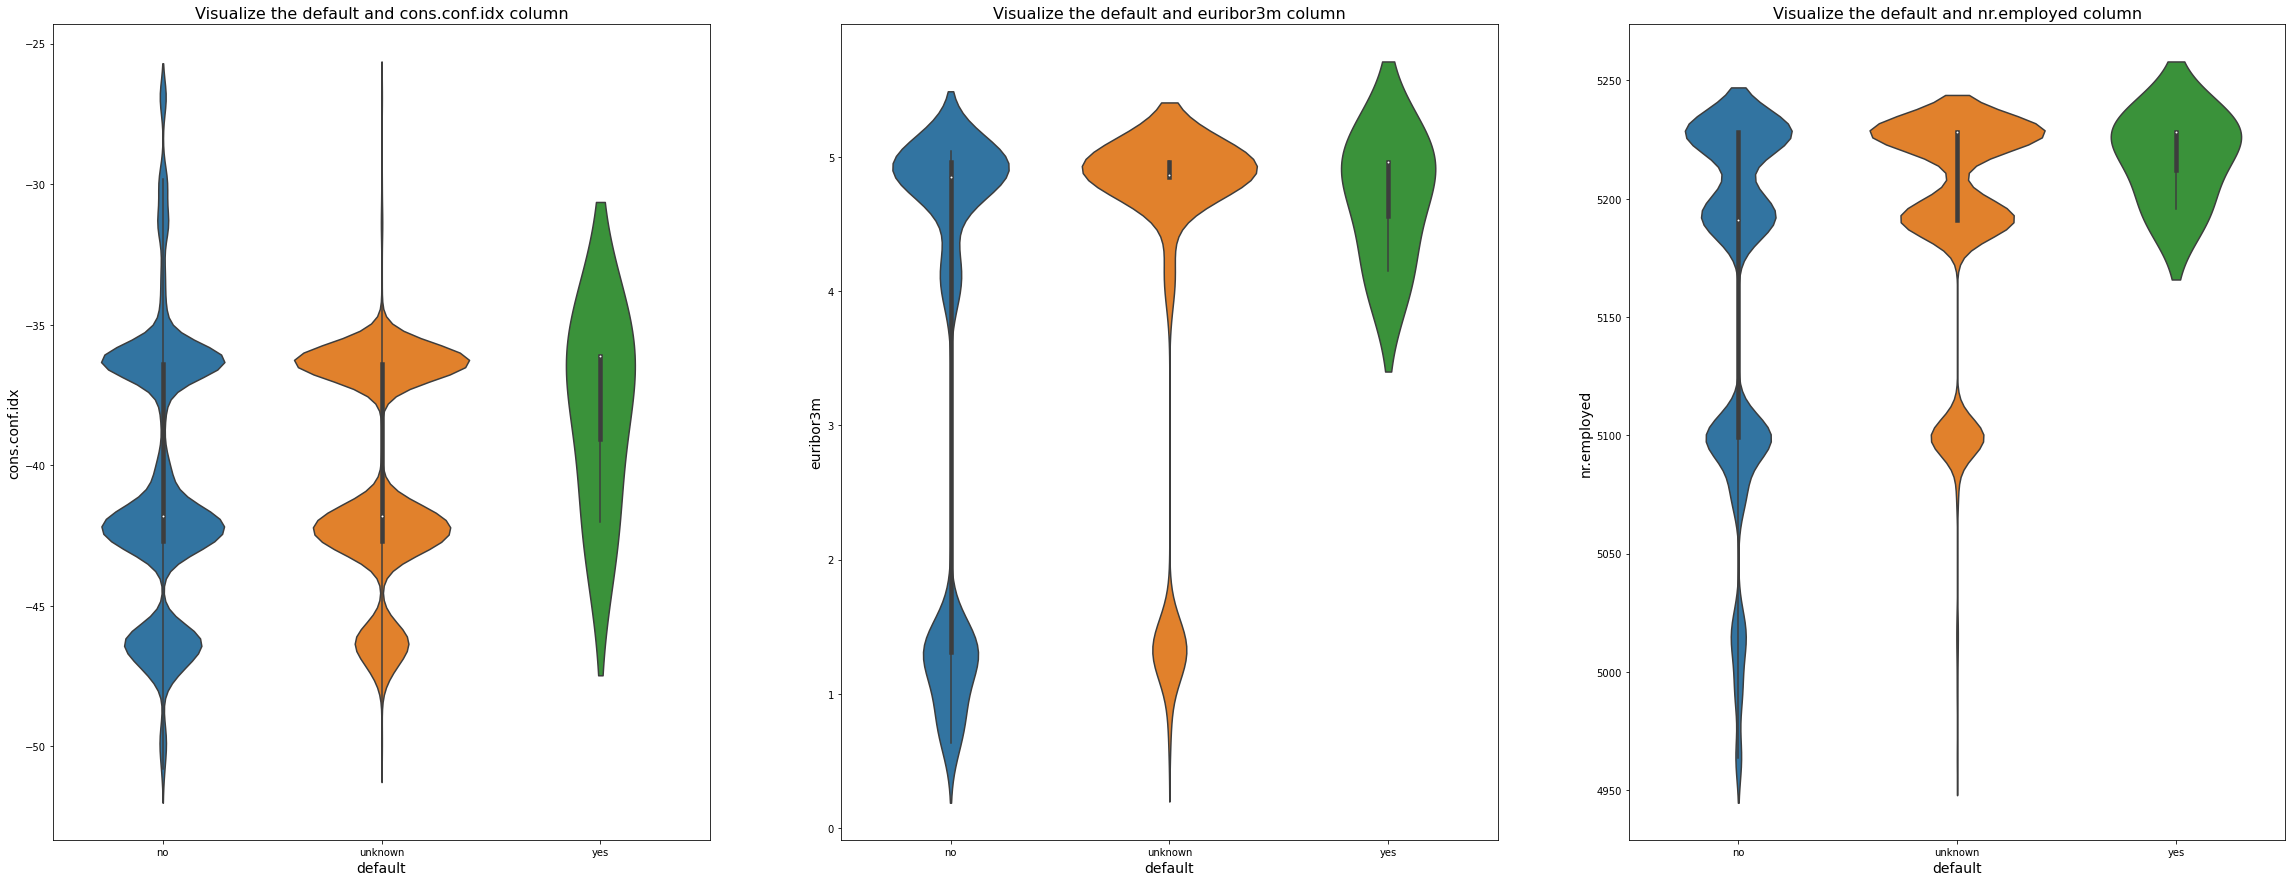

In [39]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.violinplot(x='default',y='cons.conf.idx',data=bank_df)
plt.title('Visualize the default and cons.conf.idx column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('cons.conf.idx',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='default',y='euribor3m',data=bank_df)
plt.title('Visualize the default and euribor3m column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('euribor3m',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='default',y='nr.employed',data=bank_df)
plt.title('Visualize the default and nr.employed column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('nr.employed',fontsize=14)

plt.show()

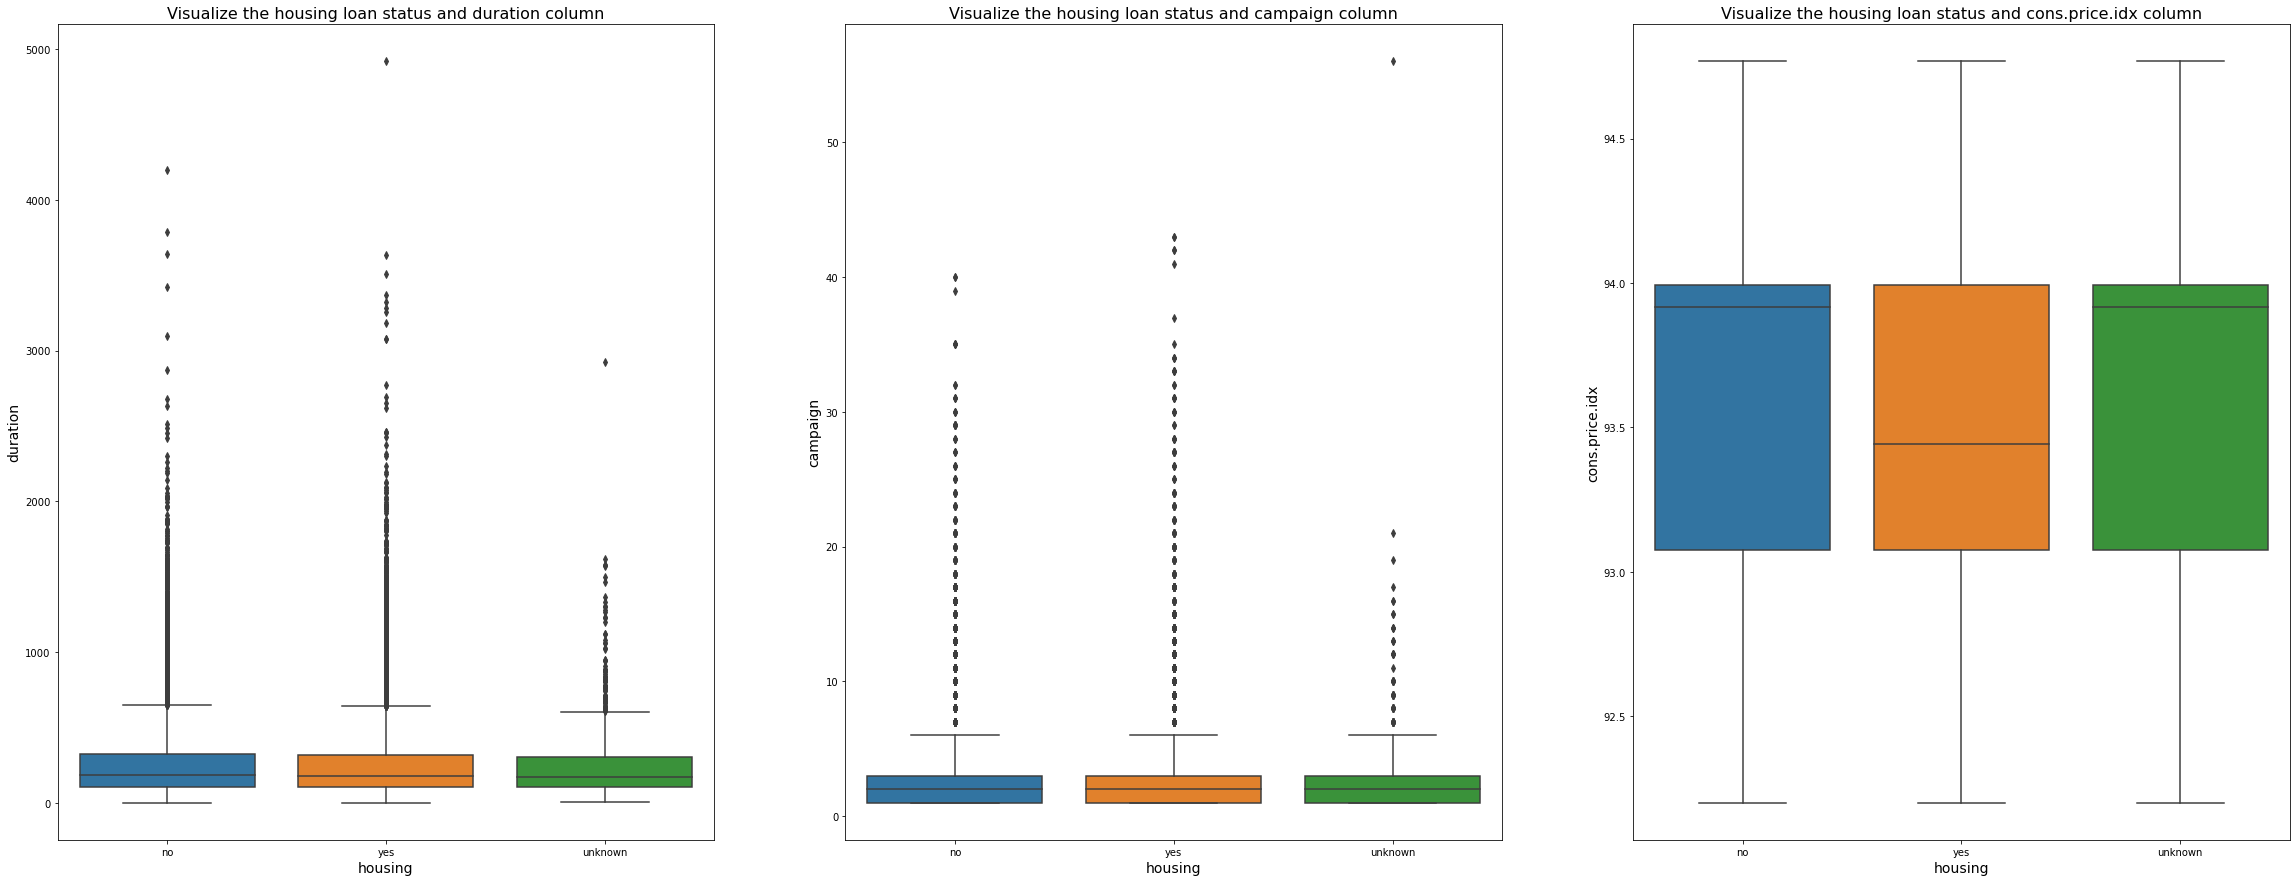

In [40]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.boxplot(x='housing',y='duration',data=bank_df)
plt.title('Visualize the housing loan status and duration column',fontsize=16)
plt.xlabel('housing',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(x='housing',y='campaign',data=bank_df)
plt.title('Visualize the housing loan status and campaign column',fontsize=16)
plt.xlabel('housing',fontsize=14)
plt.ylabel('campaign',fontsize=14)

plt.subplot(1,3,3)
sns.boxplot(x='housing',y='cons.price.idx',data=bank_df)
plt.title('Visualize the housing loan status and cons.price.idx column',fontsize=16)
plt.xlabel('housing',fontsize=14)
plt.ylabel('cons.price.idx',fontsize=14)

plt.show()

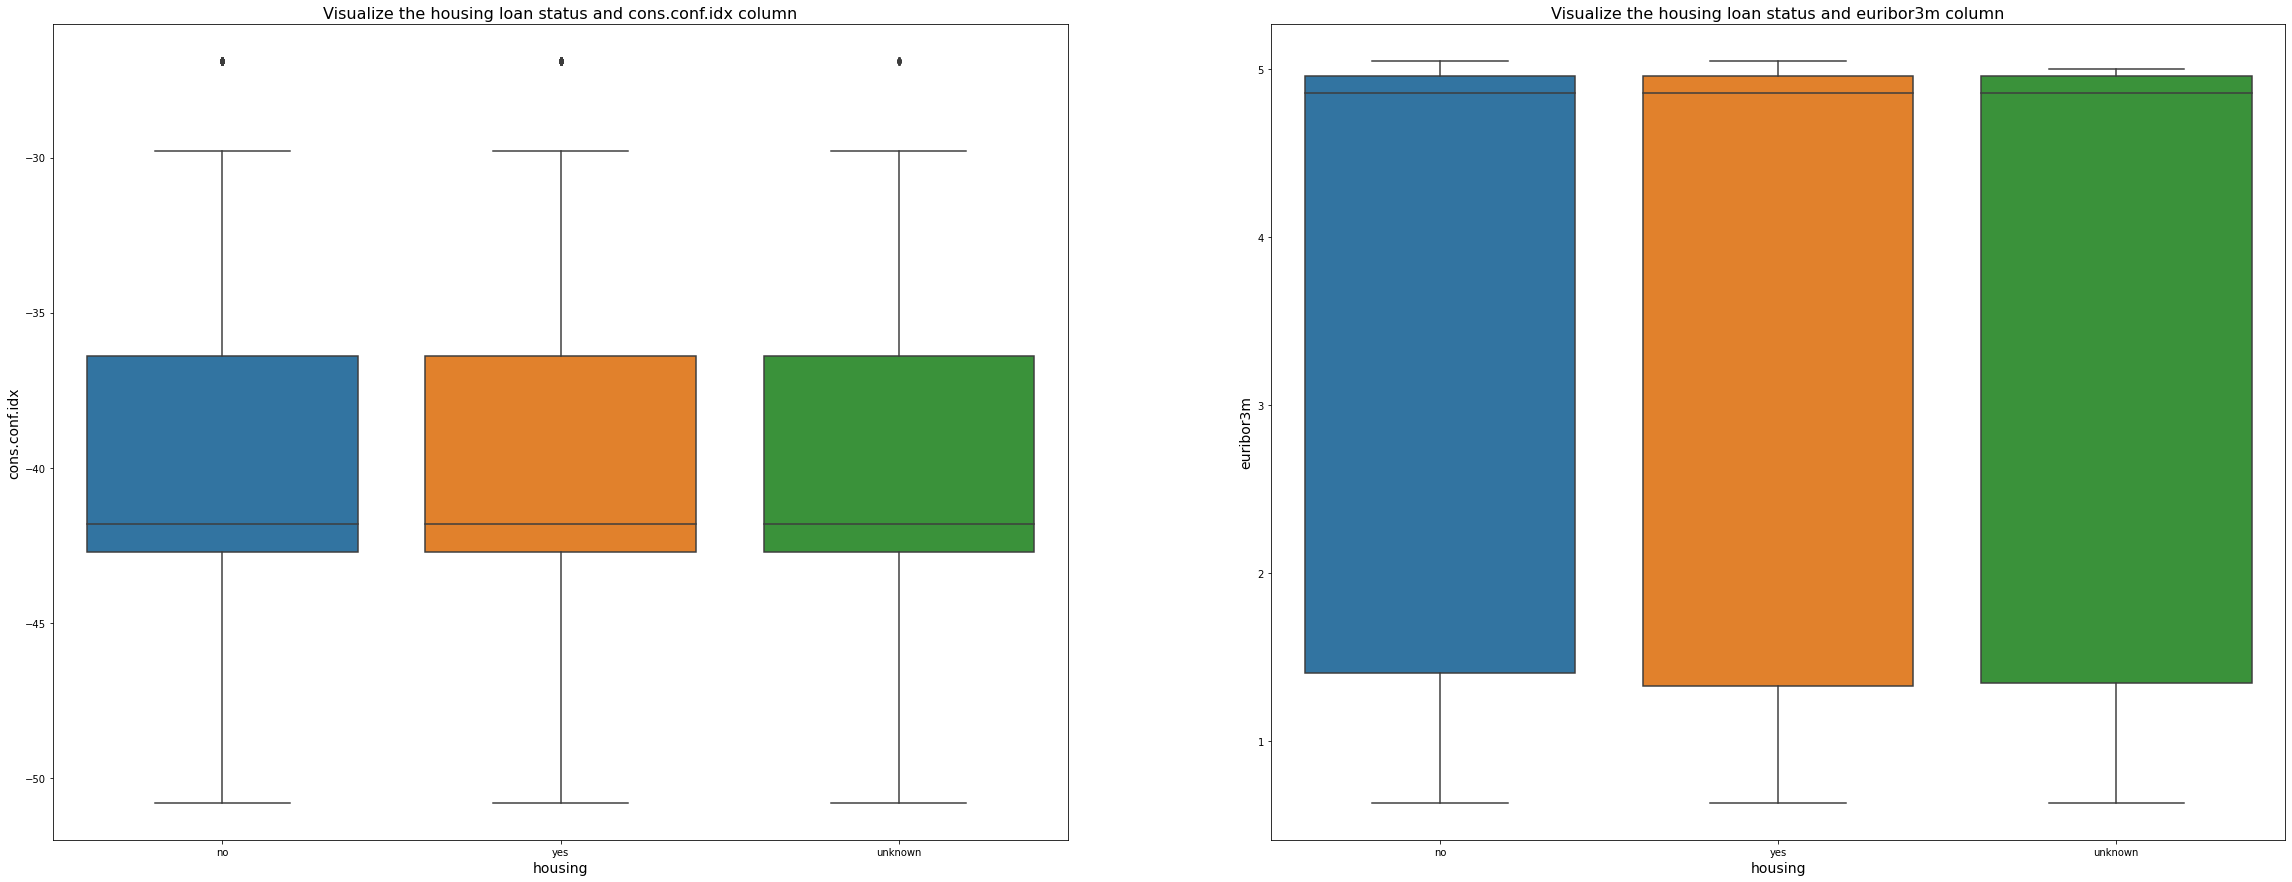

In [41]:
plt.figure(figsize=(40,15))

plt.subplot(1,2,1)
sns.boxplot(x='housing',y='cons.conf.idx',data=bank_df)
plt.title('Visualize the housing loan status and cons.conf.idx column',fontsize=16)
plt.xlabel('housing',fontsize=14)
plt.ylabel('cons.conf.idx',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='housing',y='euribor3m',data=bank_df)
plt.title('Visualize the housing loan status and euribor3m column',fontsize=16)
plt.xlabel('housing',fontsize=14)
plt.ylabel('euribor3m',fontsize=14)

plt.show()


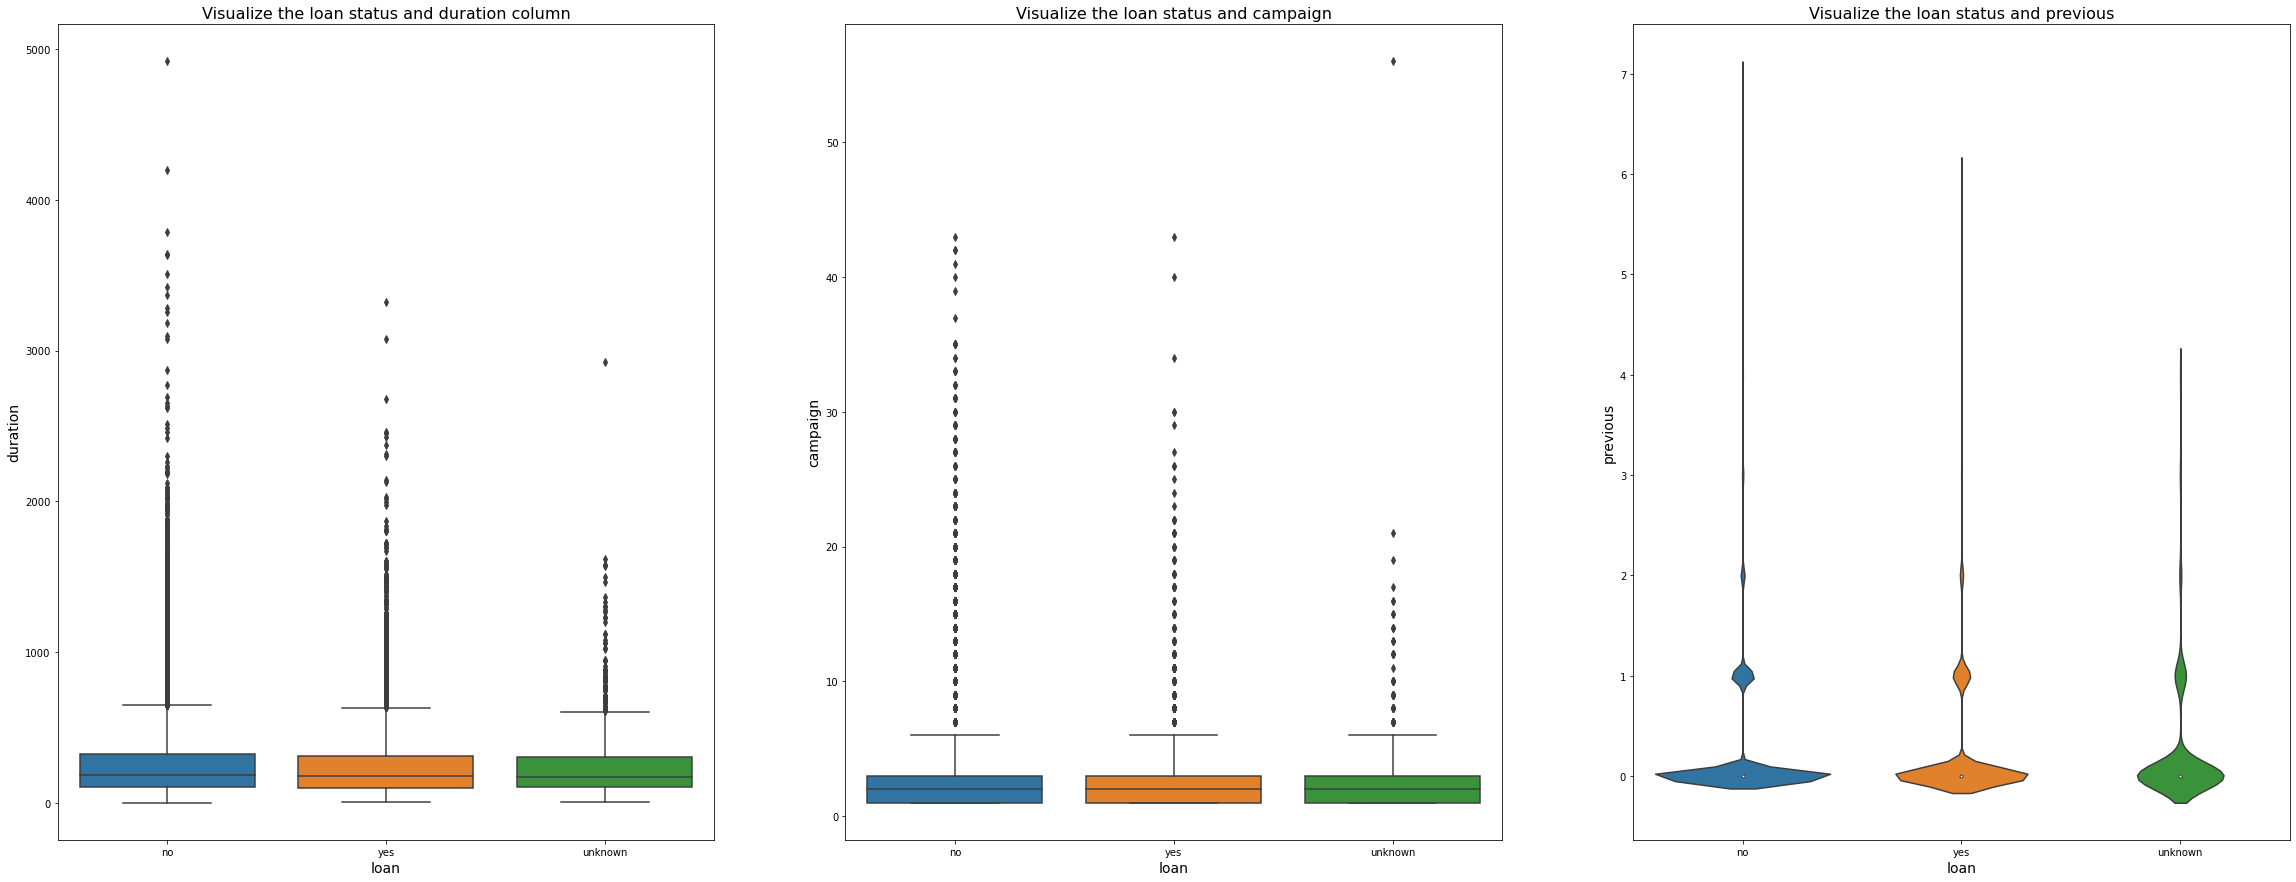

In [42]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.boxplot(x='loan',y='duration',data=bank_df)
plt.title('Visualize the loan status and duration column',fontsize=16)
plt.xlabel('loan',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(x='loan',y='campaign',data=bank_df)
plt.title('Visualize the loan status and campaign',fontsize=16)
plt.xlabel('loan',fontsize=14)
plt.ylabel('campaign',fontsize=14)


plt.subplot(1,3,3)
sns.violinplot(x='loan',y='previous',data=bank_df)
plt.title('Visualize the loan status and previous',fontsize=16)
plt.xlabel('loan',fontsize=14)
plt.ylabel('previous',fontsize=14)

plt.show()


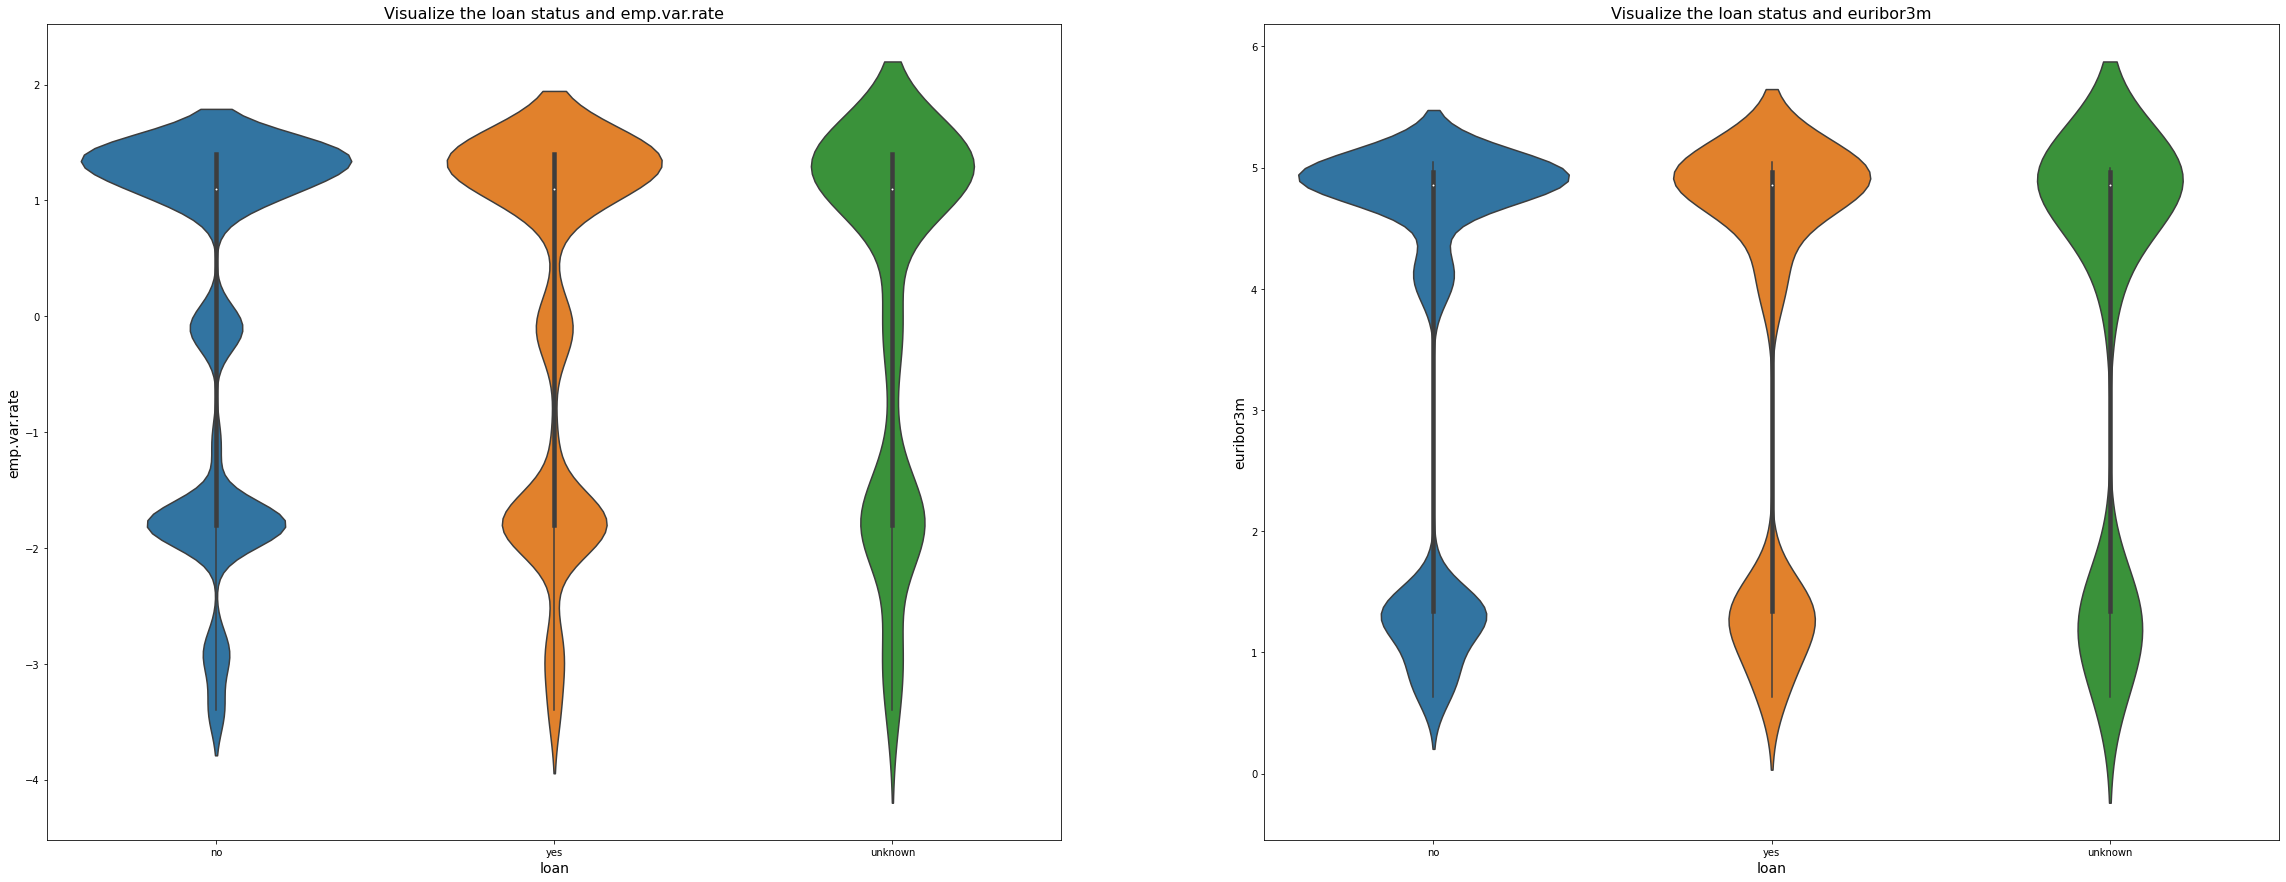

In [44]:
plt.figure(figsize=(40,15))

plt.subplot(1,2,1)
sns.violinplot(x='loan',y='emp.var.rate',data=bank_df)
plt.title('Visualize the loan status and emp.var.rate',fontsize=16)
plt.xlabel('loan',fontsize=14)
plt.ylabel('emp.var.rate',fontsize=14)

plt.subplot(1,2,2)
sns.violinplot(x='loan',y='euribor3m',data=bank_df)
plt.title('Visualize the loan status and euribor3m',fontsize=16)
plt.xlabel('loan',fontsize=14)
plt.ylabel('euribor3m',fontsize=14)

plt.show()

Text(0, 0.5, 'euribor3m')

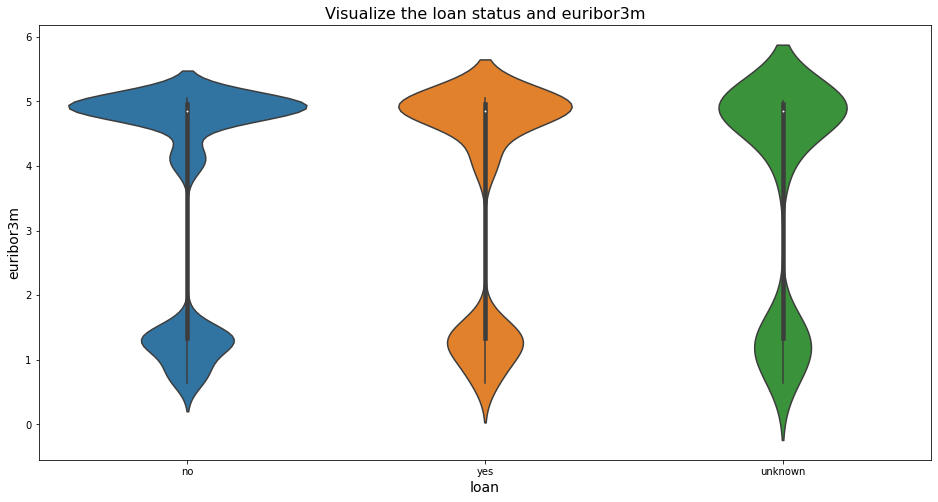

In [67]:
sns.violinplot(x='loan',y='euribor3m',data=bank_df)
plt.title('Visualize the loan status and euribor3m',fontsize=16)
plt.xlabel('loan',fontsize=14)
plt.ylabel('euribor3m',fontsize=14)

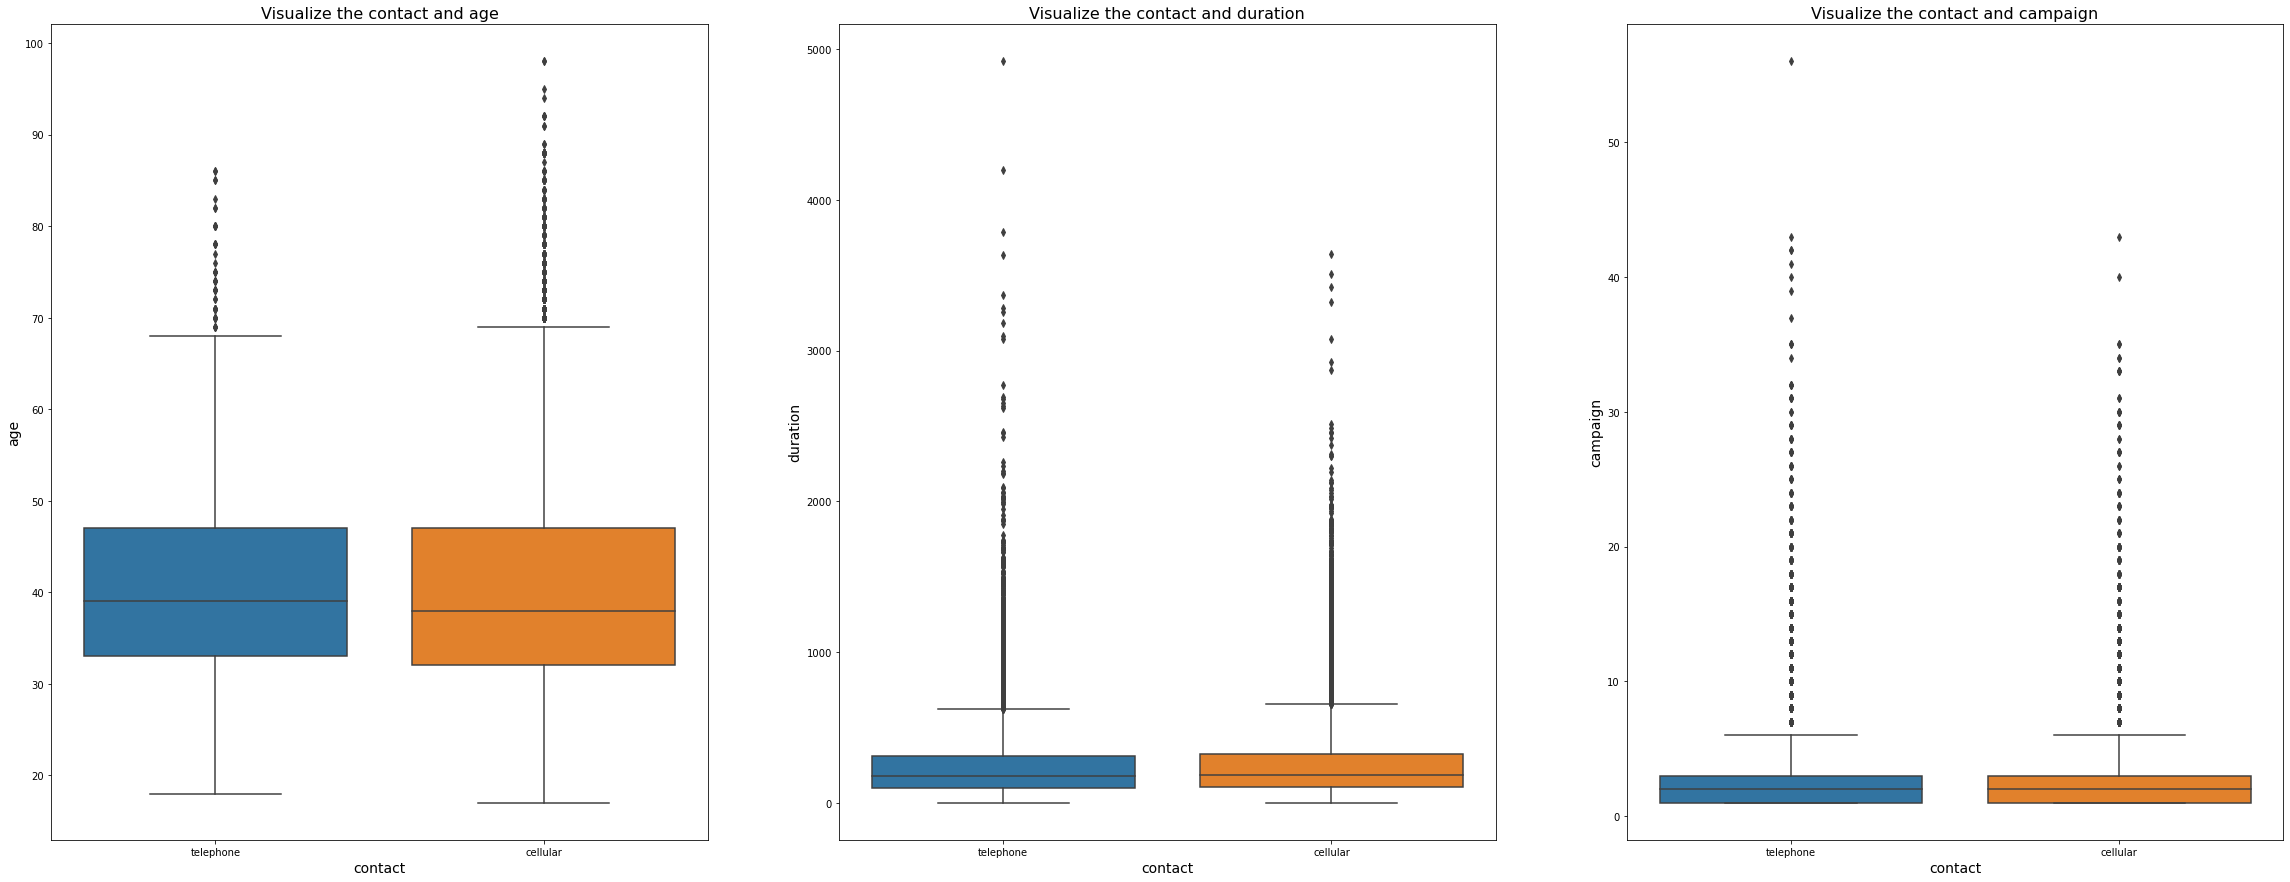

In [45]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.boxplot(x='contact',y='age',data=bank_df)
plt.title('Visualize the contact and age',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('age',fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(x='contact',y='duration',data=bank_df)
plt.title('Visualize the contact and duration',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,3,3)
sns.boxplot(x='contact',y='campaign',data=bank_df)
plt.title('Visualize the contact and campaign',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('campaign',fontsize=14)

plt.show()

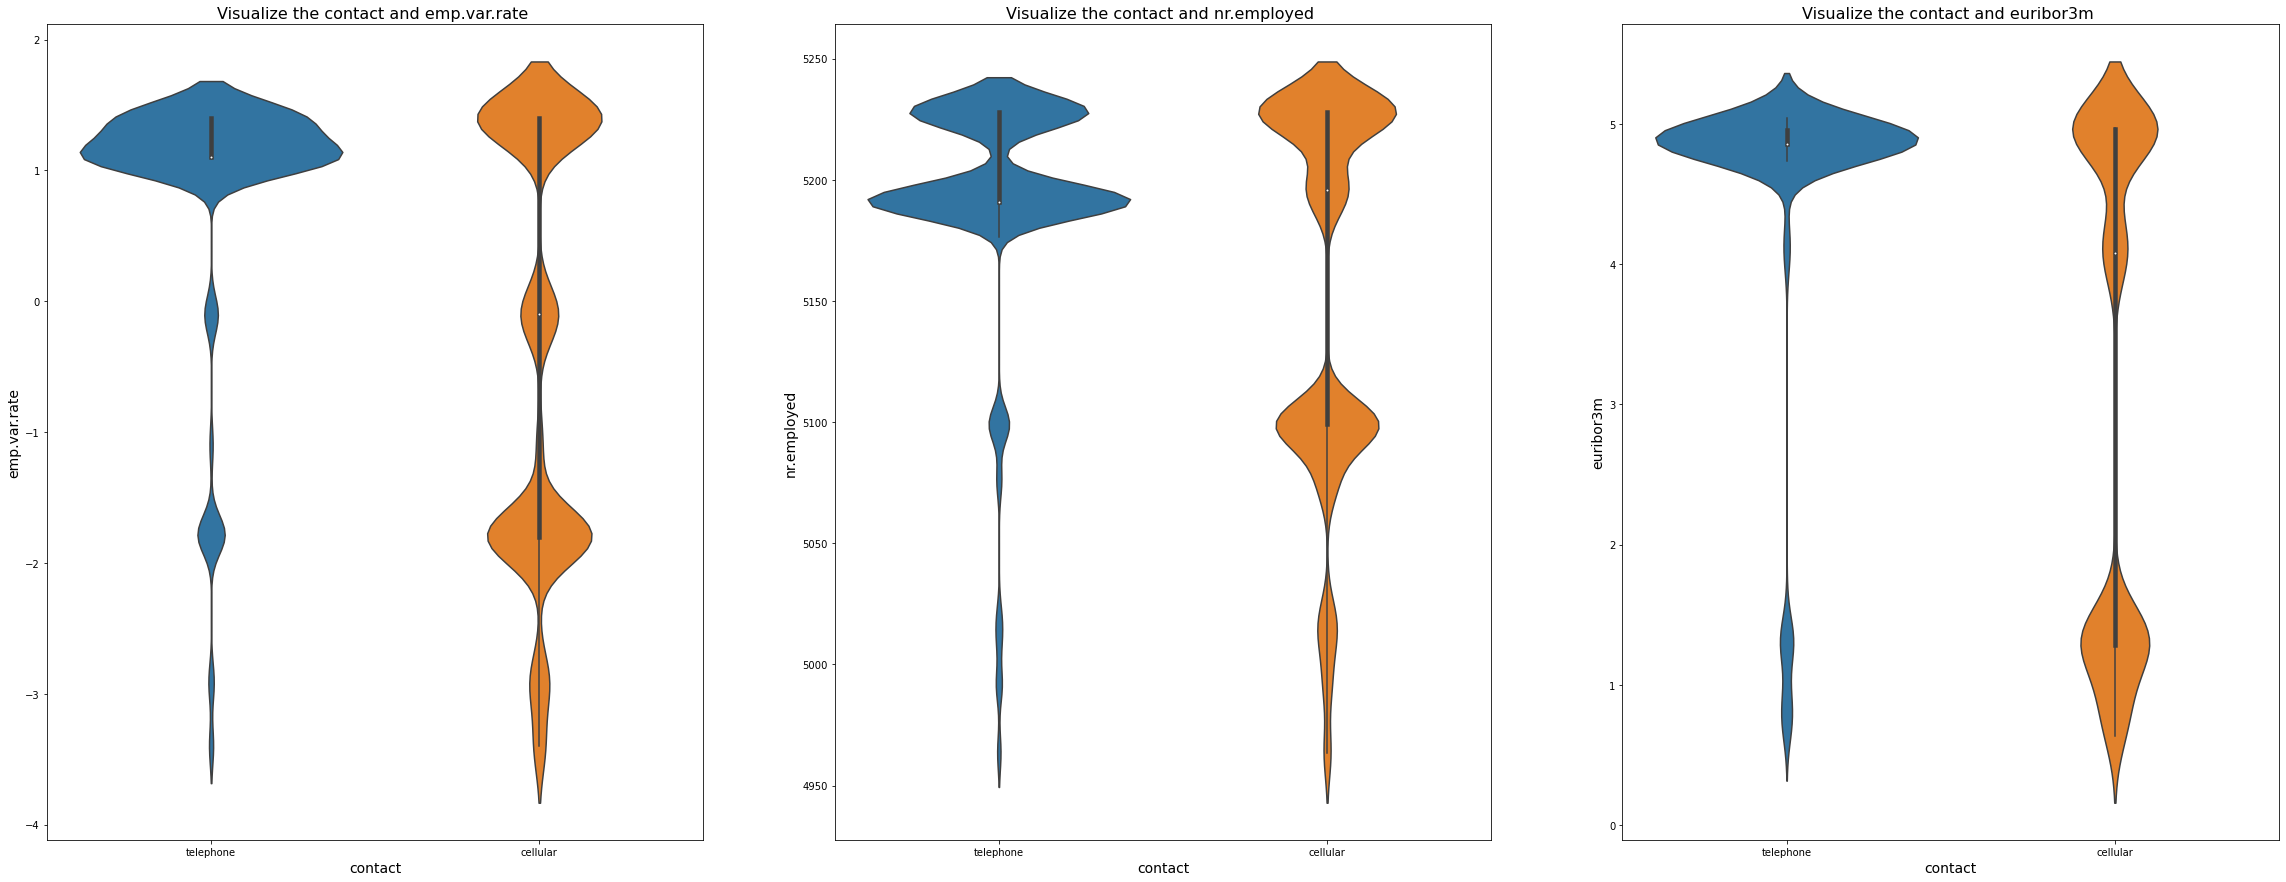

In [47]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.violinplot(x='contact',y='emp.var.rate',data=bank_df)
plt.title('Visualize the contact and emp.var.rate ',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('emp.var.rate',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='contact',y='nr.employed',data=bank_df)
plt.title('Visualize the contact and nr.employed ',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('nr.employed',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='contact',y='euribor3m',data=bank_df)
plt.title('Visualize the contact and euribor3m ',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('euribor3m',fontsize=14)
plt.show()

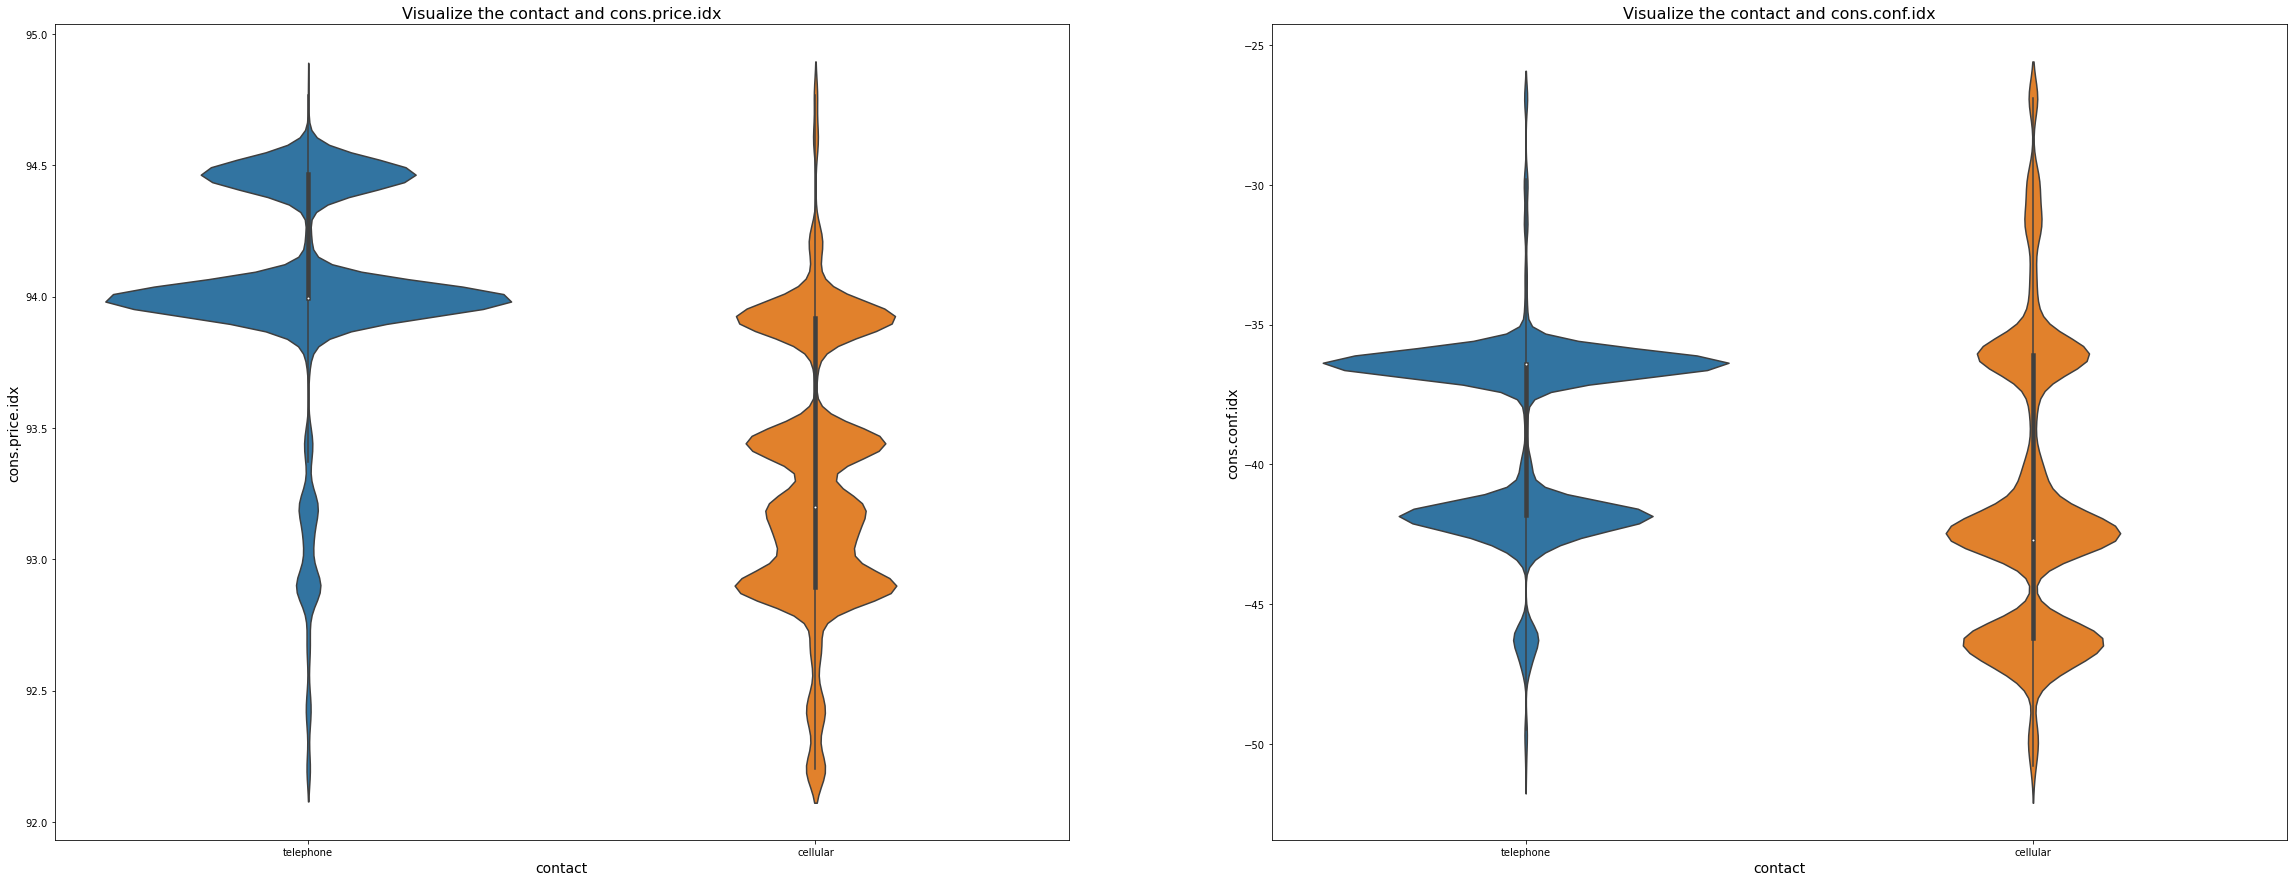

In [48]:
plt.figure(figsize=(40,15))

plt.subplot(1,2,1)
sns.violinplot(x='contact',y='cons.price.idx',data=bank_df)
plt.title('Visualize the contact and cons.price.idx',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('cons.price.idx',fontsize=14)

plt.subplot(1,2,2)
sns.violinplot(x='contact',y='cons.conf.idx',data=bank_df)
plt.title('Visualize the contact and cons.conf.idx',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('cons.conf.idx',fontsize=14)

plt.show()



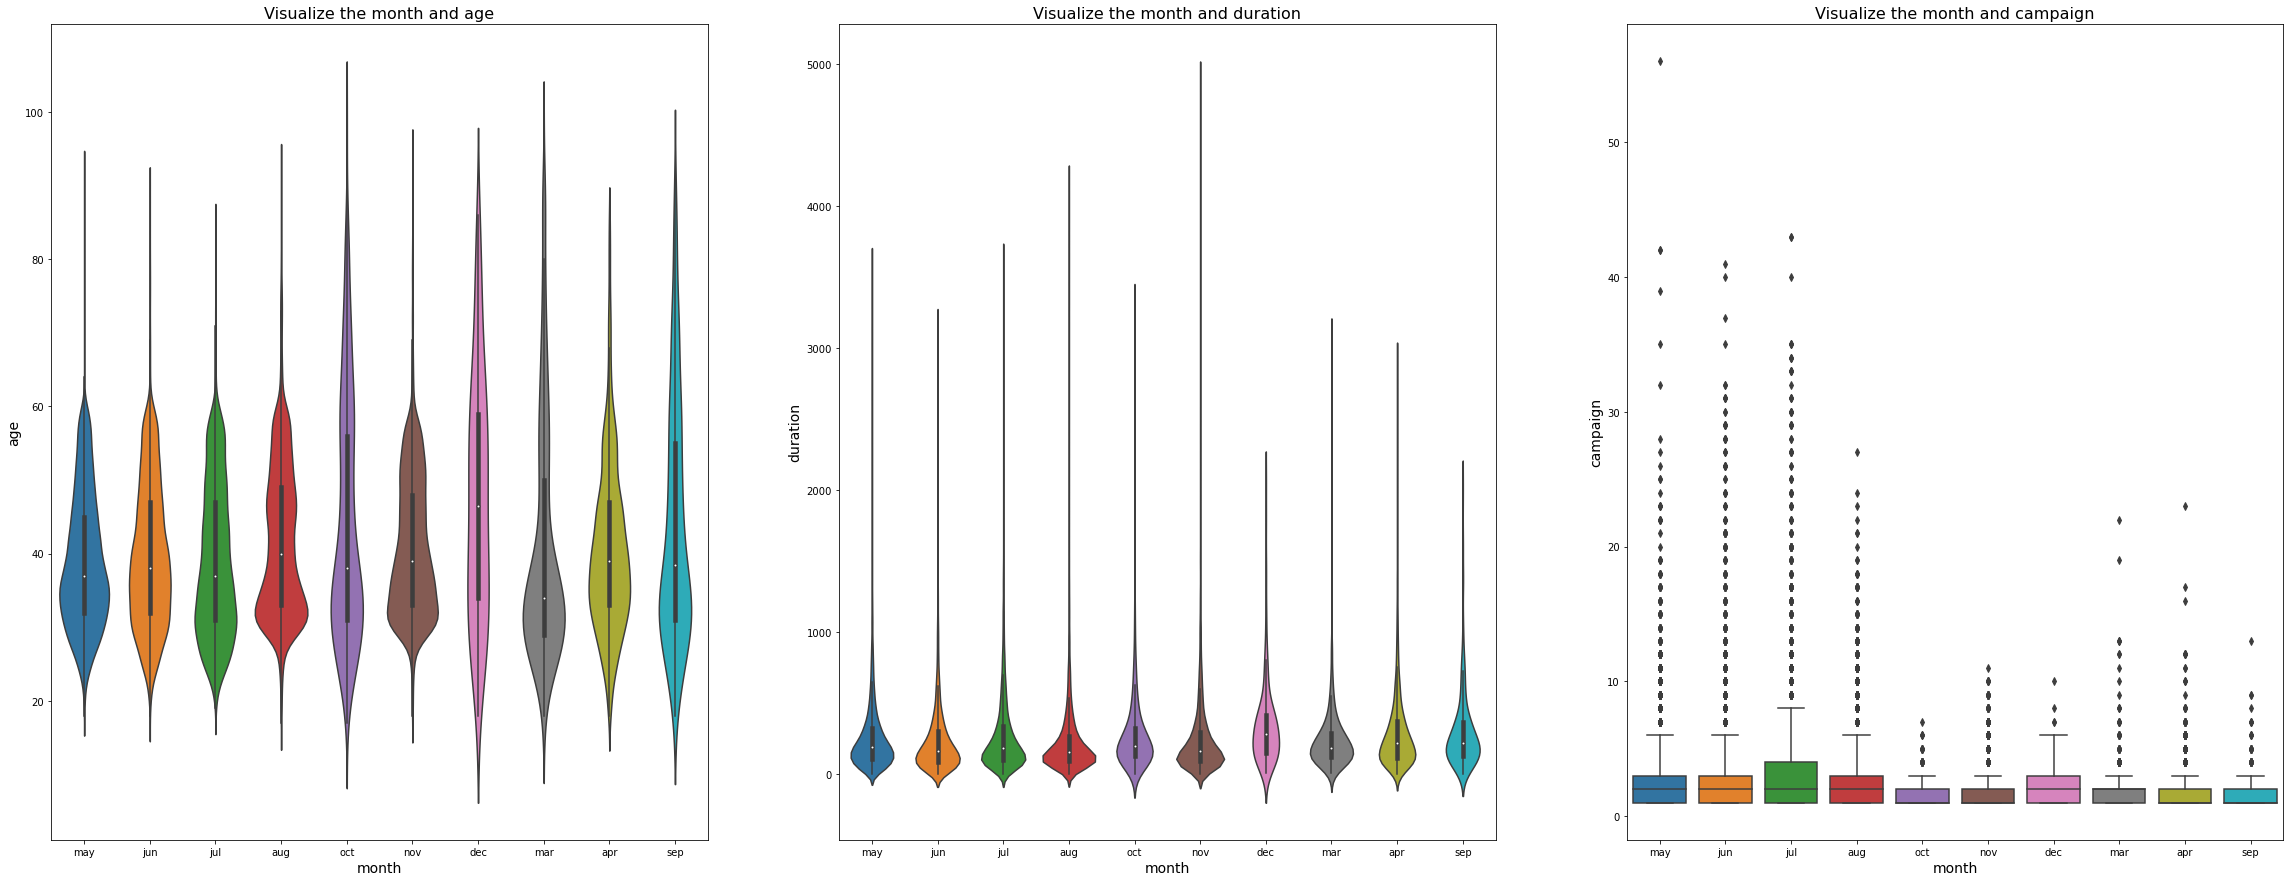

In [49]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.violinplot(x='month',y='age',data=bank_df)
plt.title('Visualize the month and age',fontsize=16)
plt.xlabel('month',fontsize=14)
plt.ylabel('age',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='month',y='duration',data=bank_df)
plt.title('Visualize the month and duration',fontsize=16)
plt.xlabel('month',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,3,3)
sns.boxplot(x='month',y='campaign',data=bank_df)
plt.title('Visualize the month and campaign',fontsize=16)
plt.xlabel('month',fontsize=14)
plt.ylabel('campaign',fontsize=14)

plt.show()

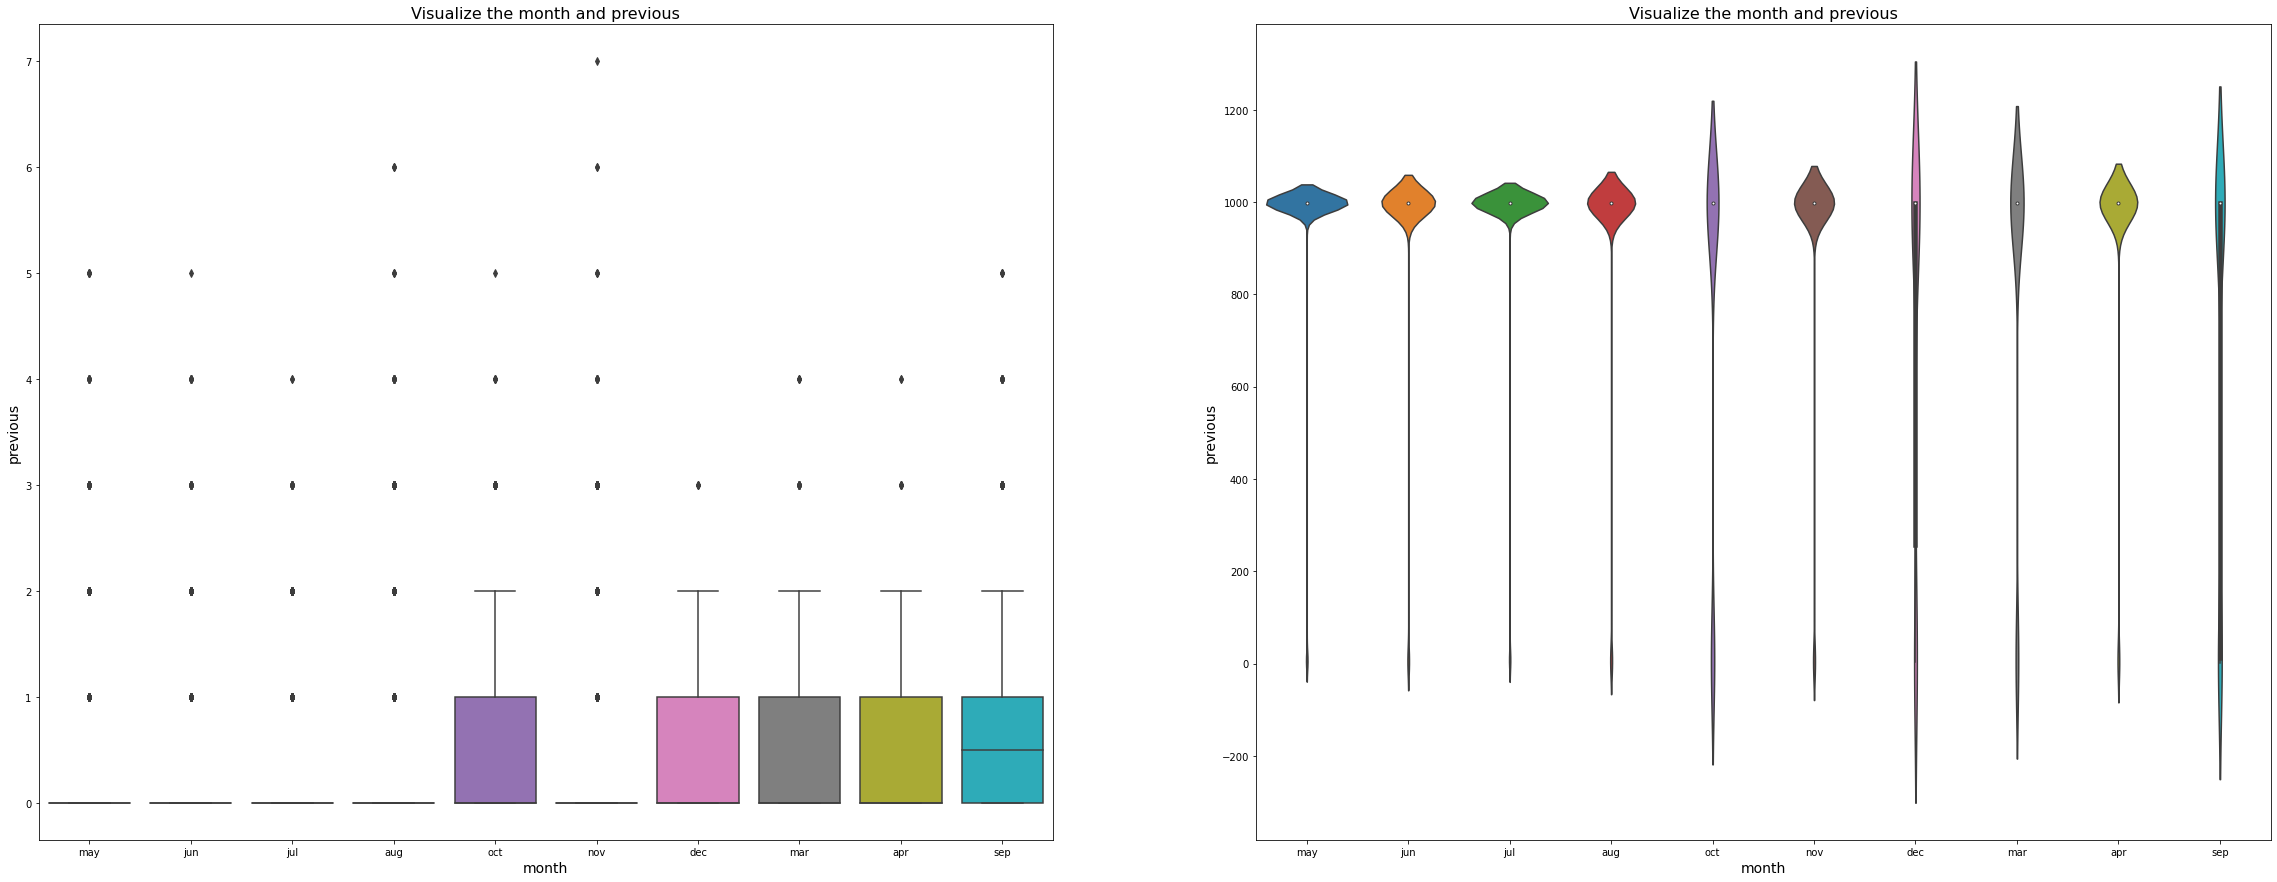

In [50]:
plt.figure(figsize=(40,15))

plt.subplot(1,2,1)
sns.boxplot(x='month',y='previous',data=bank_df)
plt.title('Visualize the month and previous',fontsize=16)
plt.xlabel('month',fontsize=14)
plt.ylabel('previous',fontsize=14)

plt.subplot(1,2,2)
sns.violinplot(x='month',y='pdays',data=bank_df)
plt.title('Visualize the month and previous',fontsize=16)
plt.xlabel('month',fontsize=14)
plt.ylabel('previous',fontsize=14)

plt.show()


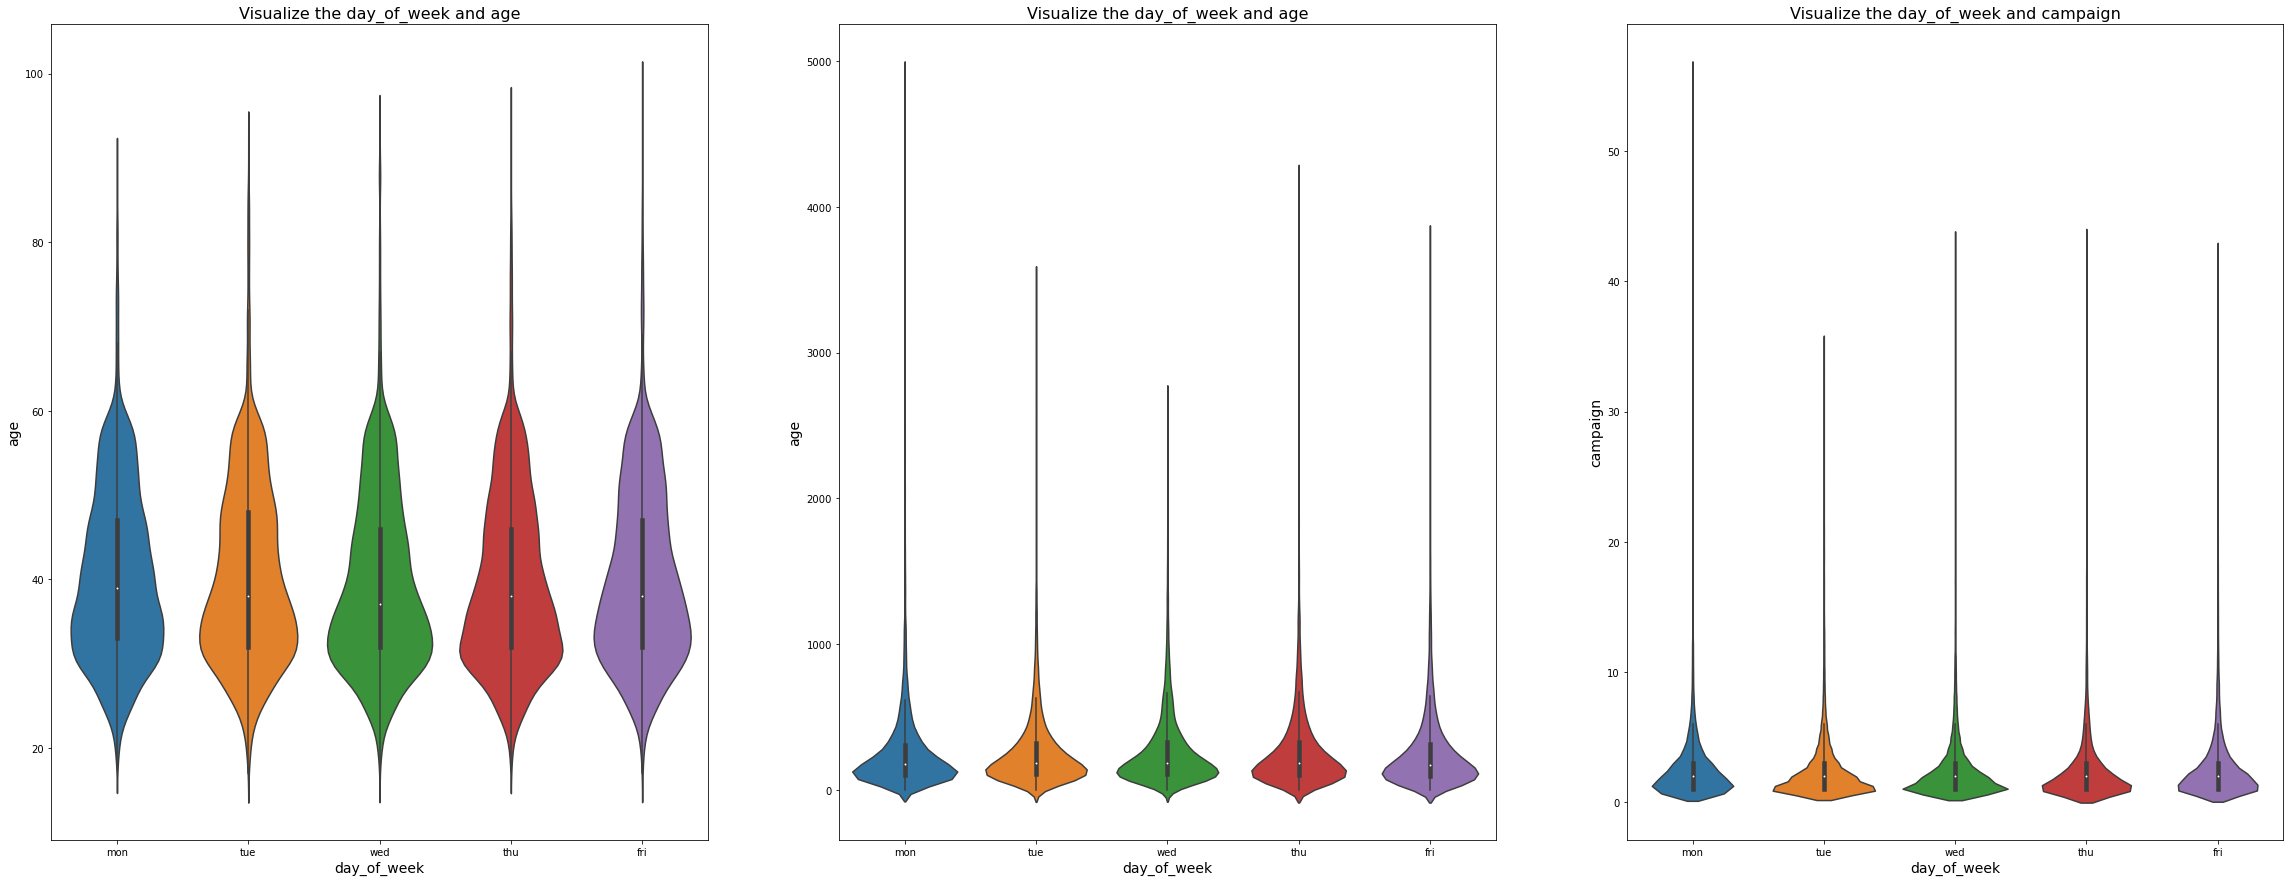

In [51]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.violinplot(x='day_of_week',y='age',data=bank_df)
plt.title('Visualize the day_of_week and age',fontsize=16)
plt.xlabel('day_of_week',fontsize=14)
plt.ylabel('age',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='day_of_week',y='duration',data=bank_df)
plt.title('Visualize the day_of_week and age',fontsize=16)
plt.xlabel('day_of_week',fontsize=14)
plt.ylabel('age',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='day_of_week',y='campaign',data=bank_df)
plt.title('Visualize the day_of_week and campaign',fontsize=16)
plt.xlabel('day_of_week',fontsize=14)
plt.ylabel('campaign',fontsize=14)

plt.show()

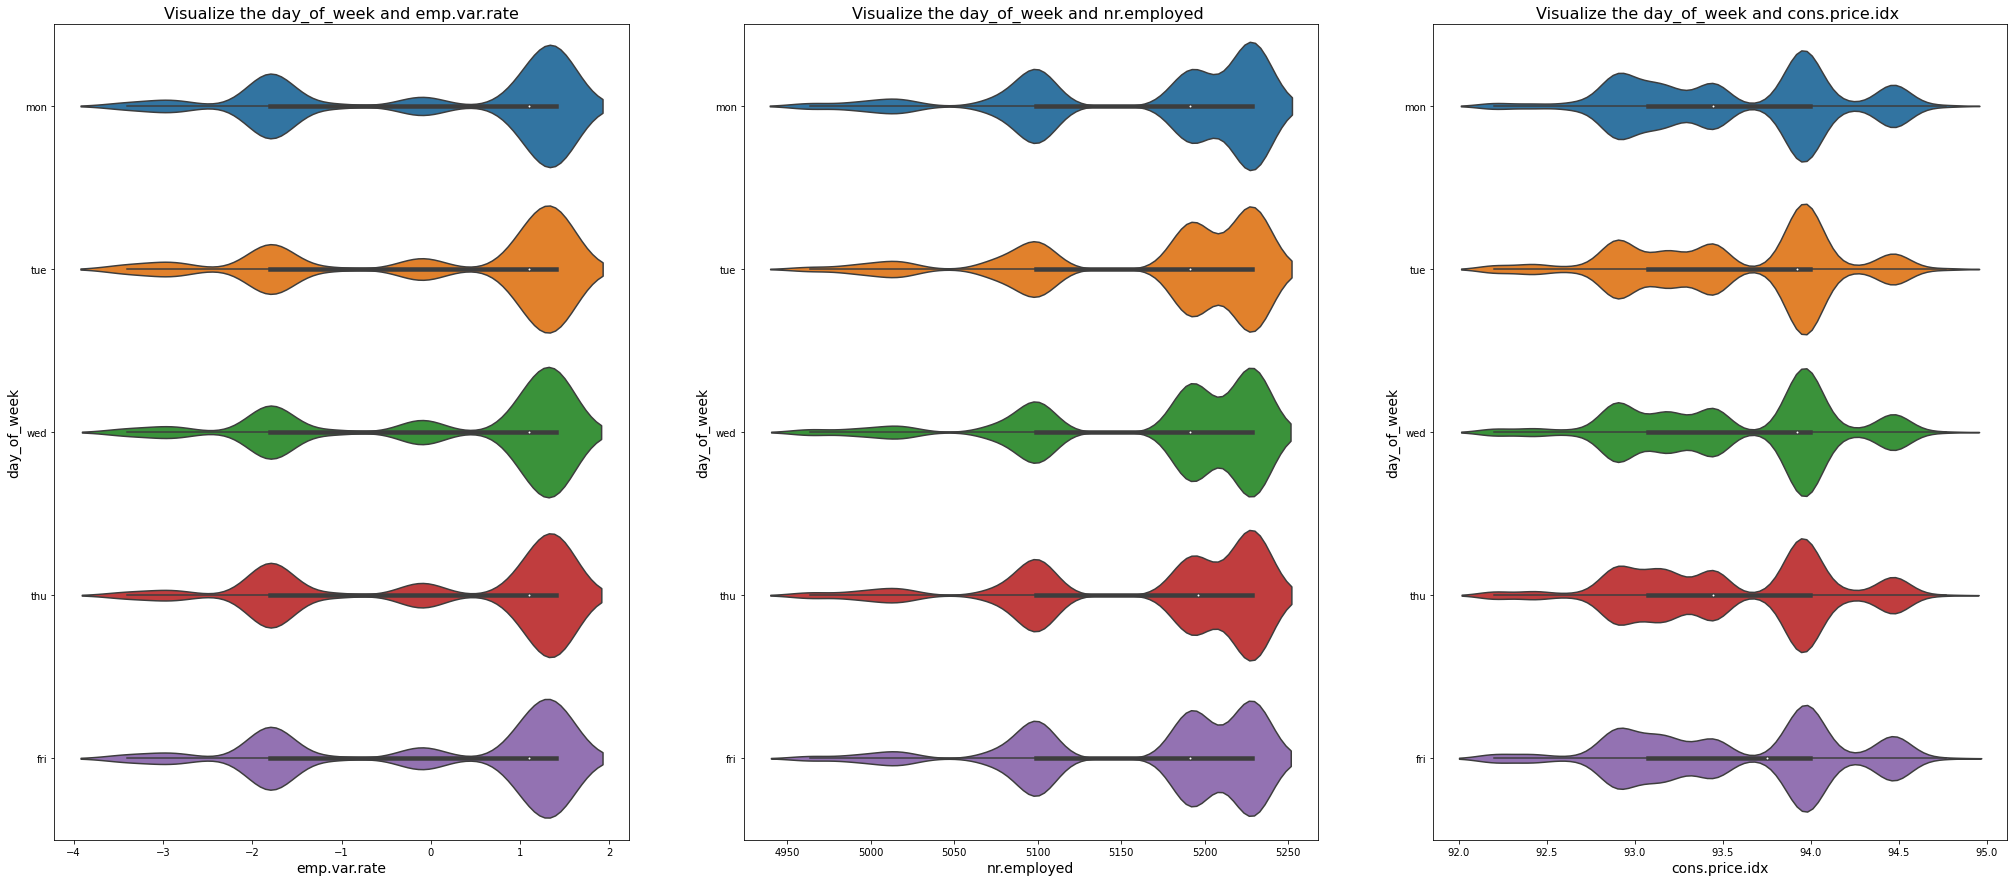

In [84]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(y='day_of_week',x='emp.var.rate',data=bank_df)
plt.title('Visualize the day_of_week and emp.var.rate',fontsize=16)
plt.ylabel('day_of_week',fontsize=14)
plt.xlabel('emp.var.rate',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(y='day_of_week',x='nr.employed',data=bank_df)
plt.title('Visualize the day_of_week and nr.employed ',fontsize=16)
plt.ylabel('day_of_week',fontsize=14)
plt.xlabel('nr.employed',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(y='day_of_week',x='cons.price.idx',data=bank_df)
plt.title('Visualize the day_of_week and cons.price.idx ',fontsize=16)
plt.ylabel('day_of_week',fontsize=14)
plt.xlabel('cons.price.idx',fontsize=14)
plt.show()

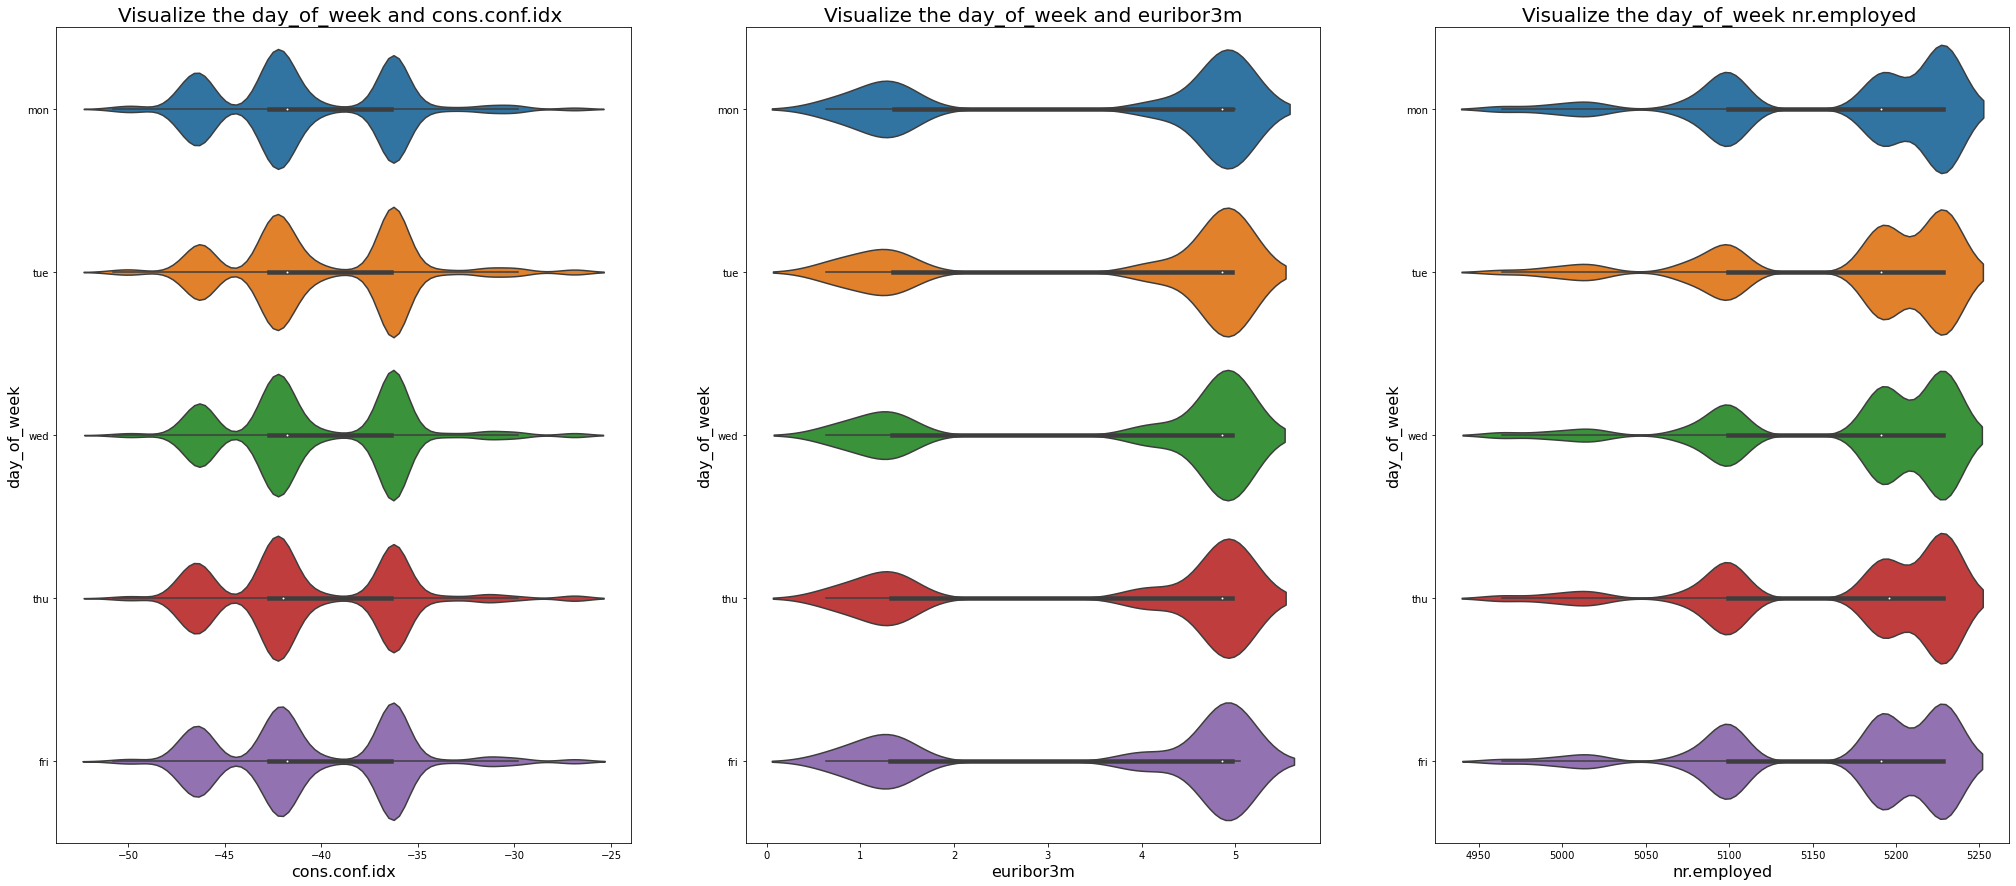

In [85]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(y='day_of_week',x='cons.conf.idx',data=bank_df)
plt.title('Visualize the day_of_week and cons.conf.idx ',fontsize=20)
plt.ylabel('day_of_week',fontsize=16)
plt.xlabel('cons.conf.idx',fontsize=16)

plt.subplot(1,3,2)
sns.violinplot(y='day_of_week',x='euribor3m',data=bank_df)
plt.title('Visualize the day_of_week and euribor3m',fontsize=20)
plt.ylabel('day_of_week',fontsize=16)
plt.xlabel('euribor3m',fontsize=16)

plt.subplot(1,3,3)
sns.violinplot(y='day_of_week',x='nr.employed',data=bank_df)
plt.title('Visualize the day_of_week nr.employed ',fontsize=20)
plt.ylabel('day_of_week',fontsize=16)
plt.xlabel('nr.employed',fontsize=16)
plt.show()

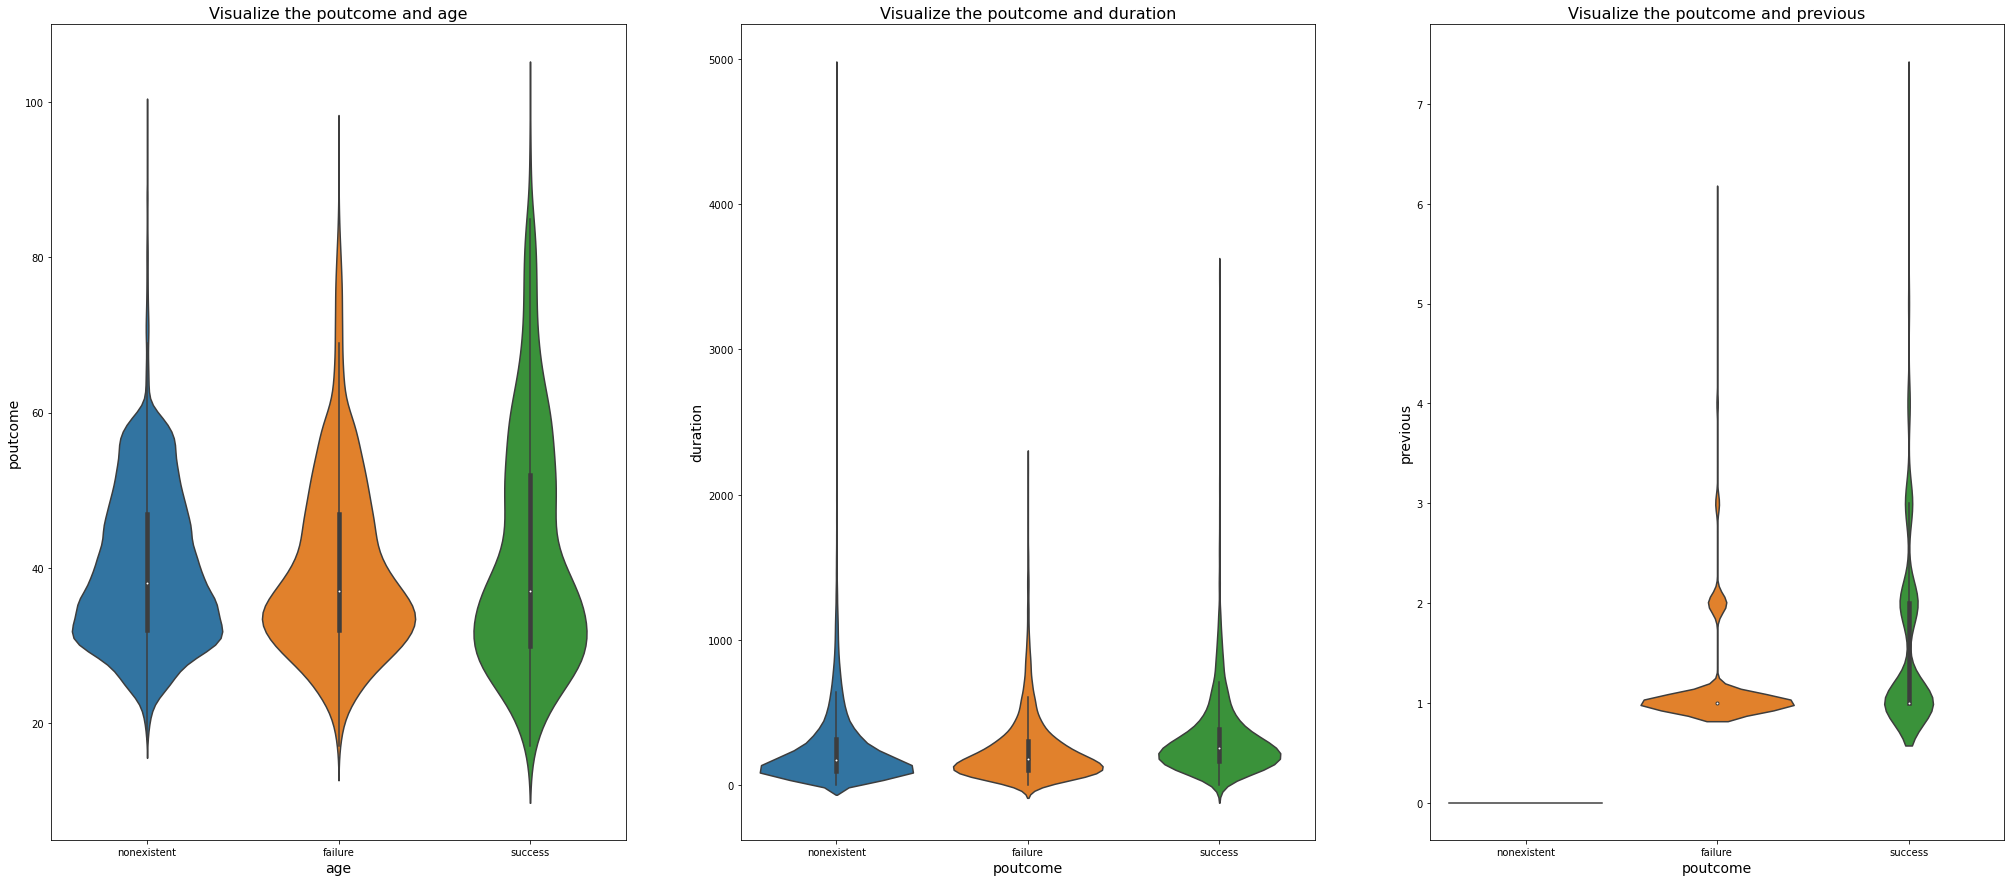

In [52]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='poutcome',y='age',data=bank_df)
plt.title('Visualize the poutcome and age',fontsize=16)
plt.ylabel('poutcome',fontsize=14)
plt.xlabel('age',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='poutcome',y='duration',data=bank_df)
plt.title('Visualize the poutcome and duration',fontsize=16)
plt.xlabel('poutcome',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='poutcome',y='previous',data=bank_df)
plt.title('Visualize the poutcome and previous',fontsize=16)
plt.xlabel('poutcome',fontsize=14)
plt.ylabel('previous',fontsize=14)

plt.show()

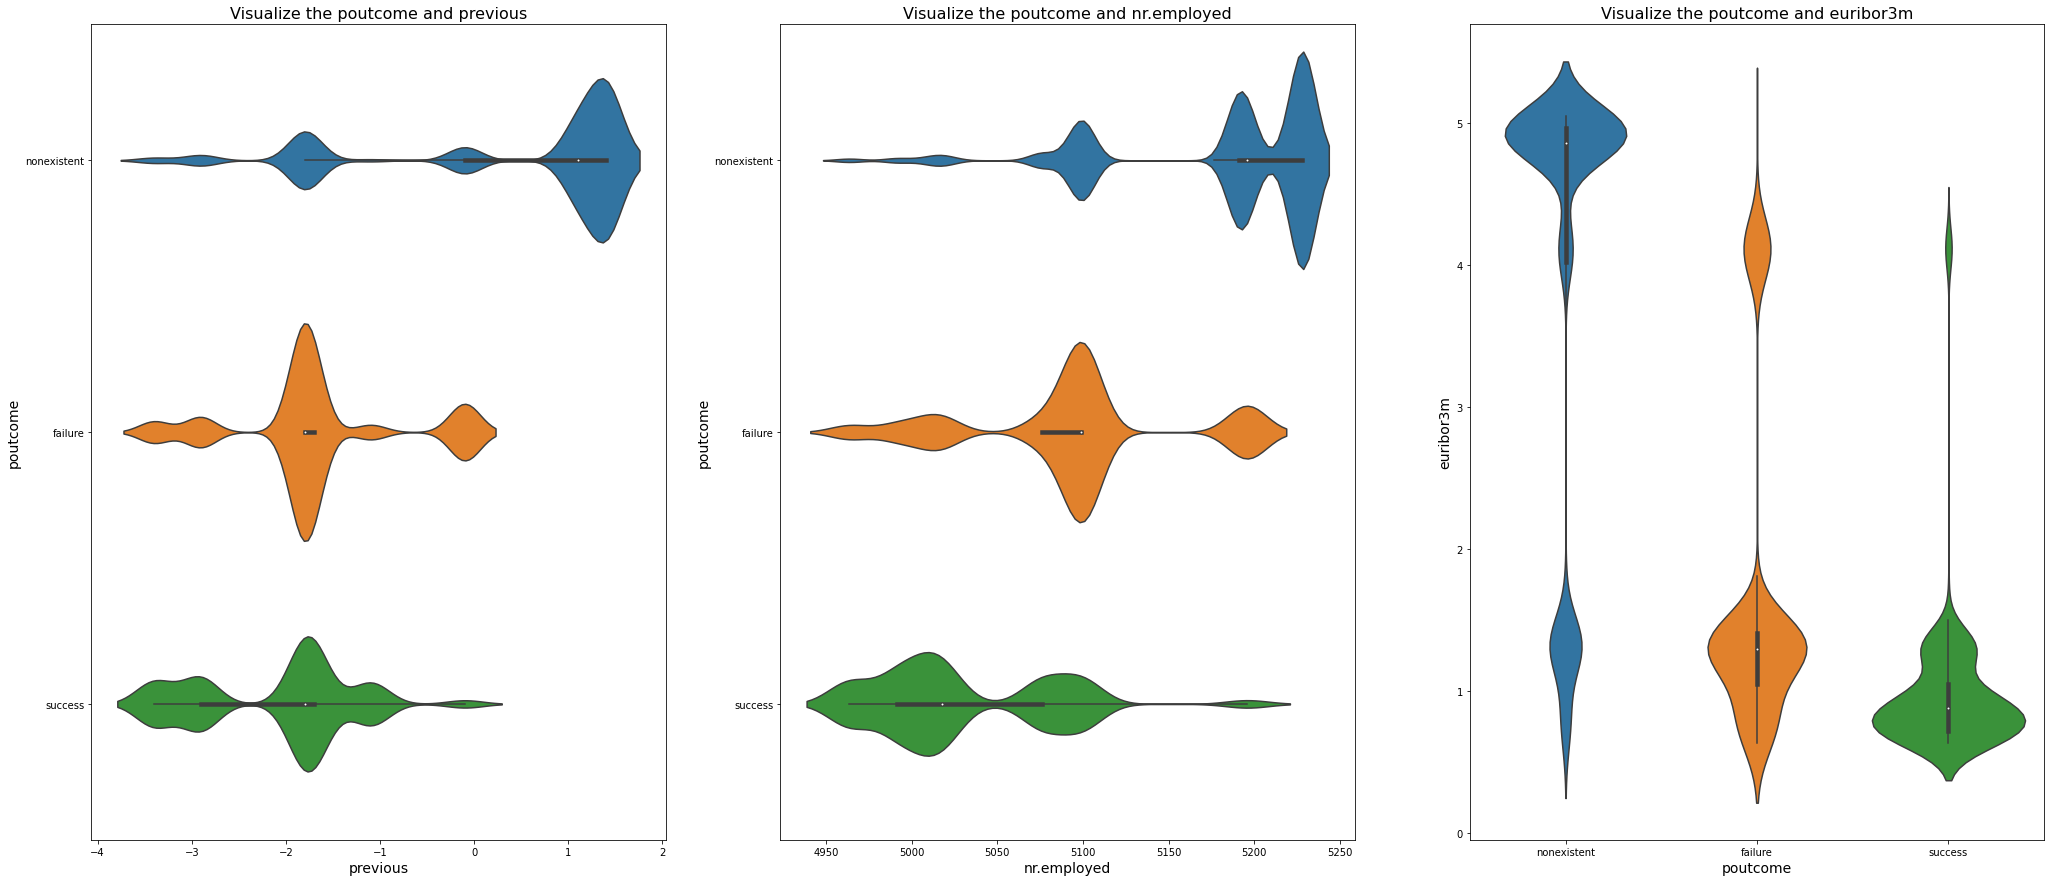

In [53]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(y='poutcome',x='emp.var.rate',data=bank_df)
plt.title('Visualize the poutcome and previous',fontsize=16)
plt.ylabel('poutcome',fontsize=14)
plt.xlabel('previous',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(y='poutcome',x='nr.employed',data=bank_df)
plt.title('Visualize the poutcome and nr.employed',fontsize=16)
plt.ylabel('poutcome',fontsize=14)
plt.xlabel('nr.employed',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='poutcome',y='euribor3m',data=bank_df)
plt.title('Visualize the poutcome and euribor3m',fontsize=16)
plt.xlabel('poutcome',fontsize=14)
plt.ylabel('euribor3m',fontsize=14)

plt.show()

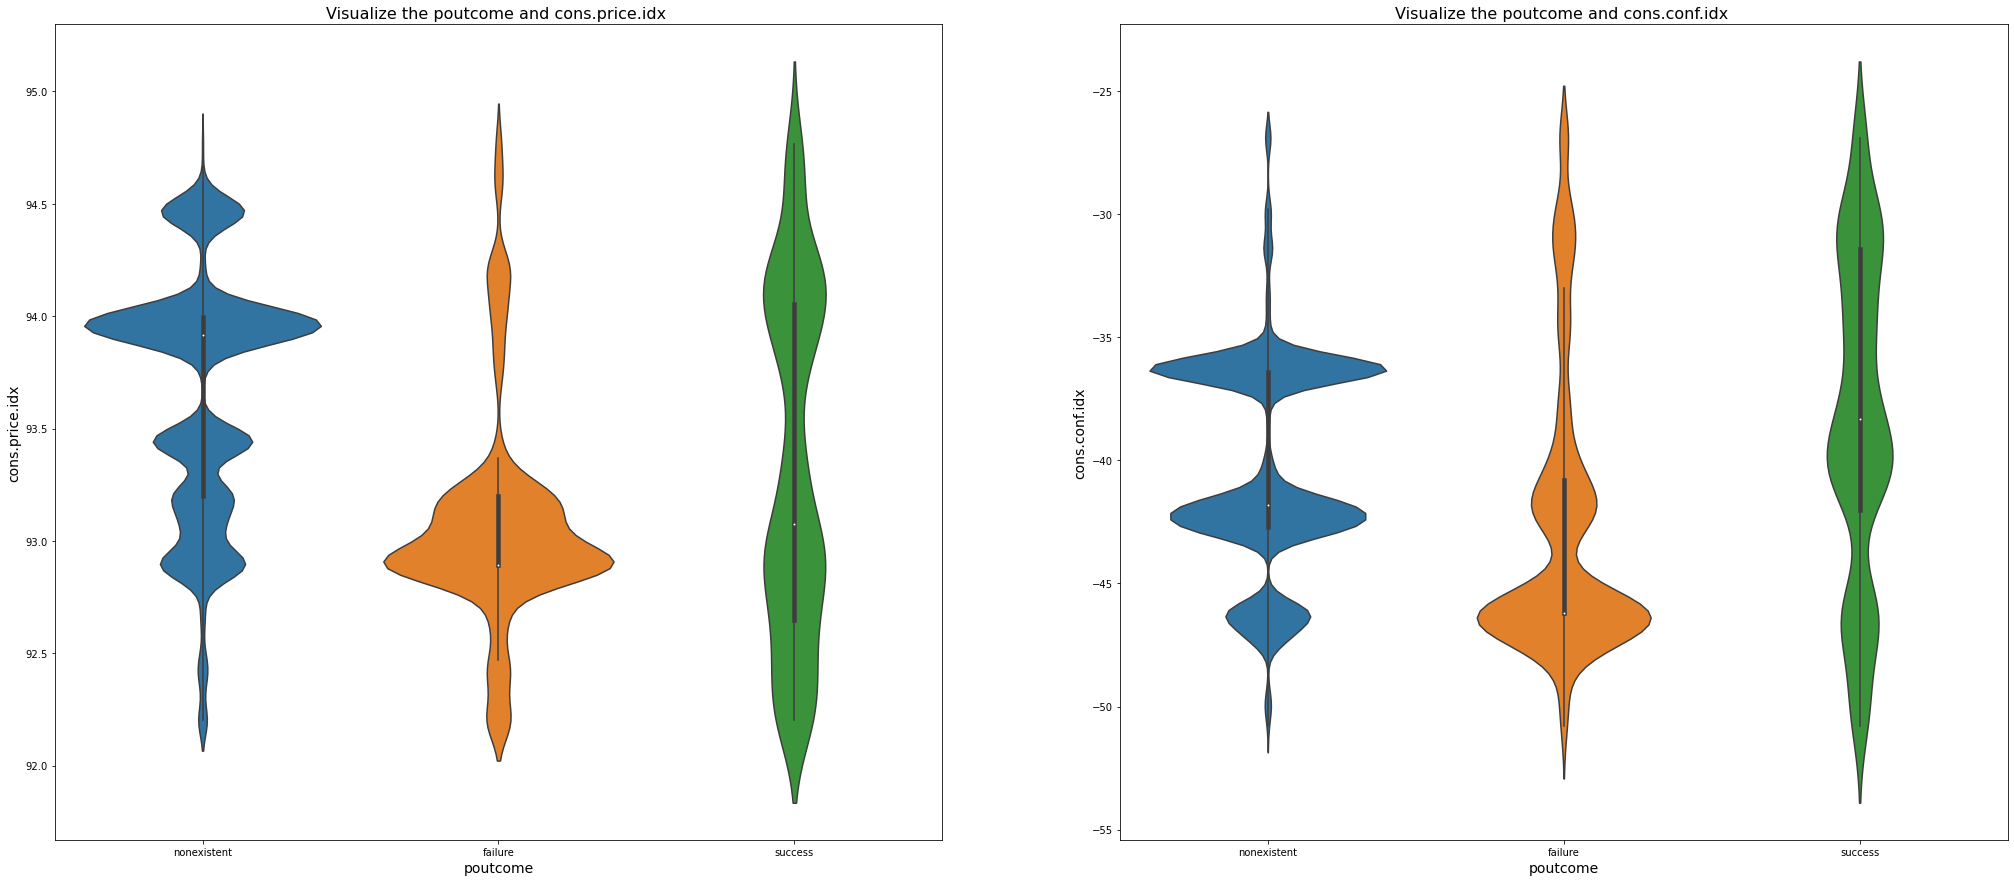

In [55]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.violinplot(x='poutcome',y='cons.price.idx',data=bank_df)
plt.title('Visualize the poutcome and cons.price.idx ',fontsize=16)
plt.xlabel('poutcome',fontsize=14)
plt.ylabel('cons.price.idx',fontsize=14)

plt.subplot(1,2,2)
sns.violinplot(x='poutcome',y='cons.conf.idx',data=bank_df)
plt.title('Visualize the poutcome and cons.conf.idx ',fontsize=16)
plt.xlabel('poutcome',fontsize=14)
plt.ylabel('cons.conf.idx',fontsize=14)
plt.show()



<AxesSubplot:xlabel='education'>

<Figure size 2520x1080 with 0 Axes>

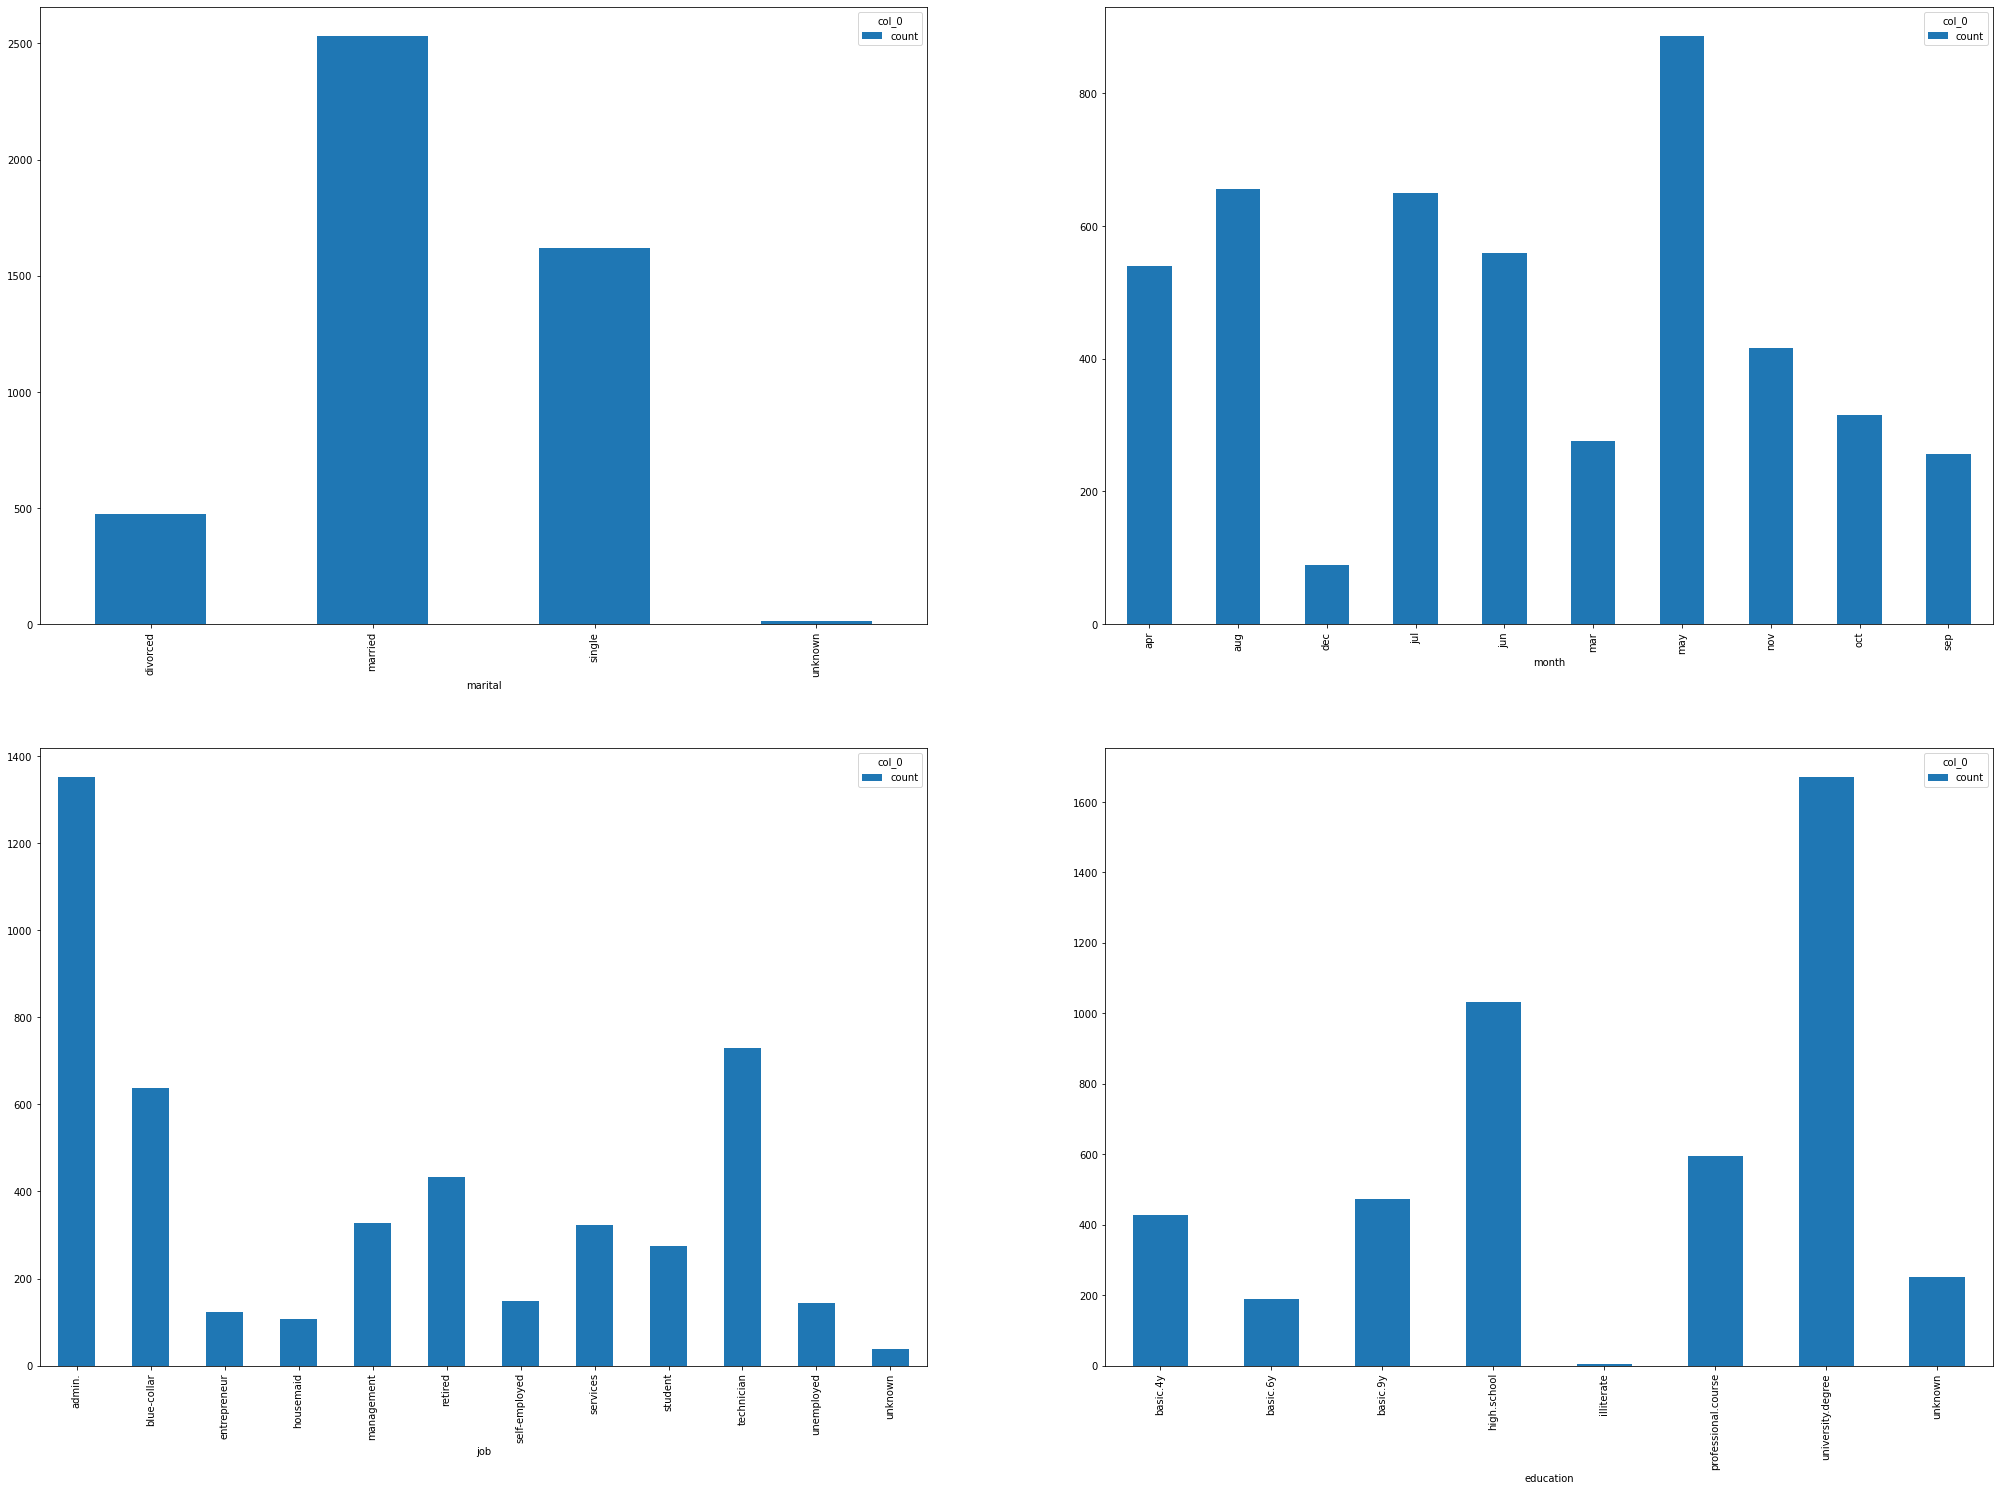

In [22]:
bank_yes = bank_df[bank_df['y']==1]
df1 = pd.crosstab(index = bank_yes["marital"],columns="count")    
df2 = pd.crosstab(index = bank_yes["month"],columns="count")  
df3= pd.crosstab(index = bank_yes["job"],columns="count") 
df4=pd.crosstab(index = bank_yes["education"],columns="count")
plt.figure(figsize=(35,15))
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(35,25))
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])

## Positive and Negative Target Analysis with attributes:

In [36]:
def barPerc(df,xVar,ax):
    
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

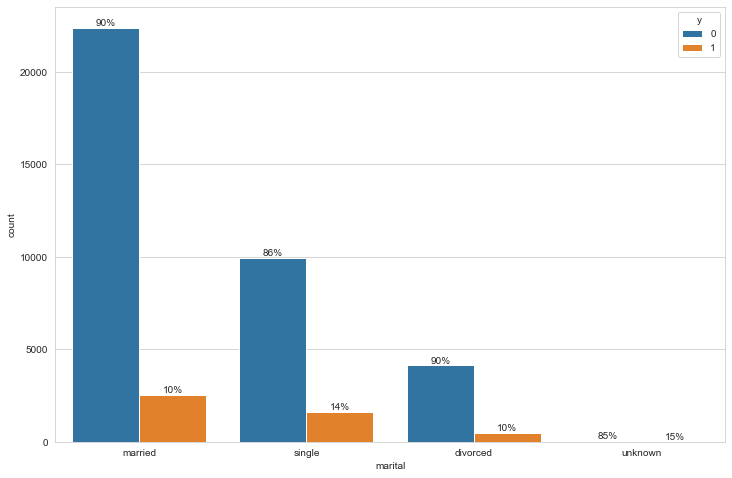

In [37]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="marital",hue='y',data=bank_df)
barPerc(bank_df,'marital',ax)

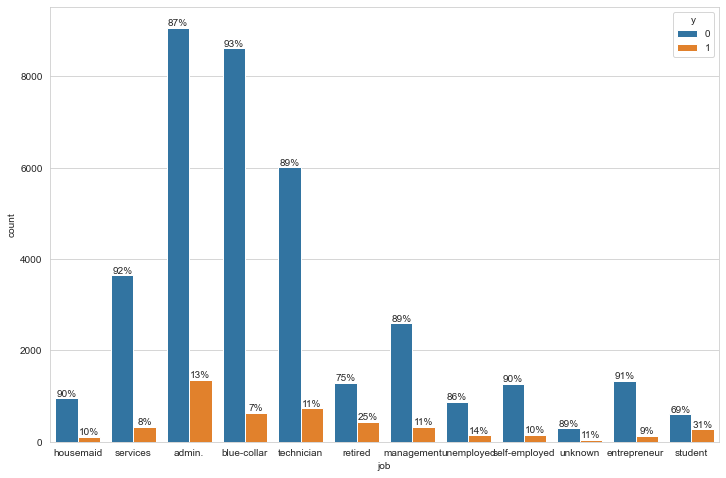

In [38]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="job",hue='y',data=bank_df)
barPerc(bank_df,'job',ax)

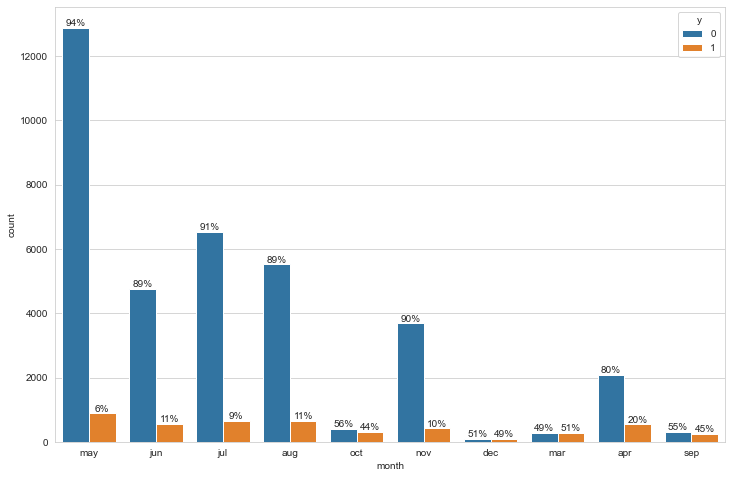

In [39]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="month",hue='y',data=bank_df)
barPerc(bank_df,'month',ax)

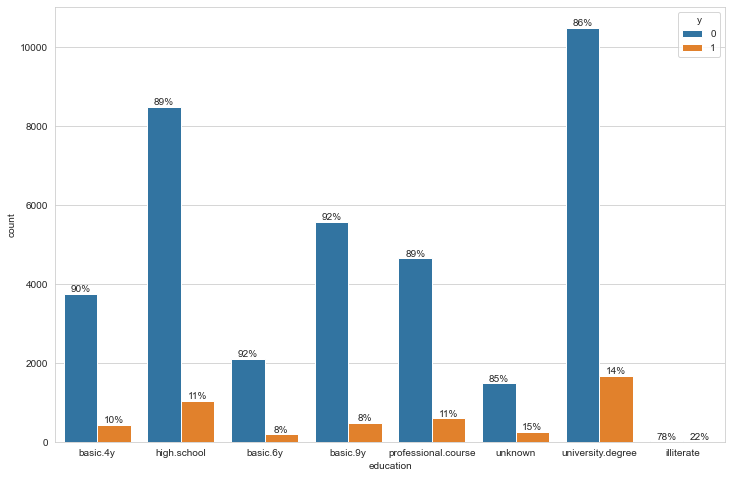

In [40]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="education",hue='y',data=bank_df)
barPerc(bank_df,'education',ax)

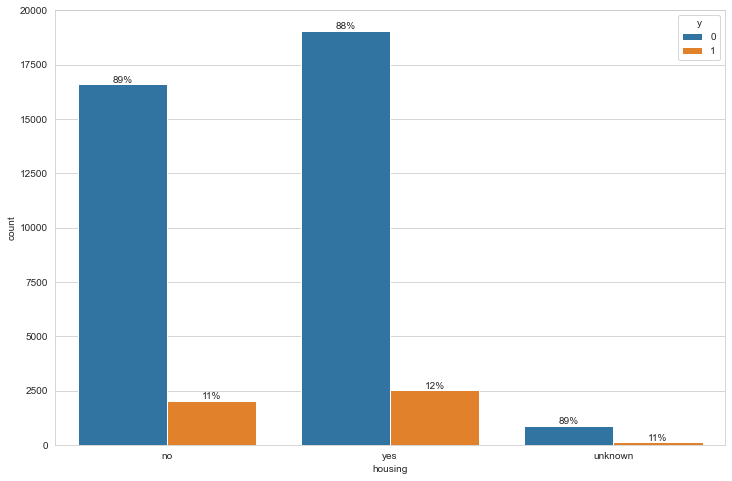

In [41]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="housing",hue='y',data=bank_df)
barPerc(bank_df,'housing',ax)

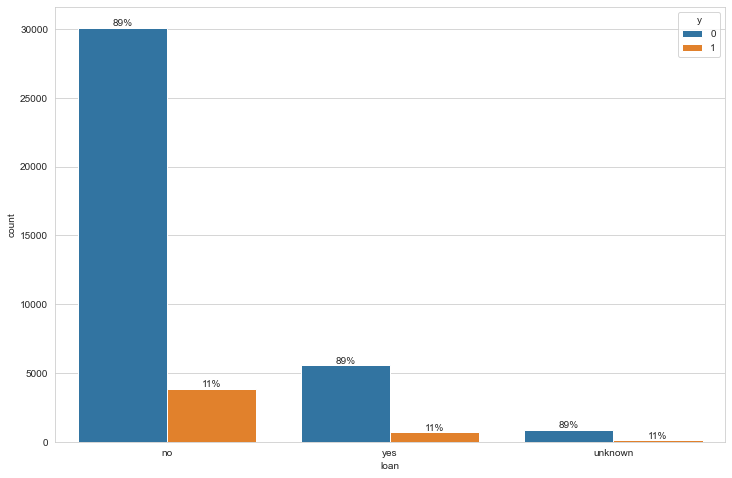

In [42]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="loan",hue='y',data=bank_df)
barPerc(bank_df,'loan',ax)

## Categorical-Categorical Analysis :

bibariate analysis of marriatal staus and job
-----------------------------------------------
marital        divorced  married  single  unknown
job                                              
admin.             1280     5253    3875       14
blue-collar         728     6687    1825       14
entrepreneur        179     1071     203        3
housemaid           161      777     119        3
management          331     2089     501        3
retired             348     1274      93        5
self-employed       133      904     379        5
services            532     2294    1137        6
student               9       41     824        1
technician          774     3670    2287       12
unemployed          124      634     251        5
unknown              13      234      74        9


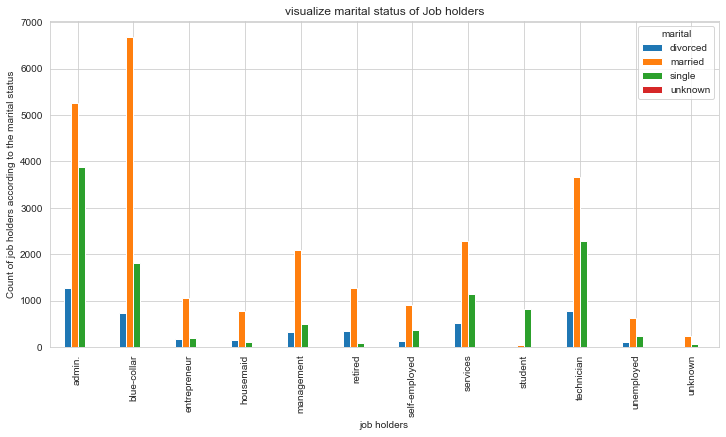

In [43]:
print('bibariate analysis of marriatal staus and job')
print('-----------------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['marital']))
pd.crosstab(bank_df['job'],bank_df['marital']).plot(kind='bar')
plt.title('visualize marital status of Job holders')
plt.xlabel('job holders')
plt.ylabel('Count of job holders according to the marital status')
plt.show()

bibariate analysis of default staus and job
-----------------------------------------------
default          no  unknown  yes
job                              
admin.         9129     1293    0
blue-collar    6088     3166    0
entrepreneur   1155      301    0
housemaid       741      319    0
management     2466      458    0
retired        1327      393    0
self-employed  1139      282    0
services       3053      916    0
student         771      104    0
technician     5765      976    2
unemployed      776      237    1
unknown         178      152    0


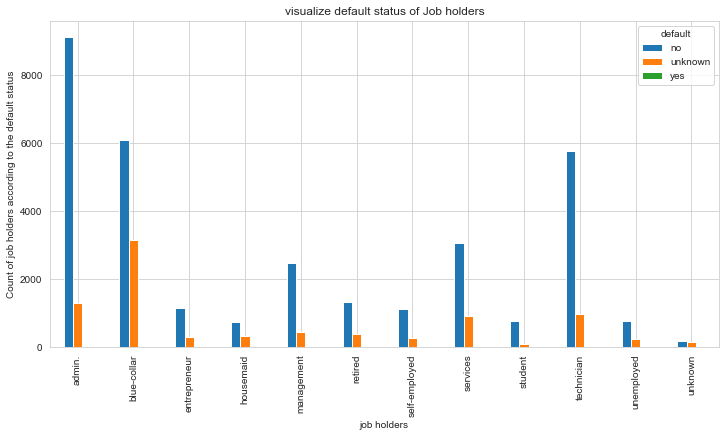

In [44]:
print('bibariate analysis of default staus and job')
print('-----------------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['default']))
pd.crosstab(bank_df['job'],bank_df['default']).plot(kind='bar')
plt.title('visualize default status of Job holders')
plt.xlabel('job holders')
plt.ylabel('Count of job holders according to the default status')
plt.show()

bibariate analysis of education and job
-----------------------------------------
education      basic.4y  basic.6y  basic.9y  high.school  illiterate  \
job                                                                    
admin.               77       151       499         3329           1   
blue-collar        2318      1426      3623          878           8   
entrepreneur        137        71       210          234           2   
housemaid           474        77        94          174           1   
management          100        85       166          298           0   
retired             597        75       145          276           3   
self-employed        93        25       220          118           3   
services            132       226       388         2682           0   
student              26        13        99          357           0   
technician           58        87       384          873           0   
unemployed          112        34       186          2

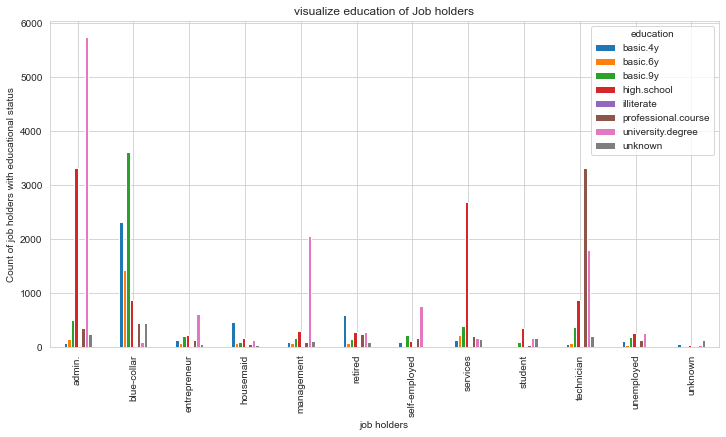

In [45]:
print('bibariate analysis of education and job')
print('-----------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['education']))
pd.crosstab(bank_df['job'],bank_df['education']).plot(kind='bar')
plt.title('visualize education of Job holders')
plt.xlabel('job holders')
plt.ylabel('Count of job holders with educational status')
plt.show()

bibariate analysis of housing and job
---------------------------------------
housing          no  unknown   yes
job                               
admin.         4636      227  5559
blue-collar    4304      240  4710
entrepreneur    641       36   779
housemaid       491       29   540
management     1363       71  1490
retired         784       44   892
self-employed   641       40   740
services       1818      101  2050
student         381       23   471
technician     2980      147  3616
unemployed      430       27   557
unknown         153        5   172


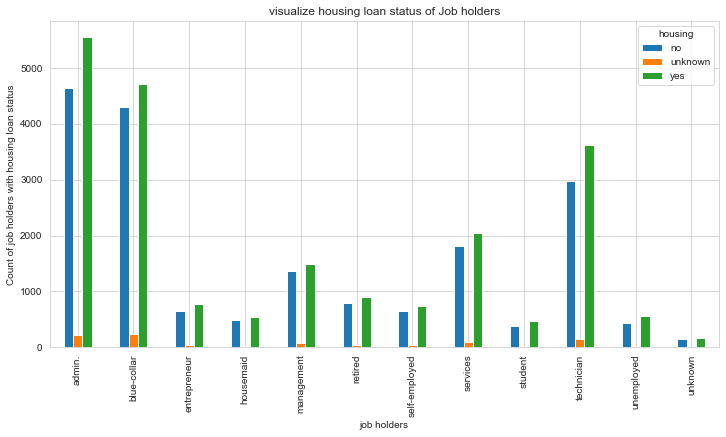

In [46]:
print('bibariate analysis of housing and job')
print('---------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['housing']))
pd.crosstab(bank_df['job'],bank_df['housing']).plot(kind='bar')
plt.title('visualize housing loan status of Job holders')
plt.xlabel('job holders')
plt.ylabel('Count of job holders with housing loan status')
plt.show()

bibariate analysis of loan and job
---------------------------------------
loan             no  unknown   yes
job                               
admin.         8485      227  1710
blue-collar    7648      240  1366
entrepreneur   1214       36   206
housemaid       877       29   154
management     2414       71   439
retired        1436       44   240
self-employed  1186       40   195
services       3267      101   601
student         710       23   142
technician     5607      147   989
unemployed      838       27   149
unknown         268        5    57


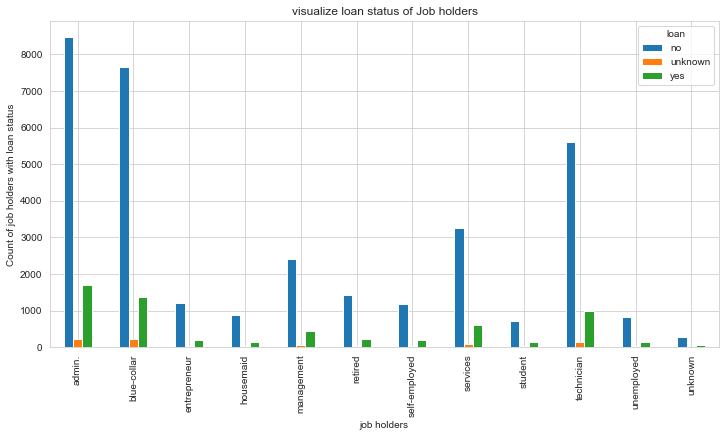

In [47]:
print('bibariate analysis of loan and job')
print('---------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['loan']))
pd.crosstab(bank_df['job'],bank_df['loan']).plot(kind='bar')
plt.title('visualize loan status of Job holders')
plt.xlabel('job holders')
plt.ylabel('Count of job holders with loan status')
plt.show()

bibariate analysis of contact and job
---------------------------------------
contact        cellular  telephone
job                               
admin.             7126       3296
blue-collar        5090       4164
entrepreneur        855        601
housemaid           640        420
management         1902       1022
retired            1231        489
self-employed       893        528
services           2311       1658
student             671        204
technician         4637       2106
unemployed          620        394
unknown             168        162


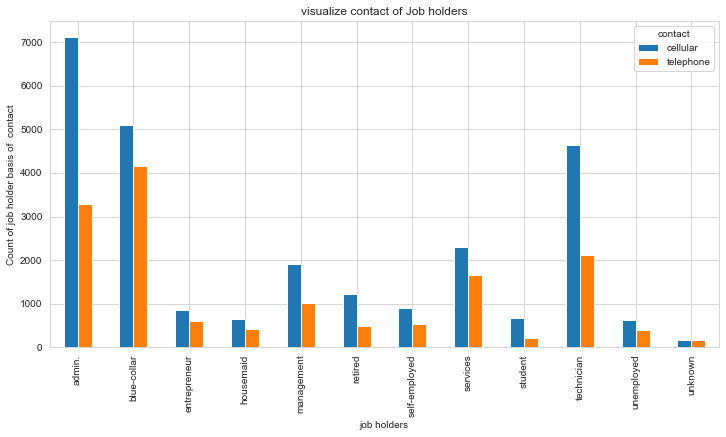

In [48]:
print('bibariate analysis of contact and job')
print('---------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['contact']))
pd.crosstab(bank_df['job'],bank_df['contact']).plot(kind='bar')
plt.title('visualize contact of Job holders')
plt.xlabel('job holders')
plt.ylabel('Count of job holder basis of  contact')
plt.show()

bibariate analysis of month and job
---------------------------------------
month          apr   aug  dec   jul   jun  mar   may   nov  oct  sep
job                                                                 
admin.         644  2039   50  1815  1238  169  3019  1085  197  166
blue-collar    565   582   12  1789  1385   50  4199   602   51   19
entrepreneur   109    74    1   273   217    2   484   269   15   12
housemaid       47   208   10   239   136    6   296    87   19   12
management     195   357   12   399   352   42   909   561   51   46
retired        160   342   33   271   173   64   329   136  126   86
self-employed   97   212    6   220   204   25   418   198   21   20
services       281   280    2   790   542   25  1666   321   33   29
student        104   116   20   105   101   41   232    54   53   49
technician     368  1787   24  1056   738  102  1833   627  116   92
unemployed      53   121   10   165   170   18   264   154   28   31
unknown          9    60   

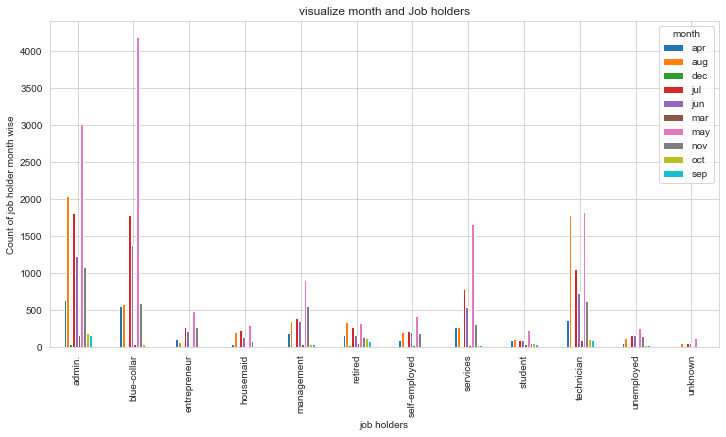

In [49]:
print('bibariate analysis of month and job')
print('---------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['month']))
pd.crosstab(bank_df['job'],bank_df['month']).plot(kind='bar')
plt.title('visualize month and Job holders')
plt.xlabel('job holders')
plt.ylabel('Count of job holder month wise')
plt.show()

bibariate analysis of day_of_week and job
---------------------------------------
day_of_week     fri   mon   thu   tue   wed
job                                        
admin.         2050  2149  2153  2034  2036
blue-collar    1781  1845  1888  1771  1969
entrepreneur    271   322   322   264   277
housemaid       182   228   198   238   214
management      531   640   587   581   585
retired         333   348   317   377   345
self-employed   279   310   336   255   241
services        750   835   830   793   761
student         162   177   197   172   167
technician     1251  1386  1494  1330  1282
unemployed      200   196   230   201   187
unknown          37    78    71    74    70


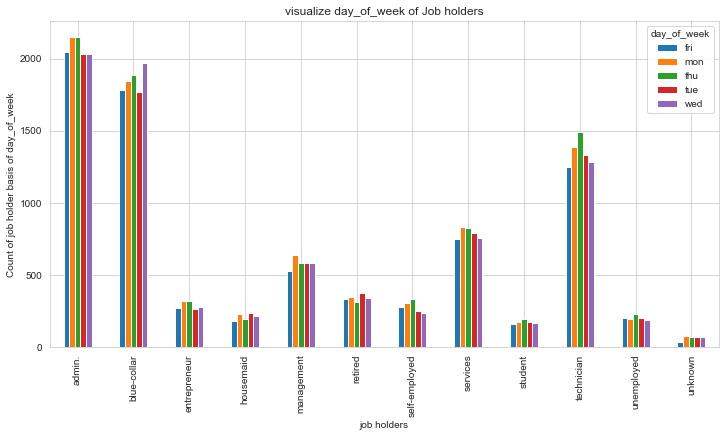

In [50]:
print('bibariate analysis of day_of_week and job')
print('---------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['day_of_week']))
pd.crosstab(bank_df['job'],bank_df['day_of_week']).plot(kind='bar')
plt.title('visualize day_of_week of Job holders')
plt.xlabel('job holders')
plt.ylabel('Count of job holder basis of day_of_week')
plt.show()

bibariate analysis of poutcome and job
---------------------------------------
poutcome       failure  nonexistent  success
job                                         
admin.            1091         8903      428
blue-collar        886         8249      119
entrepreneur       154         1277       25
housemaid           74          948       38
management         331         2498       95
retired            230         1332      158
self-employed      145         1246       30
services           448         3451       70
student            163          594      118
technician         618         5914      211
unemployed          94          858       62
unknown             18          293       19


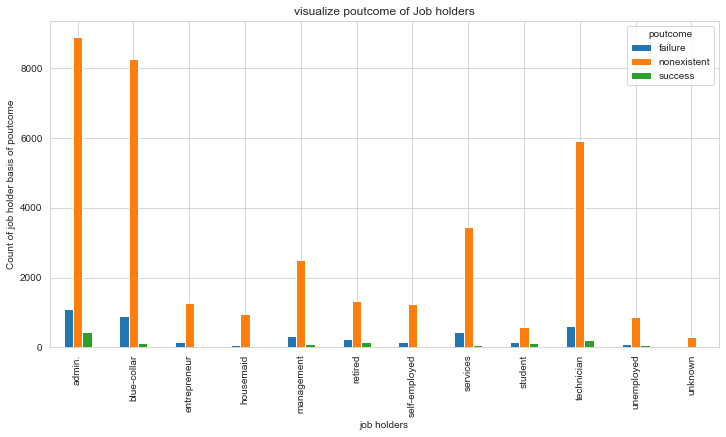

In [51]:
print('bibariate analysis of poutcome and job')
print('---------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['poutcome']))
pd.crosstab(bank_df['job'],bank_df['poutcome']).plot(kind='bar')
plt.title('visualize poutcome of Job holders')
plt.xlabel('job holders')
plt.ylabel('Count of job holder basis of poutcome')
plt.show()

bibariate analysis of mariatl and education
---------------------------------------
marital              divorced  married  single  unknown
education                                              
basic.4y                  489     3228     453        6
basic.6y                  182     1767     337        6
basic.9y                  565     4156    1316        8
high.school              1193     5158    3150       14
illiterate                  2       15       1        0
professional.course       657     3156    1424        6
university.degree        1337     6394    4406       31
unknown                   187     1054     481        9


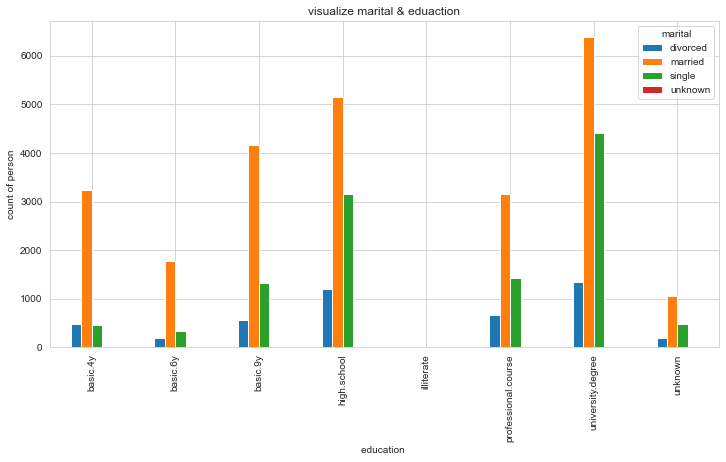

In [52]:
print('bibariate analysis of mariatl and education')
print('---------------------------------------')
print(pd.crosstab(bank_df['education'],bank_df['marital']))
pd.crosstab(bank_df['education'],bank_df['marital']).plot(kind='bar')
plt.title('visualize marital & eduaction')
plt.xlabel('education ')
plt.ylabel('count of person')
plt.show()

bibariate analysis of mariatl and default
---------------------------------------
marital  divorced  married  single  unknown
default                                    
no           3781    18655   10083       69
unknown       831     6270    1485       11
yes             0        3       0        0


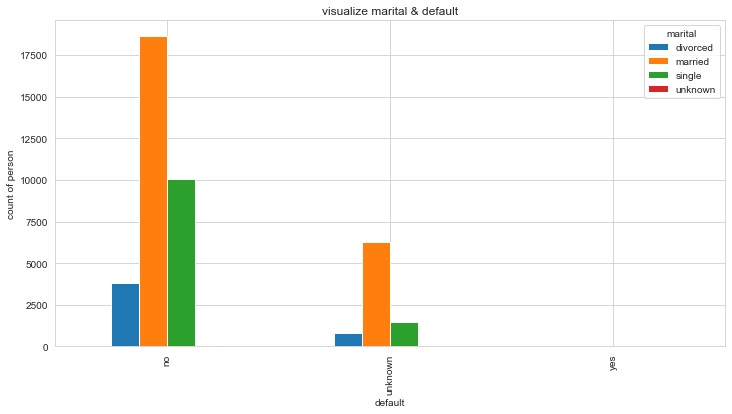

In [53]:
print('bibariate analysis of mariatl and default')
print('---------------------------------------')
print(pd.crosstab(bank_df['default'],bank_df['marital']))
pd.crosstab(bank_df['default'],bank_df['marital']).plot(kind='bar')
plt.title('visualize marital & default')
plt.xlabel('default')
plt.ylabel('count of person')
plt.show()

bibariate analysis of marital and housing
---------------------------------------
marital  divorced  married  single  unknown
housing                                    
no           2092    11389    5097       44
unknown       121      588     280        1
yes          2399    12951    6191       35


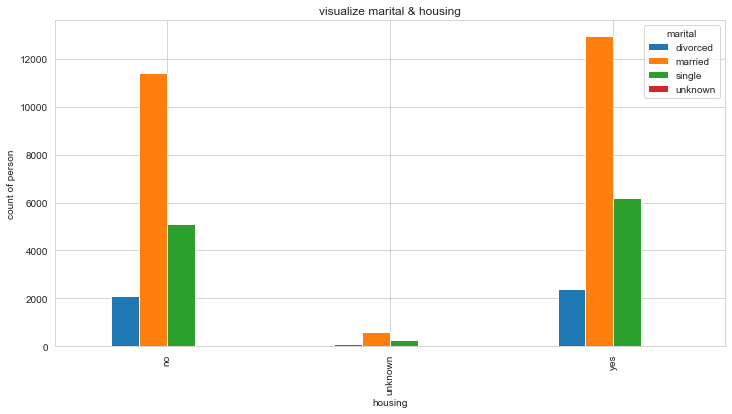

In [54]:
print('bibariate analysis of marital and housing')
print('---------------------------------------')
print(pd.crosstab(bank_df['housing'],bank_df['marital']))
pd.crosstab(bank_df['housing'],bank_df['marital']).plot(kind='bar')
plt.title('visualize marital & housing')
plt.xlabel('housing')
plt.ylabel('count of person')
plt.show()

bibariate analysis of marital and loan
---------------------------------------
marital  divorced  married  single  unknown
loan                                       
no           3816    20567    9500       67
unknown       121      588     280        1
yes           675     3773    1788       12


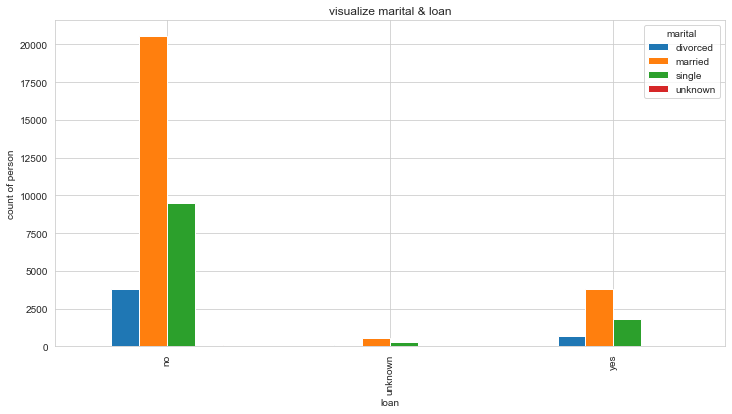

In [55]:
print('bibariate analysis of marital and loan')
print('---------------------------------------')
print(pd.crosstab(bank_df['loan'],bank_df['marital']))
pd.crosstab(bank_df['loan'],bank_df['marital']).plot(kind='bar')
plt.title('visualize marital & loan')
plt.xlabel('loan')
plt.ylabel('count of person')
plt.show()

bibariate analysis of marital and contact
---------------------------------------
marital    divorced  married  single  unknown
contact                                      
cellular       2908    15206    7977       53
telephone      1704     9722    3591       27


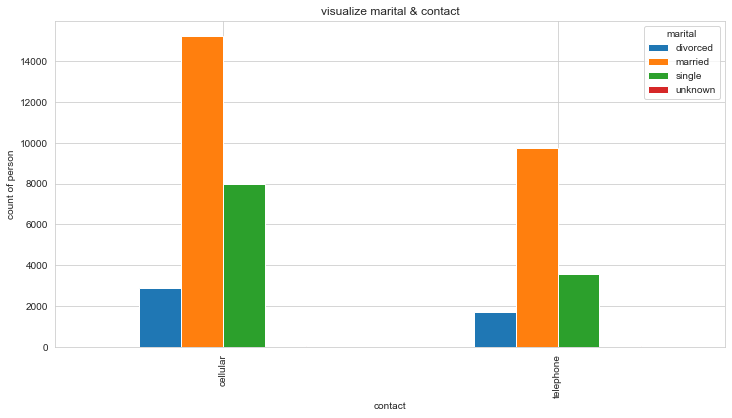

In [56]:
print('bibariate analysis of marital and contact')
print('---------------------------------------')
print(pd.crosstab(bank_df['contact'],bank_df['marital']))
pd.crosstab(bank_df['contact'],bank_df['marital']).plot(kind='bar')
plt.title('visualize marital & contact')
plt.xlabel('contact')
plt.ylabel('count of person')
plt.show()

bibariate analysis of marital and month
---------------------------------------
marital  divorced  married  single  unknown
month                                      
apr           311     1512     806        3
aug           571     4012    1585       10
dec            19      114      49        0
jul           926     3948    2291        9
jun           570     3350    1386       12
mar            60      234     249        3
may          1488     8514    3734       33
nov           550     2514    1030        7
oct            67      399     249        3
sep            50      331     189        0


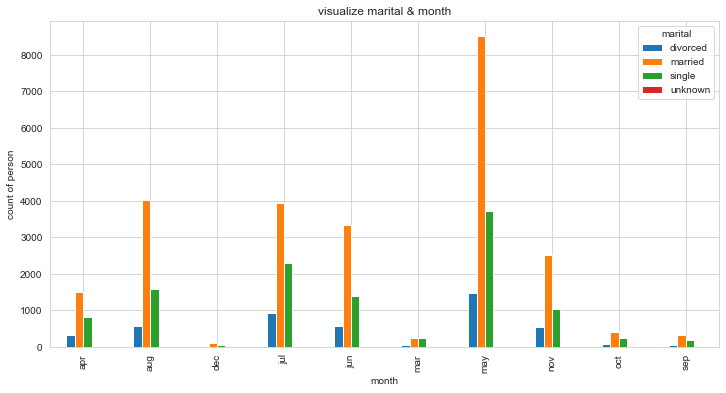

In [57]:
print('bibariate analysis of marital and month')
print('---------------------------------------')
print(pd.crosstab(bank_df['month'],bank_df['marital']))
pd.crosstab(bank_df['month'],bank_df['marital']).plot(kind='bar')
plt.title('visualize marital & month')
plt.xlabel('month')
plt.ylabel('count of person')
plt.show()

bibariate analysis of education and default
-------------------------------------------
default                 no  unknown  yes
education                               
basic.4y              2477     1699    0
basic.6y              1441      851    0
basic.9y              4418     1627    0
high.school           7904     1610    1
illiterate              11        7    0
professional.course   4436      805    2
university.degree    10718     1450    0
unknown               1183      548    0


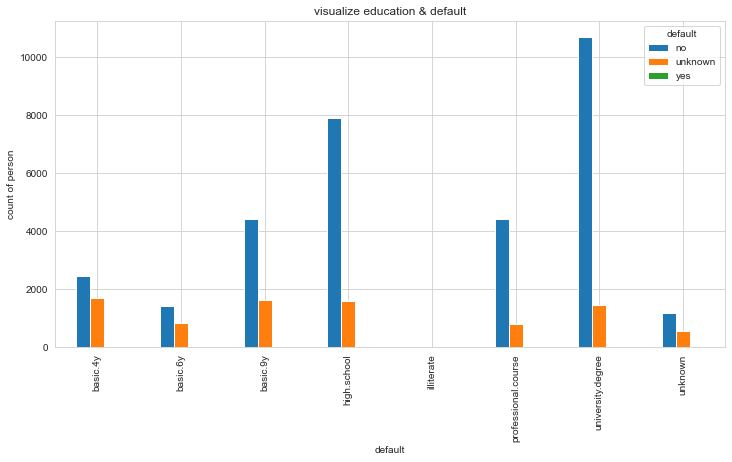

In [58]:
print('bibariate analysis of education and default')
print('-------------------------------------------')
print(pd.crosstab(bank_df['education'],bank_df['default']))
pd.crosstab(bank_df['education'],bank_df['default']).plot(kind='bar')
plt.title('visualize education & default')
plt.xlabel('default')
plt.ylabel('count of person')
plt.show()

bibariate analysis of education and housing
-------------------------------------------
housing                no  unknown   yes
education                               
basic.4y             1955      117  2104
basic.6y             1070       60  1162
basic.9y             2743      151  3151
high.school          4363      220  4932
illiterate              8        0    10
professional.course  2280      125  2838
university.degree    5387      277  6504
unknown               816       40   875


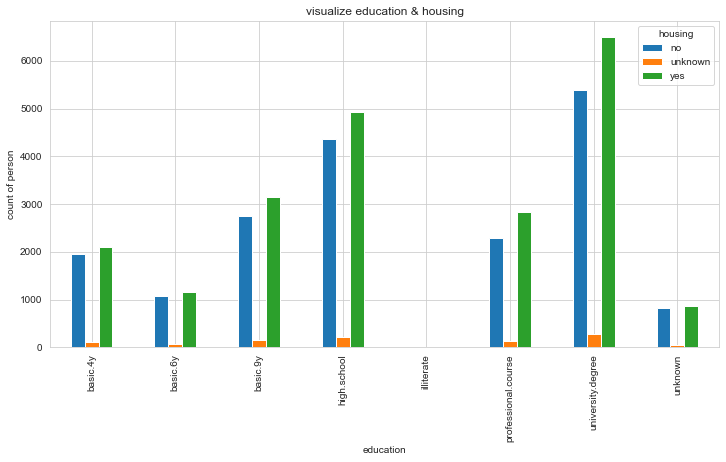

In [59]:
print('bibariate analysis of education and housing')
print('-------------------------------------------')
print(pd.crosstab(bank_df['education'],bank_df['housing']))
pd.crosstab(bank_df['education'],bank_df['housing']).plot(kind='bar')
plt.title('visualize education & housing')
plt.xlabel('education')
plt.ylabel('count of person')
plt.show()

bibariate analysis of education and loan
-------------------------------------------
loan                   no  unknown   yes
education                               
basic.4y             3435      117   624
basic.6y             1902       60   330
basic.9y             5011      151   883
high.school          7852      220  1443
illiterate             15        0     3
professional.course  4325      125   793
university.degree    9961      277  1930
unknown              1449       40   242


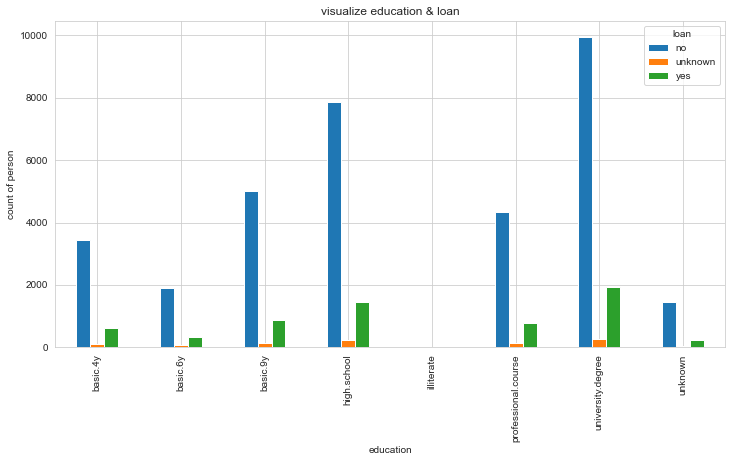

In [60]:
print('bibariate analysis of education and loan')
print('-------------------------------------------')
print(pd.crosstab(bank_df['education'],bank_df['loan']))
pd.crosstab(bank_df['education'],bank_df['loan']).plot(kind='bar')
plt.title('visualize education & loan')
plt.xlabel('education')
plt.ylabel('count of person')
plt.show()

bibariate analysis of education and contact
-------------------------------------------
contact              cellular  telephone
education                               
basic.4y                 2350       1826
basic.6y                 1247       1045
basic.9y                 3452       2593
high.school              5928       3587
illiterate                 15          3
professional.course      3478       1765
university.degree        8657       3511
unknown                  1017        714


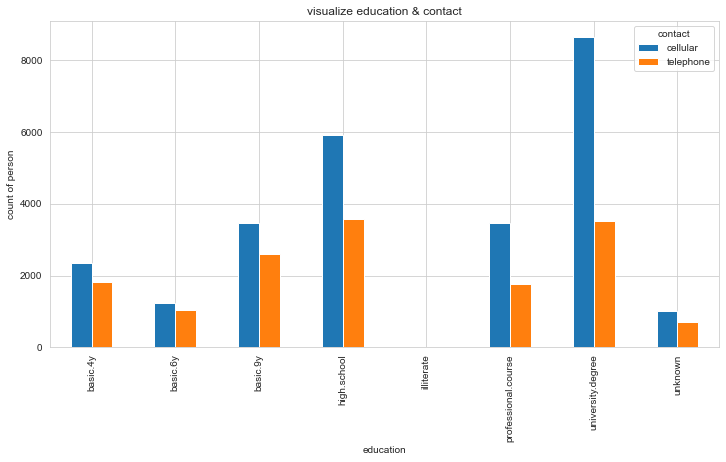

In [61]:
print('bibariate analysis of education and contact')
print('-------------------------------------------')
print(pd.crosstab(bank_df['education'],bank_df['contact']))
pd.crosstab(bank_df['education'],bank_df['contact']).plot(kind='bar')
plt.title('visualize education & contact')
plt.xlabel('education')
plt.ylabel('count of person')
plt.show()

<AxesSubplot:xlabel='default'>

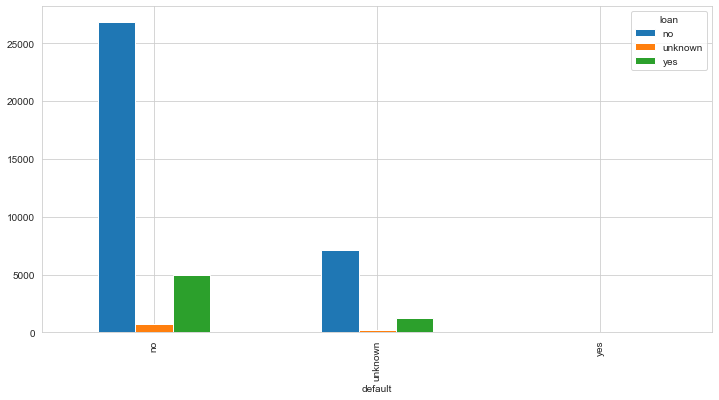

In [62]:
pd.crosstab(bank_df['default'],bank_df['loan']).plot(kind='bar')

<AxesSubplot:xlabel='default'>

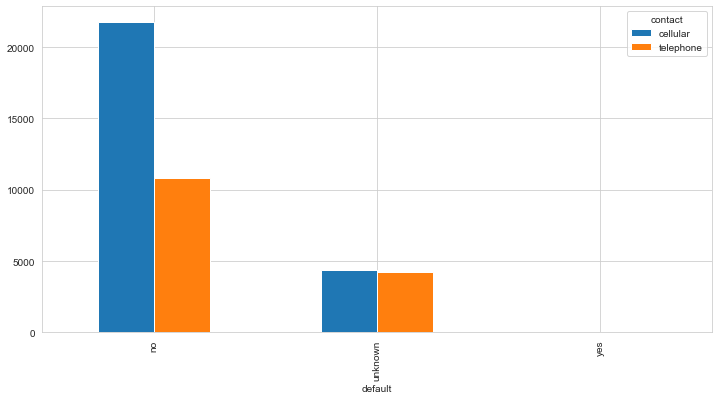

In [63]:
pd.crosstab(bank_df['default'],bank_df['contact']).plot(kind='bar')

<AxesSubplot:xlabel='default'>

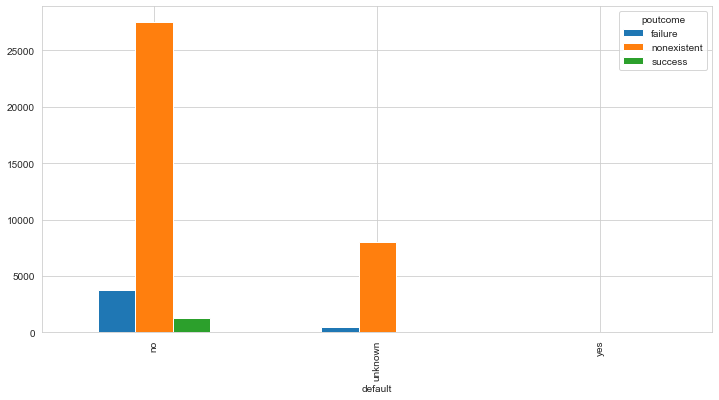

In [64]:
pd.crosstab(bank_df['default'],bank_df['poutcome']).plot(kind='bar')

<AxesSubplot:xlabel='housing'>

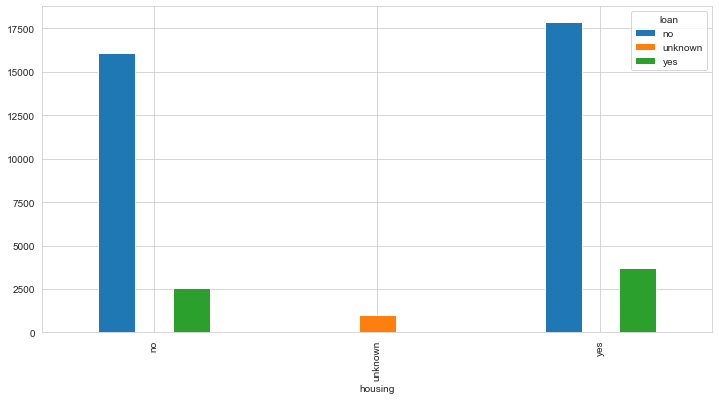

In [65]:
pd.crosstab(bank_df['housing'],bank_df['loan']).plot(kind='bar')

<AxesSubplot:xlabel='housing'>

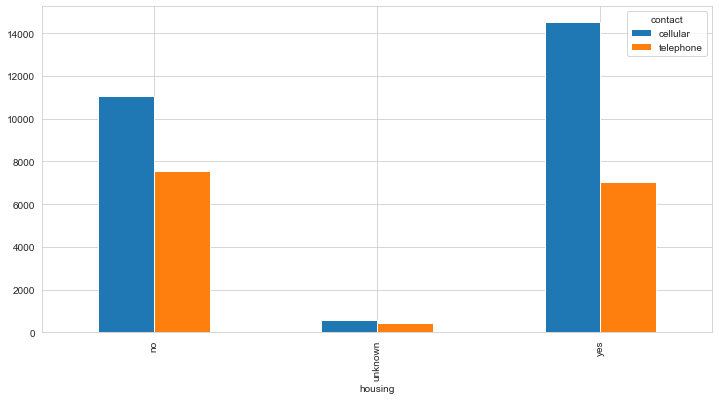

In [66]:
pd.crosstab(bank_df['housing'],bank_df['contact']).plot(kind='bar')

<AxesSubplot:xlabel='month'>

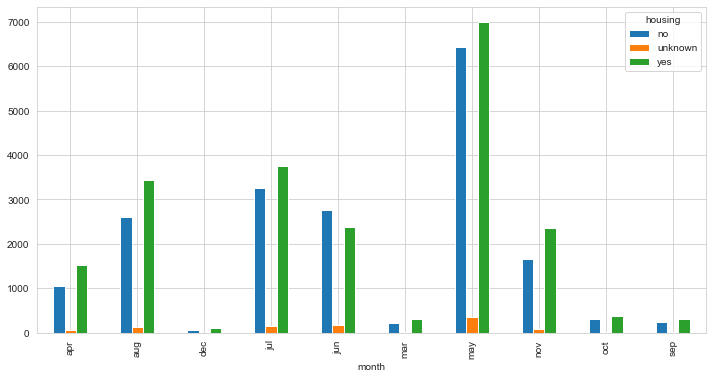

In [67]:
pd.crosstab(bank_df['month'],bank_df['housing']).plot(kind='bar')

<AxesSubplot:xlabel='day_of_week'>

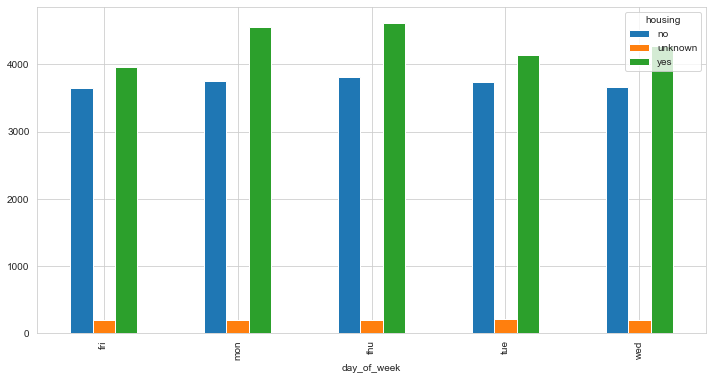

In [68]:
pd.crosstab(bank_df['day_of_week'],bank_df['housing']).plot(kind='bar')

<AxesSubplot:xlabel='housing'>

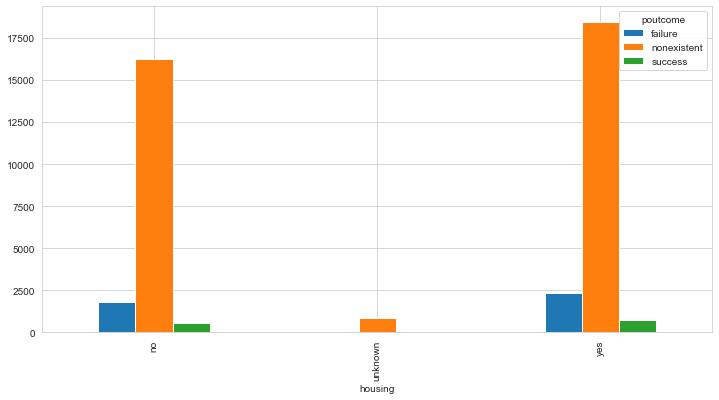

In [69]:
pd.crosstab(bank_df['housing'],bank_df['poutcome']).plot(kind='bar')

<AxesSubplot:xlabel='loan'>

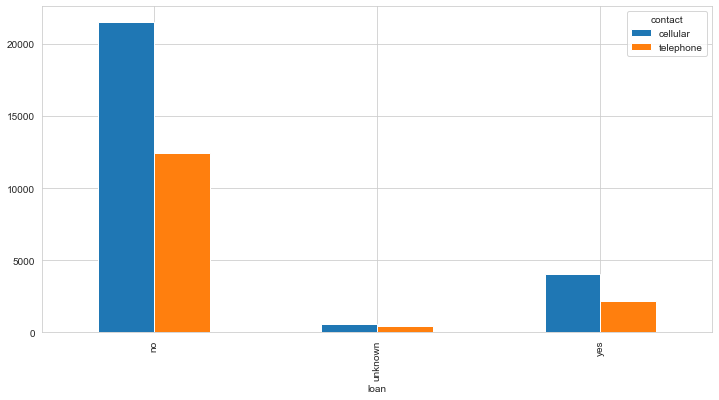

In [70]:
pd.crosstab(bank_df['loan'],bank_df['contact']).plot(kind='bar')

<AxesSubplot:xlabel='month'>

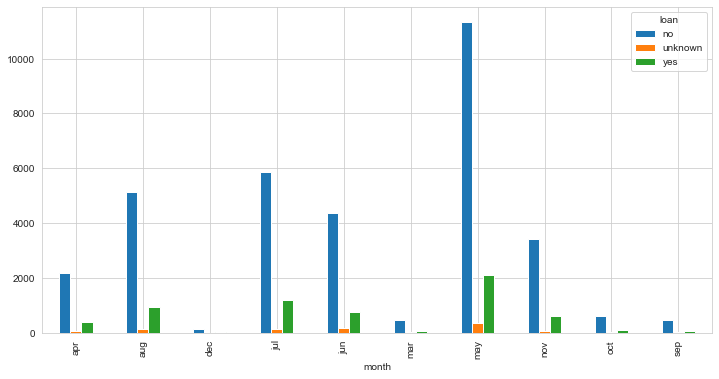

In [71]:
pd.crosstab(bank_df['month'],bank_df['loan']).plot(kind='bar')

<AxesSubplot:xlabel='day_of_week'>

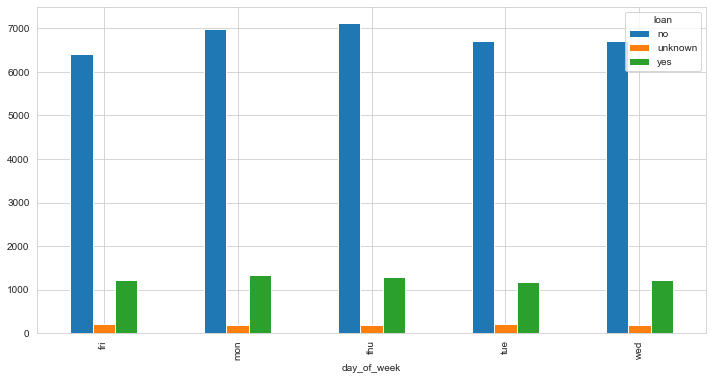

In [72]:
pd.crosstab(bank_df['day_of_week'],bank_df['loan']).plot(kind='bar')

<AxesSubplot:xlabel='loan'>

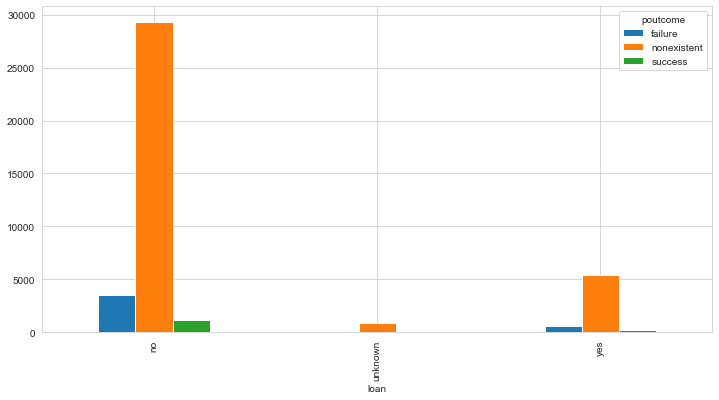

In [73]:
pd.crosstab(bank_df['loan'],bank_df['poutcome']).plot(kind='bar')

<AxesSubplot:xlabel='month'>

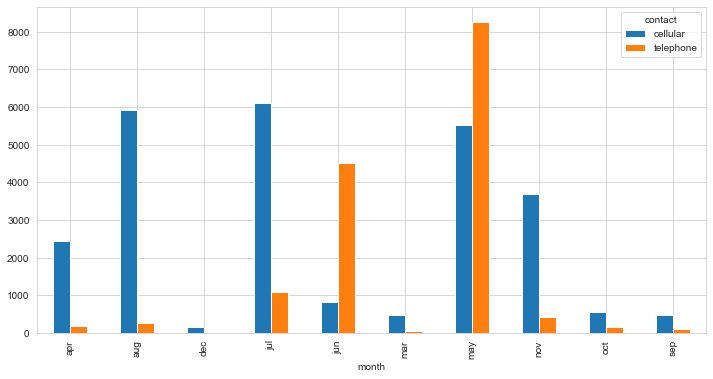

In [74]:
pd.crosstab(bank_df['month'],bank_df['contact']).plot(kind='bar')

<AxesSubplot:xlabel='day_of_week'>

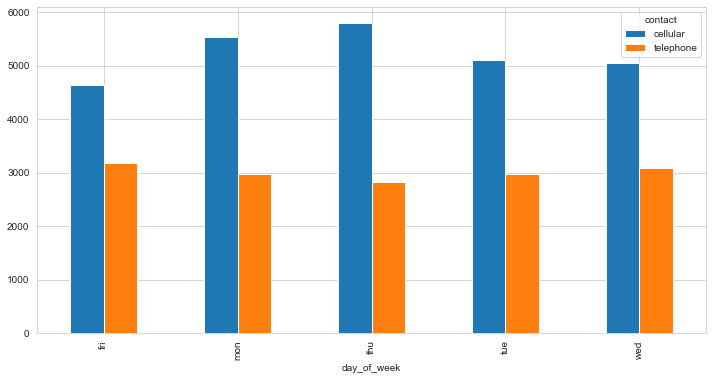

In [75]:
pd.crosstab(bank_df['day_of_week'],bank_df['contact']).plot(kind='bar')

<AxesSubplot:xlabel='poutcome'>

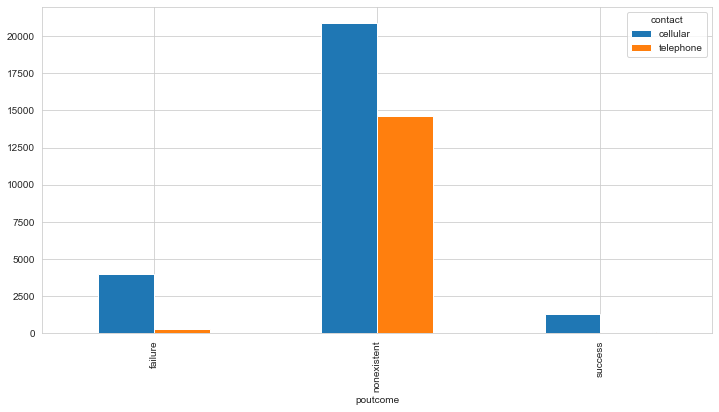

In [76]:
pd.crosstab(bank_df['poutcome'],bank_df['contact']).plot(kind='bar')

<AxesSubplot:xlabel='month'>

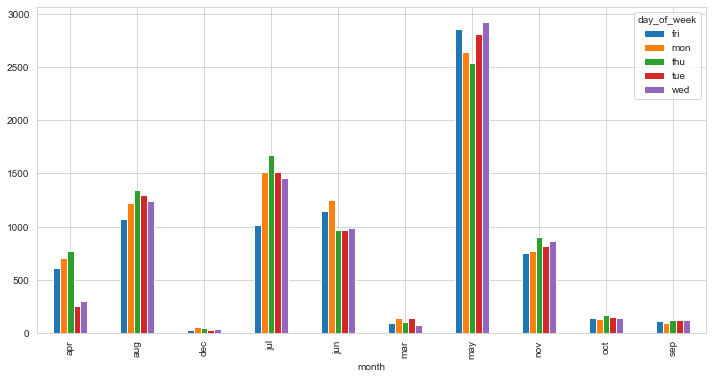

In [77]:
pd.crosstab(bank_df['month'],bank_df['day_of_week']).plot(kind='bar')

<AxesSubplot:xlabel='month'>

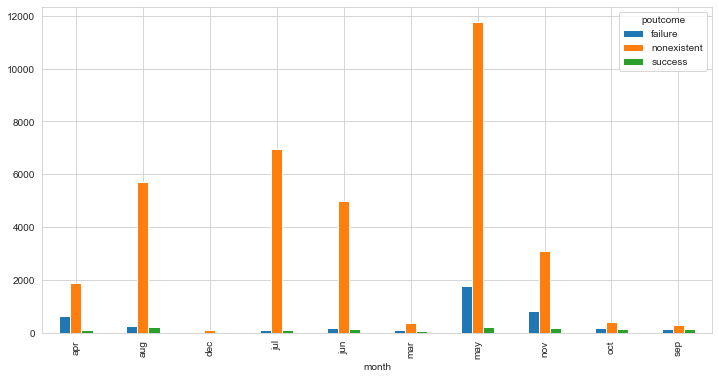

In [78]:
pd.crosstab(bank_df['month'],bank_df['poutcome']).plot(kind='bar')

<AxesSubplot:xlabel='day_of_week'>

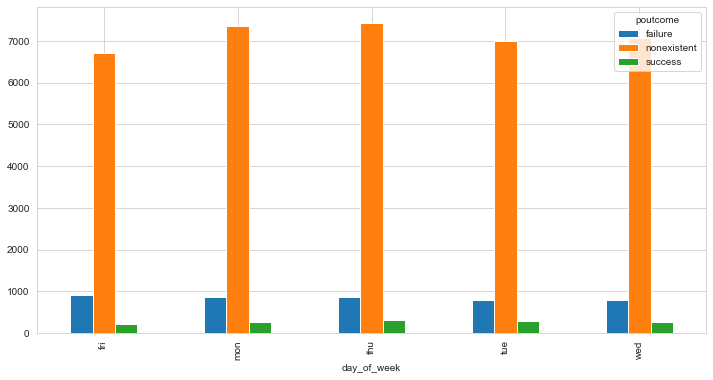

In [79]:
pd.crosstab(bank_df['day_of_week'],bank_df['poutcome']).plot(kind='bar')

## Numerical- Target Analysis :

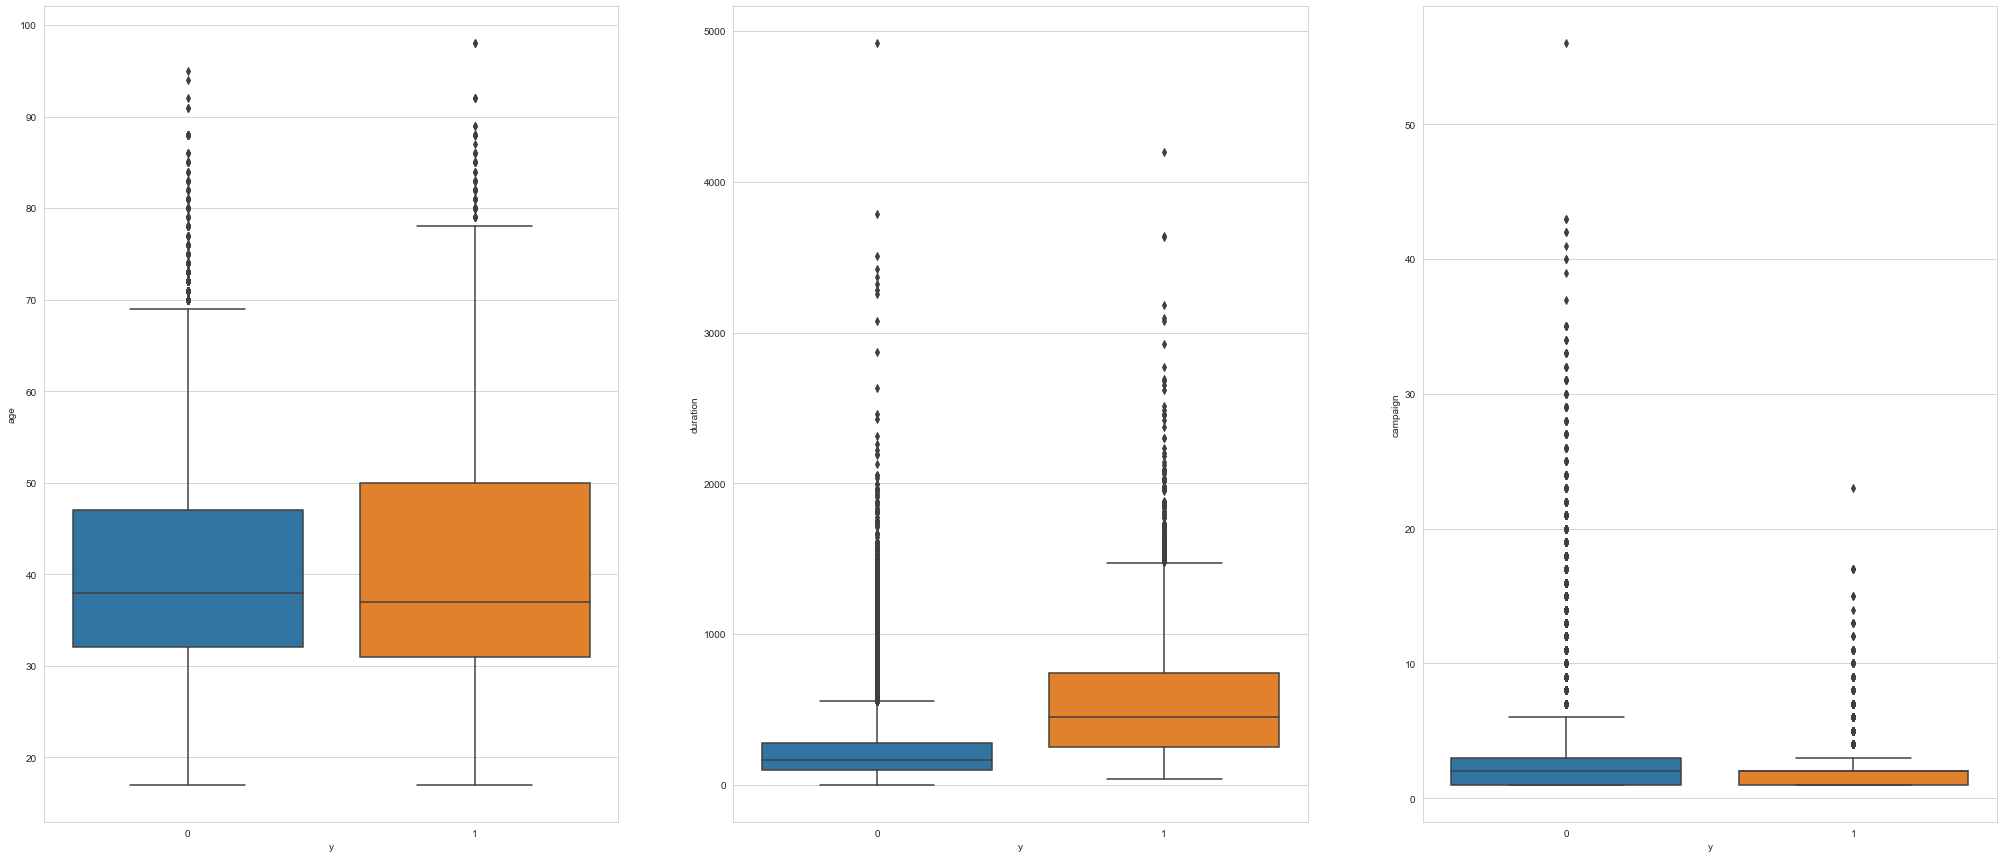

In [80]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.boxplot(x='y',y='age',data=bank_df)

plt.subplot(1,3,2)
sns.boxplot(x='y',y='duration',data=bank_df)

plt.subplot(1,3,3)
sns.boxplot(x='y',y='campaign',data=bank_df)

plt.show()

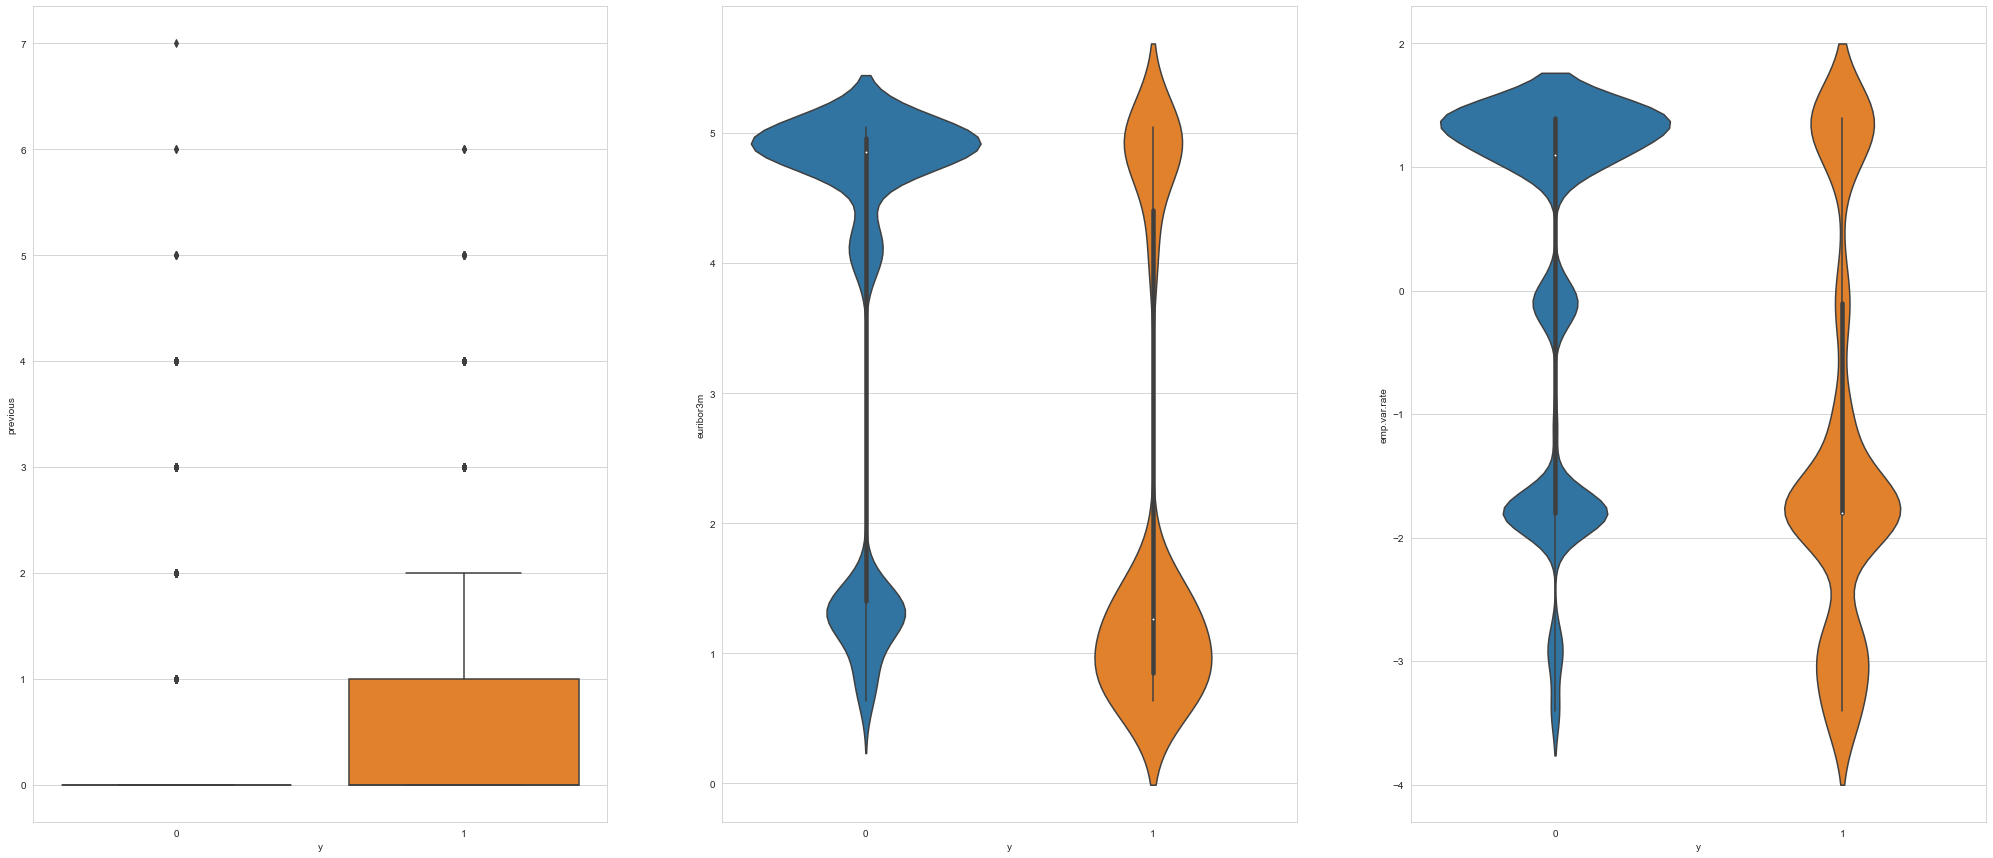

In [81]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.boxplot(x='y',y='previous',data=bank_df)
plt.subplot(1,3,2)
sns.violinplot(x='y',y='euribor3m',data=bank_df)
plt.subplot(1,3,3)
sns.violinplot(x='y',y='emp.var.rate',data=bank_df)
plt.show()

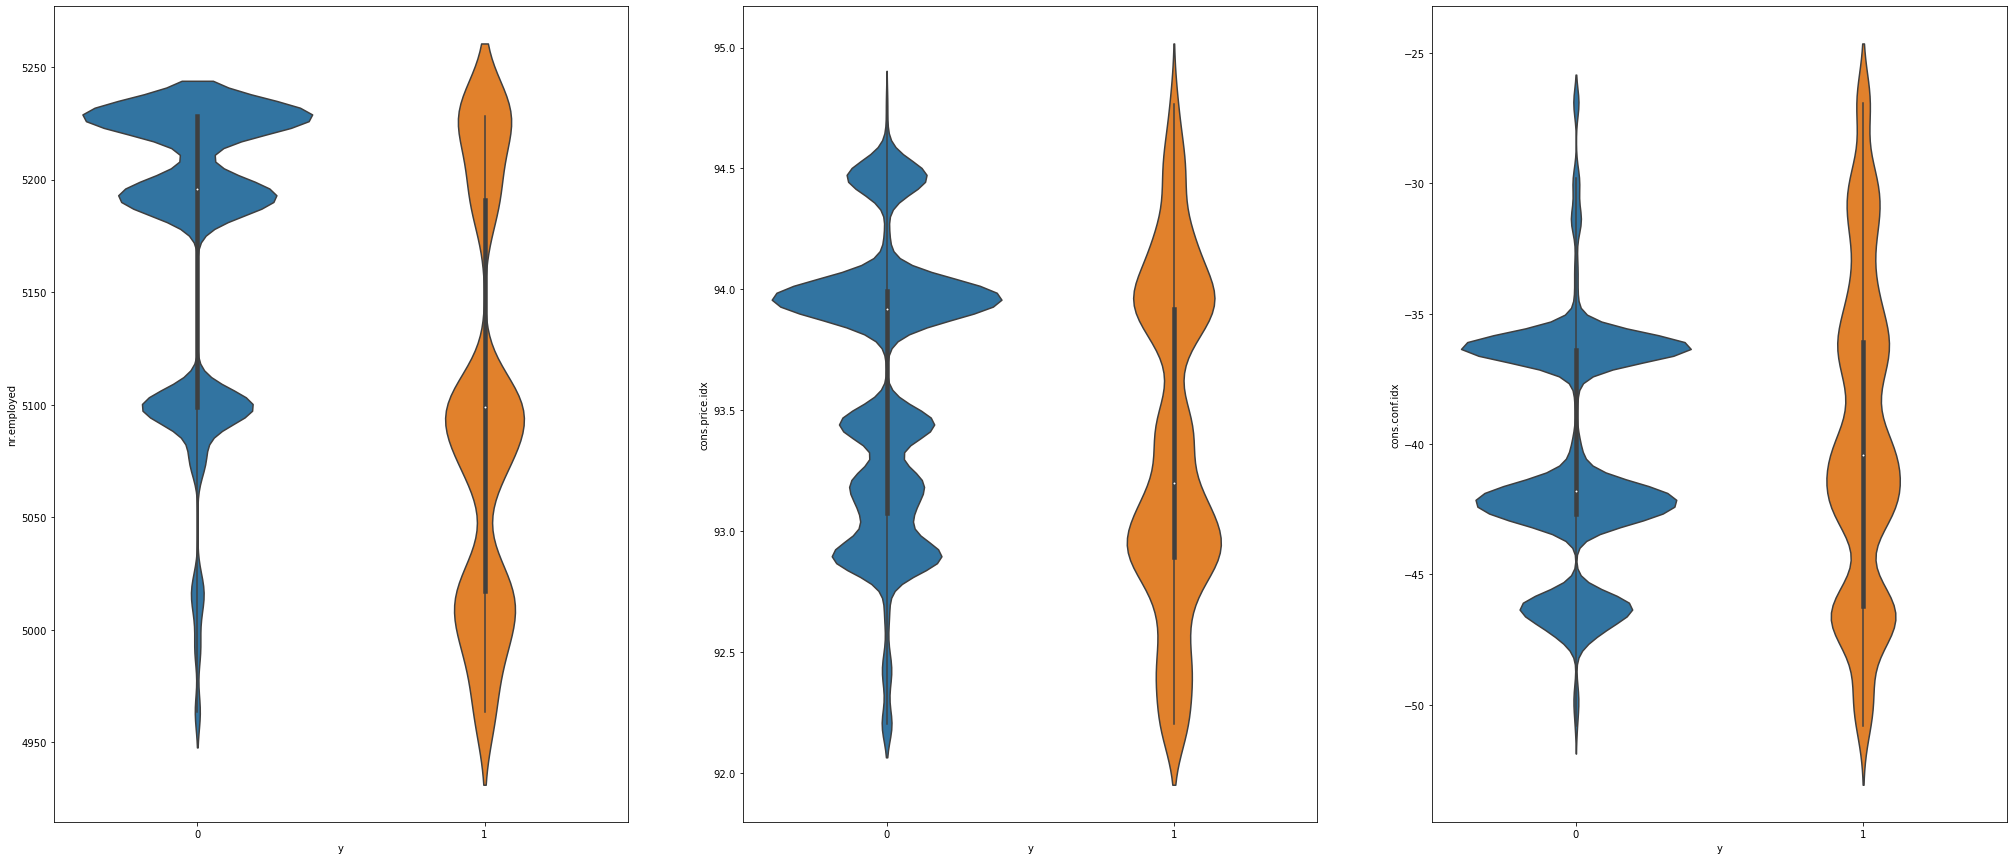

In [60]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='y',y='nr.employed',data=bank_df)
plt.subplot(1,3,2)
sns.violinplot(x='y',y='cons.price.idx',data=bank_df)

plt.subplot(1,3,3)
sns.violinplot(x='y',y='cons.conf.idx',data=bank_df)
plt.show()


## Multivariate Analysis :

<AxesSubplot:xlabel='job', ylabel='duration'>

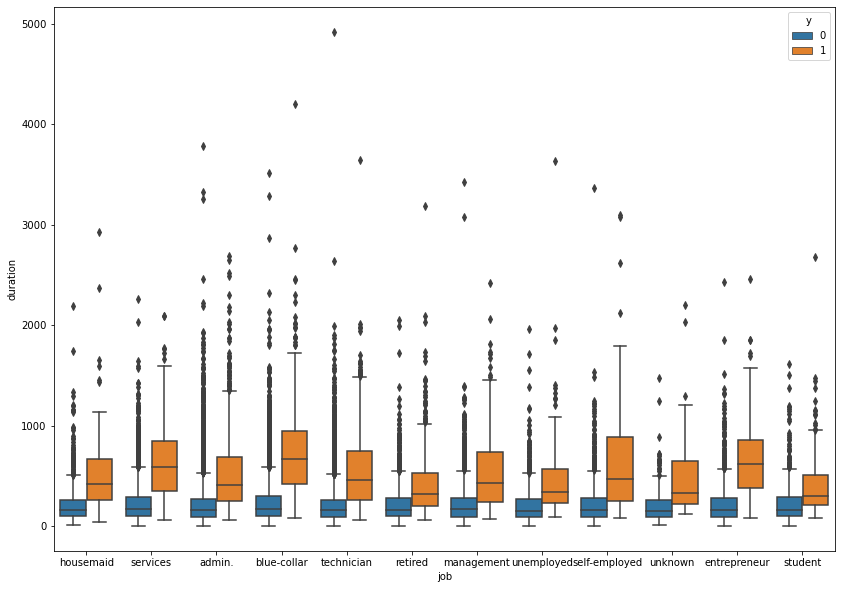

In [150]:
plt.figure(figsize=(14,10))
sns.boxplot(x='job',y='duration',data=bank_df,hue='y')

<AxesSubplot:xlabel='education', ylabel='duration'>

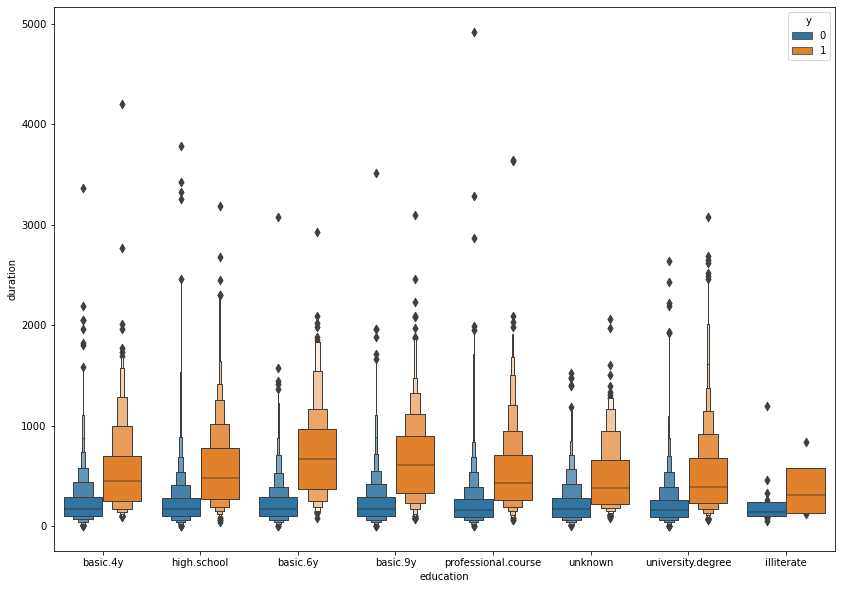

In [152]:
plt.figure(figsize=(14,10))
sns.boxenplot(x='education',y='duration',data=bank_df,hue='y')

<AxesSubplot:xlabel='emp.var.rate', ylabel='duration'>

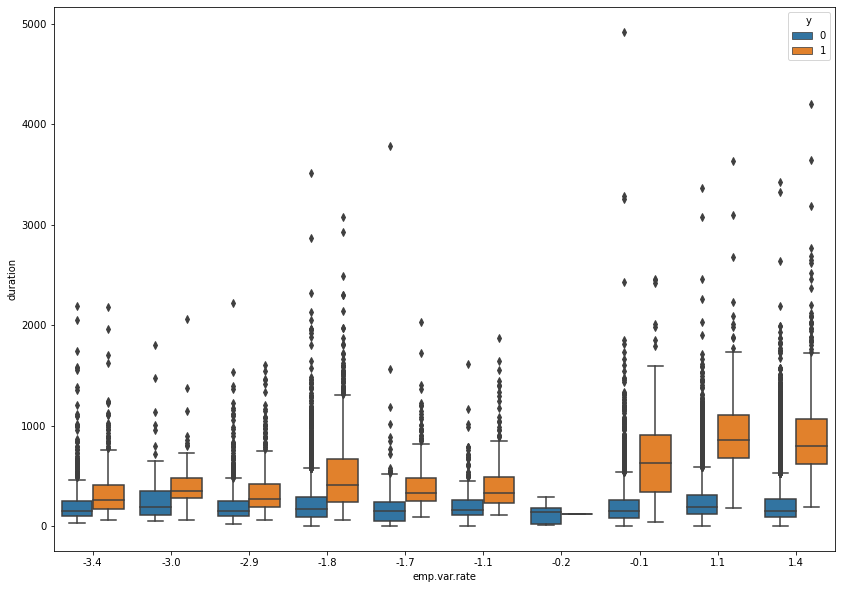

In [153]:
plt.figure(figsize=(14,10))
sns.boxplot(x='emp.var.rate',y='duration',data=bank_df,hue='y')

<AxesSubplot:xlabel='previous', ylabel='duration'>

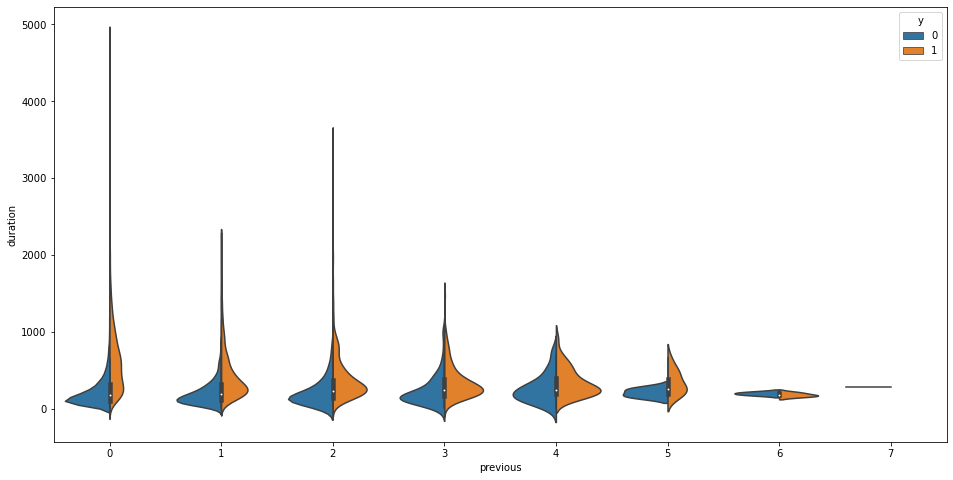

In [154]:
sns.violinplot(x='previous',y='duration',data=bank_df,hue='y',split=True)

<AxesSubplot:xlabel='job', ylabel='age'>

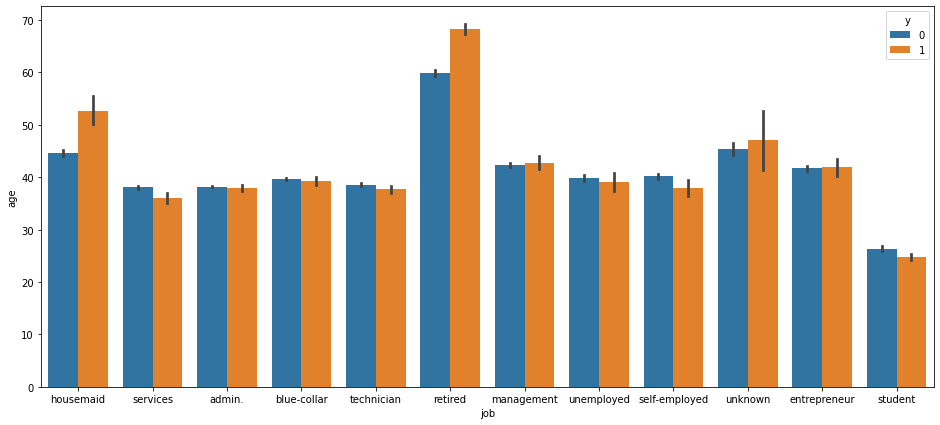

In [155]:
plt.figure(figsize=(16,7))
sns.barplot(x='job',y='age',data=bank_df,hue='y')

<AxesSubplot:xlabel='job', ylabel='campaign'>

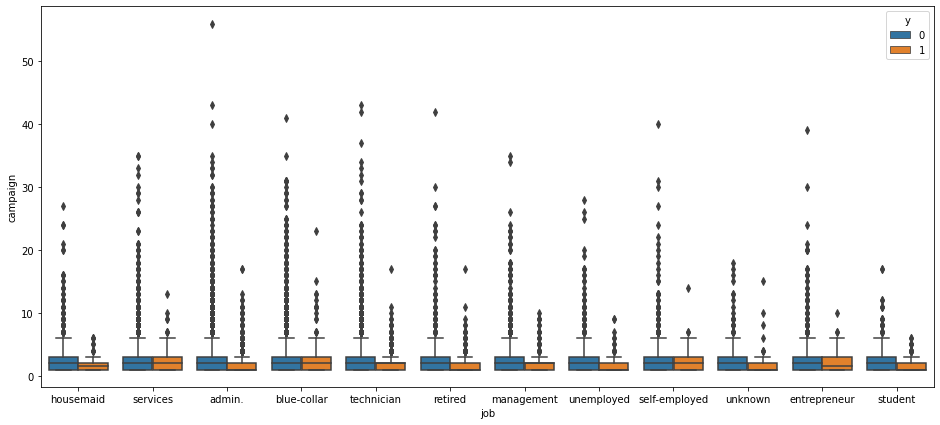

In [156]:
plt.figure(figsize=(16,7))
sns.boxplot(x='job',y='campaign',data=bank_df,hue='y')

<AxesSubplot:xlabel='marital', ylabel='duration'>

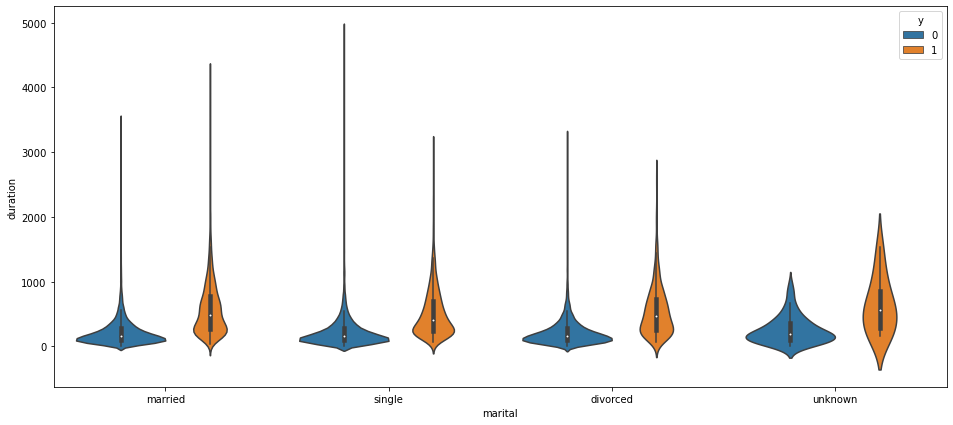

In [157]:
plt.figure(figsize=(16,7))
sns.violinplot(x='marital',y='duration',data=bank_df,hue='y')

<AxesSubplot:xlabel='campaign', ylabel='duration'>

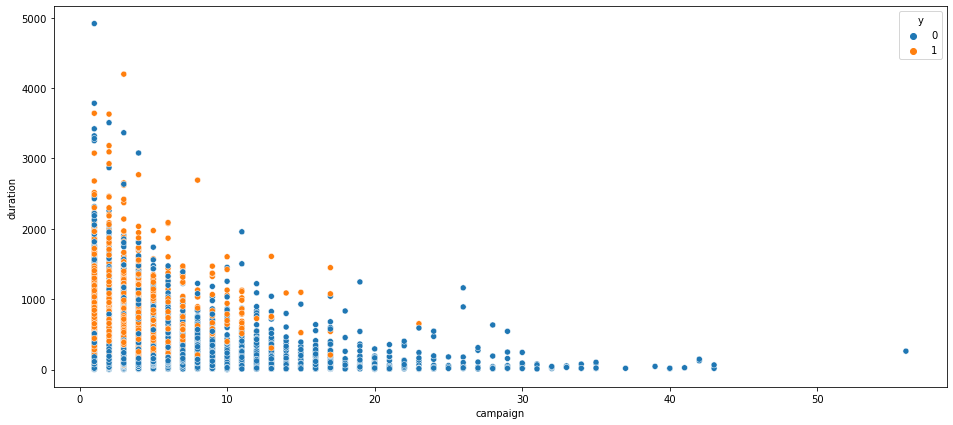

In [158]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='campaign',y='duration',data=bank_df,hue='y')

<AxesSubplot:xlabel='previous', ylabel='duration'>

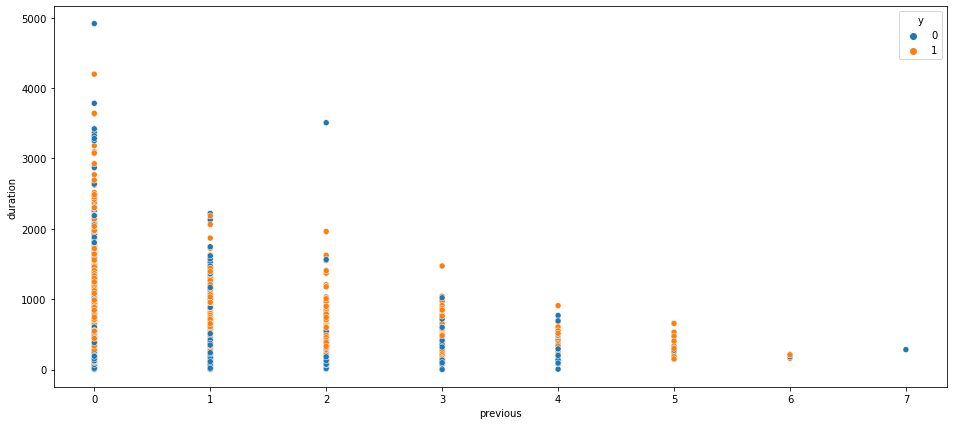

In [161]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='previous',y='duration',data=bank_df,hue='y')

<AxesSubplot:xlabel='marital', ylabel='campaign'>

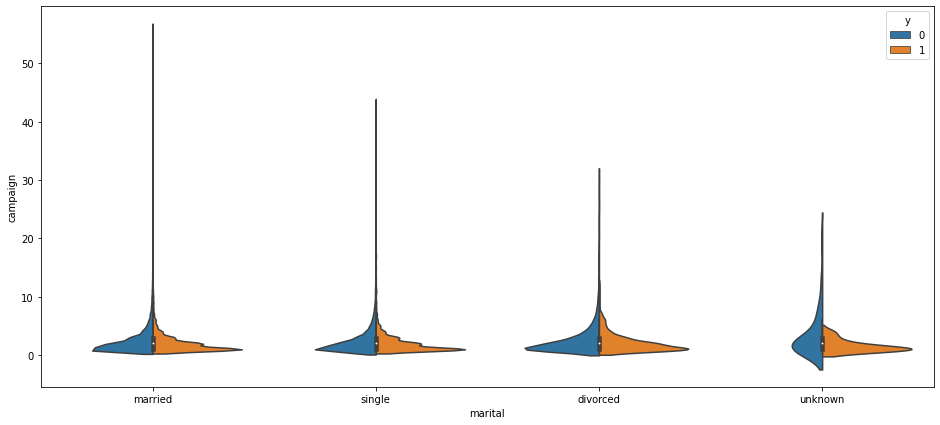

In [159]:
plt.figure(figsize=(16,7))
sns.violinplot(x='marital',y='campaign',data=bank_df,hue='y',split=True)

<AxesSubplot:xlabel='marital', ylabel='campaign'>

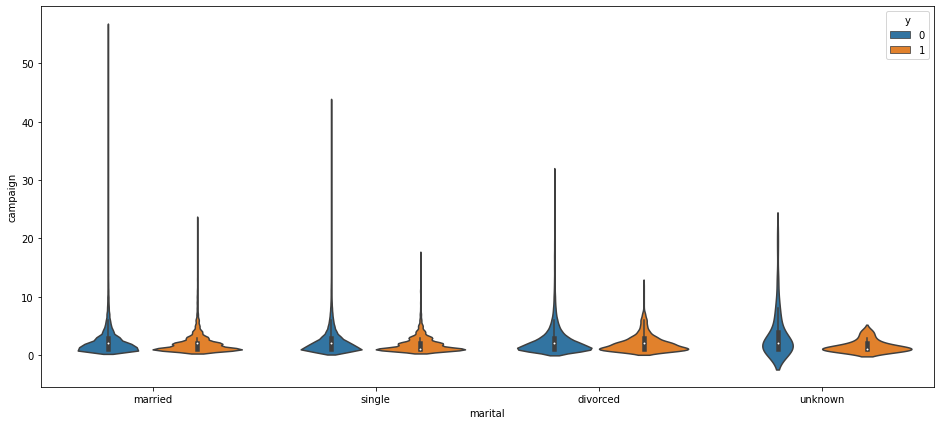

In [160]:
plt.figure(figsize=(16,7))
sns.violinplot(x='marital',y='campaign',data=bank_df,hue='y')

## Outliers Detection And Treatment :

Checking the outliers by its skweness

In [115]:
df_numerical.skew()

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

### Graphical Representation of Outliers

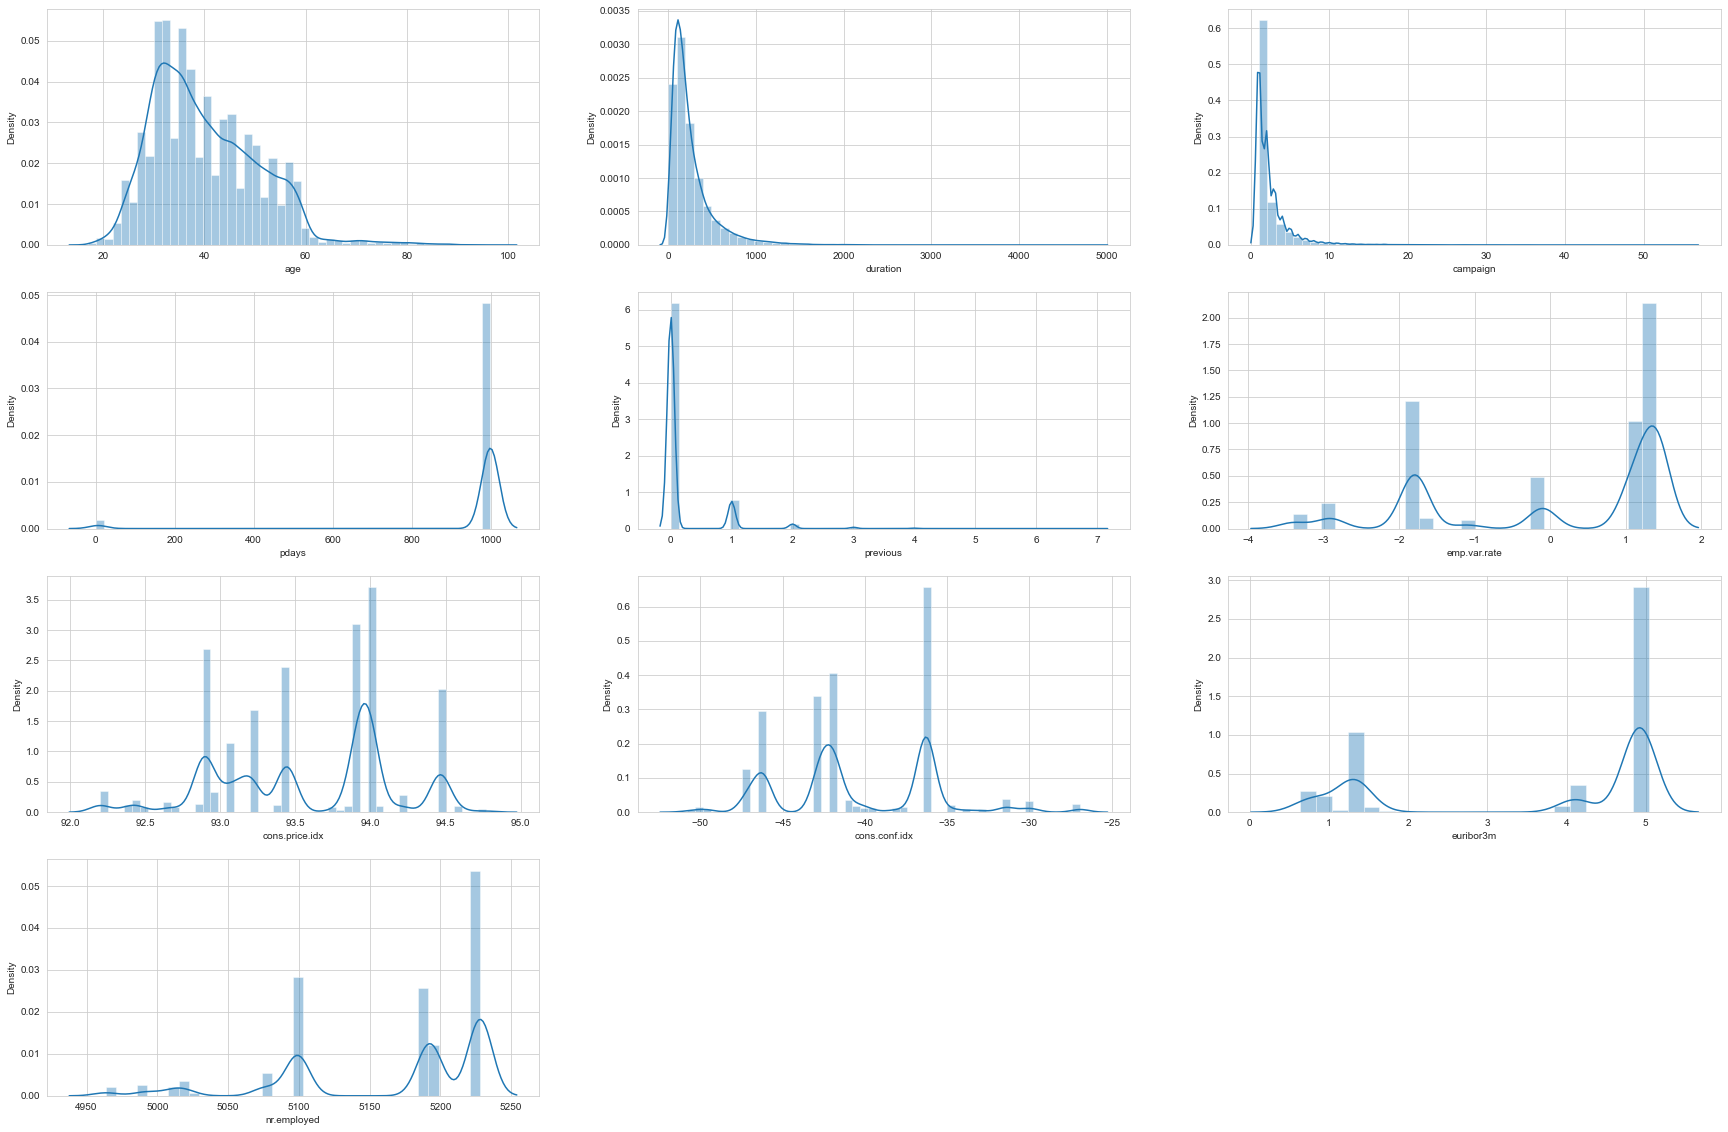

In [116]:
plt.figure(figsize=(30,20))
s=1
for p in numerical_columns:
    plt.subplot(4,3,s)
    sns.distplot(df_numerical[p])
    s+=1

### Treatment of Outliers by Powertransform :

In [64]:
pt=PowerTransformer()

In [65]:
bank_pwrtransformed_data_num=pd.DataFrame(pt.fit_transform(df_numerical),columns=df_numerical.columns)

In [66]:
bank_pwrtransformed_data_num.head()

age  duration  campaign     pdays  previous  emp.var.rate  \
0  1.427459  0.389913 -1.045497  0.195415 -0.397706      0.561017   
1  1.492292 -0.234770 -1.045497  0.195415 -0.397706      0.561017   
2 -0.158076  0.225113 -1.045497  0.195415 -0.397706      0.561017   
3  0.150155 -0.220434 -1.045497  0.195415 -0.397706      0.561017   
4  1.427459  0.579397 -1.045497  0.195415 -0.397706      0.561017   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0        0.700791       0.911782    0.71366     0.140827  
1        0.700791       0.911782    0.71366     0.140827  
2        0.700791       0.911782    0.71366     0.140827  
3        0.700791       0.911782    0.71366     0.140827  
4        0.700791       0.911782    0.71366     0.140827

#### Hence we have reduced the effect of outltiers.

## Graphical Representation after Outlier Treatment :

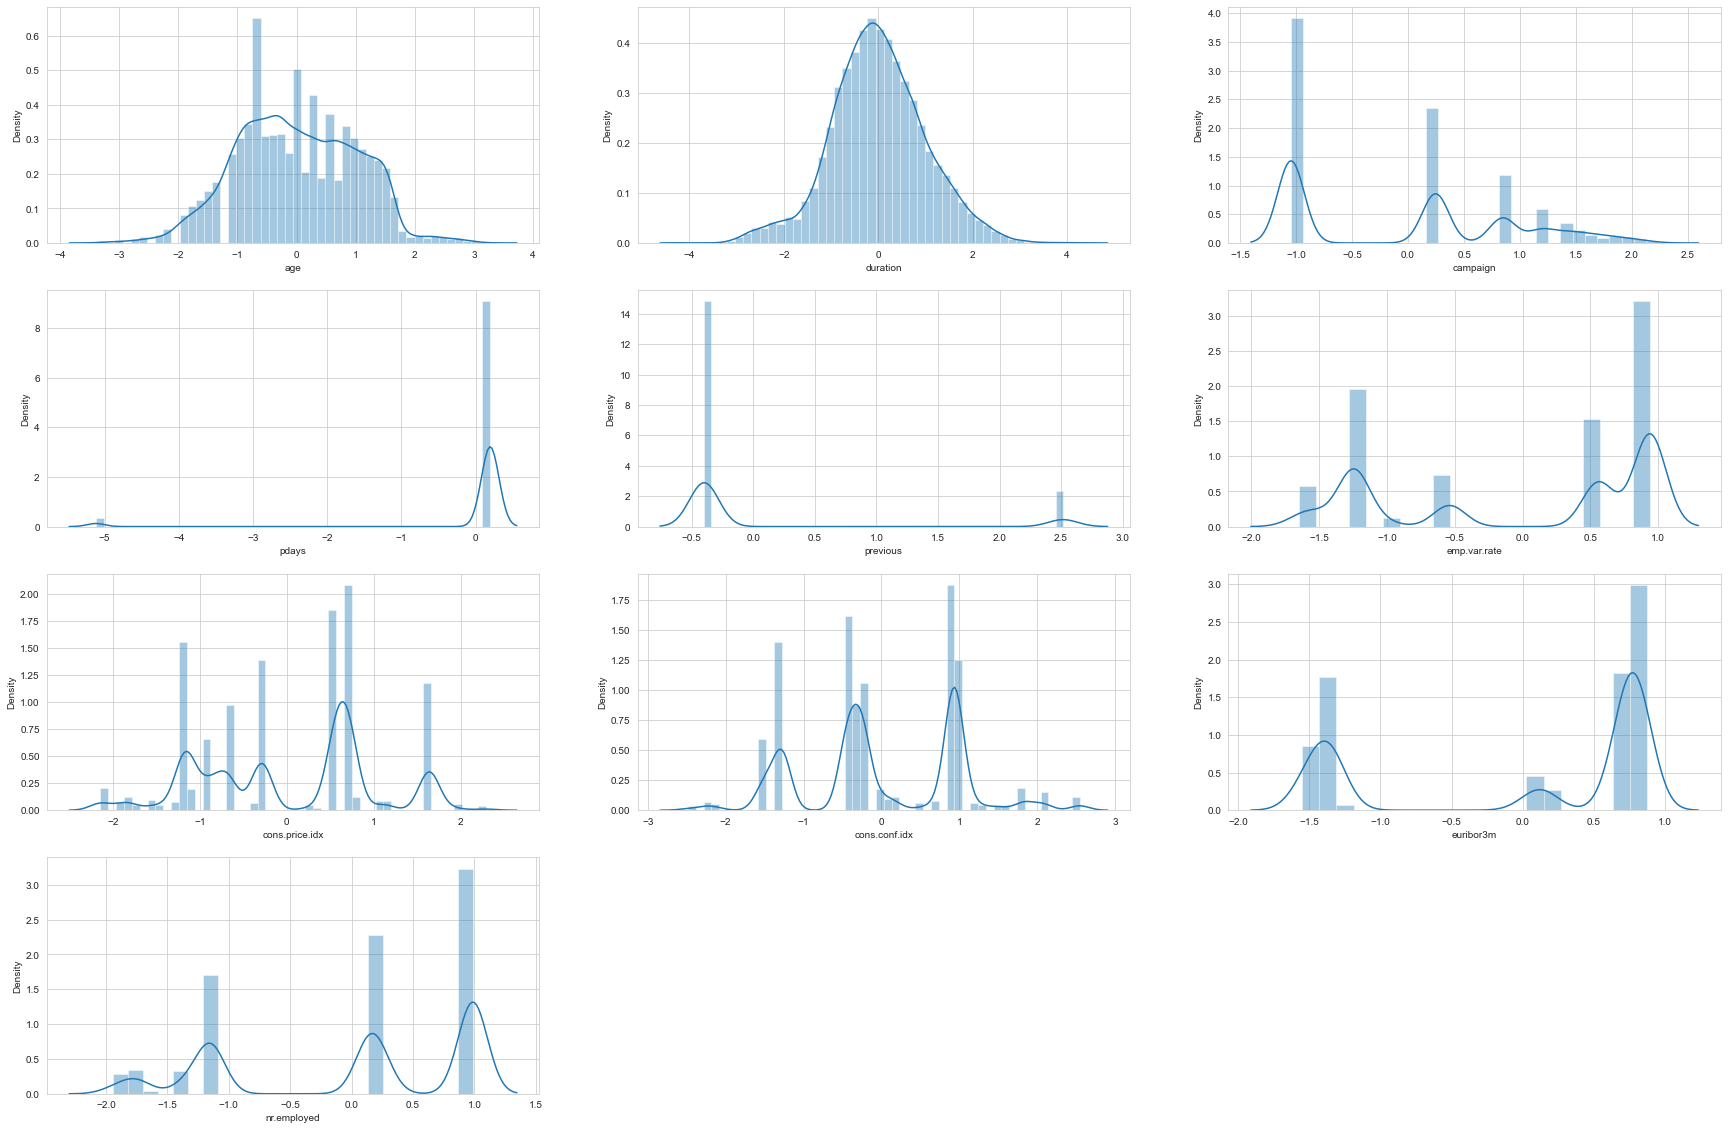

In [121]:
plt.figure(figsize=(30,20))
s=1
for p in bank_pwrtransformed_data:
    plt.subplot(4,3,s)
    sns.distplot(bank_pwrtransformed_data[p])
    s+=1

# Encoding the categorical variables:

In [79]:
df_categorical=df_categorical.drop('y',axis=1)
Encode=pd.get_dummies(data=df_categorical,drop_first=True)

In [91]:
bank_df['y']=bank_df['y'].astype(int)

#### Seperating the target variable and the dependent variables:

In [181]:
# Dependent variables:
X=bank_pwrtransformed_data_num

# Target variable:
y=bank_df[['y']].reset_index(drop=True)

In [182]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       41188 non-null  int64
dtypes: int64(1)
memory usage: 321.9 KB


#### Concatenating the powertransformed numerical features with One hot encoded categorical featues:

In [183]:
Encode=pd.get_dummies(data=df_categorical,drop_first=True)

# Concatenating the Encoded categorical attributes to the powertransformed numerical attributes:
X=pd.concat([pd.DataFrame(X),Encode],axis=1)

#### Removing features involved in multicollinearity uisng Variance Inflation Factor:

In [184]:
for i in range(len(X.columns)):
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['Features']=X.columns
    multi=vif[vif['VIF Factor']>10]
    if (multi.empty==False):
        bank_df_sorted=multi.sort_values(by='VIF Factor',ascending=False)
    else:
        print(vif)
        break
    if (bank_df_sorted.empty==False):
        X=X.drop(bank_df_sorted['Features'].iloc[0],axis=1)
    else:
        print(vif)

    VIF Factor                       Features
0     1.597147                            age
1     1.034927                       duration
2     1.049380                       campaign
3     1.588435                       previous
4     3.425051                 cons.price.idx
5     2.072703                  cons.conf.idx
6     3.978334                    nr.employed
7     2.739380                job_blue-collar
8     1.159562               job_entrepreneur
9     1.158598                  job_housemaid
10    1.323663                 job_management
11    1.412815                    job_retired
12    1.145820              job_self-employed
13    1.527863                   job_services
14    1.230786                    job_student
15    2.036574                 job_technician
16    1.112942                 job_unemployed
17    1.079085                    job_unknown
18    5.696048                marital_married
19    3.635407                 marital_single
20    1.020712                mari

In [185]:
# Checking the shape of the dependent dataset
X.shape

(41188, 48)

#### Splitting the data into training and testing set in the ratio (80:20):

In [186]:
rc=10      # Initialising the random state at 10.
X=sm.add_constant(X)        # Adding the constant.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=rc)

In [ ]:
###################################################################################################

# Predictive Modeling:

# Logit model summary for full model:

In [187]:
# using statsmodels:
logit_model=sm.Logit(y_train,X_train).fit()
logit_model.summary()

         Current function value: 0.194564
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                32950
Model:                          Logit   Df Residuals:                    32901
Method:                           MLE   Df Model:                           48
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                  0.4473
Time:                        22:53:09   Log-Likelihood:                -6410.9
converged:                      False   LL-Null:                       -11599.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -3.7327      0.166    -22.421      0.000      -4.059      -3.406
age                              -0.0541      0.029     -1.871      0.061      -0.111       0.003
duration                          1.8577      0.032     58.185      0.000       1.795       1.920
campaign                         -0.0921      0.025     -3.640      0.000      -0.142      -0.042
previous                         -0.1355      0.025     -5.475      0.000      -0.184      -0.087
cons.price.idx                    0.0663      0.030      2.247      0.025       0.008       0.124
cons.conf.idx                     0.1258      0.028      4.512      0.000       0.071       0.180
nr.employed                      -1.1888      0.035    -33.650      0.000      -1.258      -1.120
job_blue-collar                  -0.2335      0.090     -2.588      0.010      -0.410      -0.057
job_entrepreneur                 -0.0702      0.138     -0.508      0.611      -0.341       0.201
job_housemaid                     0.0851      0.165      0.515      0.607      -0.239       0.409
job_management                   -0.0994      0.097     -1.020      0.308      -0.290       0.092
job_retired                       0.3881      0.117      3.313      0.001       0.159       0.618
job_self-employed                -0.1164      0.134     -0.867      0.386      -0.379       0.147
job_services                     -0.2204      0.098     -2.250      0.024      -0.412      -0.028
job_student                       0.1592      0.136      1.173      0.241      -0.107       0.425
job_technician                    0.0143      0.081      0.176      0.860      -0.145       0.173
job_unemployed                    0.0403      0.150      0.268      0.789      -0.255       0.335
job_unknown                       0.1548      0.273      0.566      0.571      -0.381       0.691
marital_married                   0.0214      0.078      0.274      0.784      -0.132       0.175
marital_single                    0.0392      0.090      0.437      0.662      -0.137       0.215
marital_unknown                   0.1354      0.440      0.307      0.759      -0.728       0.998
education_basic.6y                0.1335      0.135      0.987      0.324      -0.132       0.399
education_basic.9y               -0.0196      0.106     -0.184      0.854      -0.228       0.189
education_high.school            -0.0064      0.104     -0.062      0.951      -0.210       0.197
education_illiterate              1.5637      0.858      1.822      0.068      -0.118       3.246
education_professional.course     0.0316      0.115      0.274      0.784      -0.194       0.258
education_university.degree       0.1664      0.104      1.594      0.111      -0.038       0.371
education_unknown                 0.1294      0.136      0.948      0.343      -0.138       0.397
default_unknown                  -0.2864      0.074     -3.884      0.000      -0.431      -0.142
default

# Statistical Analysis of the features:




#### Significant features affecting the model:

In [99]:
# If the p value for Wald test statistic is less than 0.05, we are considering the feature to 
# be significant.

significant=logit_model.pvalues[logit_model.pvalues<0.05]
significant_features=pd.DataFrame(data=significant,columns=['p-value'])
significant_features.drop('const',axis=0)

p-value
duration            0.000000e+00
campaign            2.727835e-04
previous            4.387419e-08
cons.price.idx      2.463176e-02
cons.conf.idx       6.412711e-06
nr.employed        3.095204e-248
job_blue-collar     9.657857e-03
job_retired         9.214482e-04
job_services        2.443395e-02
default_unknown     1.028651e-04
contact_telephone   1.299615e-03
month_aug           1.598328e-07
month_dec           2.842637e-02
month_jul           4.574387e-11
month_jun           3.620663e-12
month_mar           1.082864e-39
month_may           1.357845e-18
month_oct           6.661273e-05
poutcome_success    9.202047e-81

The following dependent variables contribute significantly to the overall model performance:

* duration
* campaign
* previous
* cons.price.idx
* cons.conf.idx
* nr.employed
* job_blue-collar
* job_retired
* job_services
* default_unknown
* contact_telephone
* month_aug
* month_dec
* month_jul
* month_jun
* month_mar
* month_may
* month_oct
* poutcome_success

#### Log odds value for each feature:

In [100]:
log_odds=round(logit_model.params,2)
log_odds_data=pd.DataFrame(log_odds,columns=['Log odds'])
log_odds_data.drop('const',axis=0)

Log odds
age                               -0.05
duration                           1.86
campaign                          -0.09
previous                          -0.14
cons.price.idx                     0.07
cons.conf.idx                      0.13
nr.employed                       -1.19
job_blue-collar                   -0.23
job_entrepreneur                  -0.07
job_housemaid                      0.09
job_management                    -0.10
job_retired                        0.39
job_self-employed                 -0.12
job_services                      -0.22
job_student                        0.16
job_technician                     0.01
job_unemployed                     0.04
job_unknown                        0.15
marital_married                    0.02
marital_single                     0.04
marital_unknown                    0.14
education_basic.6y                 0.13
education_basic.9y                -0.02
education_high.school             -0.01
education_illiterate               1.56
education_professional.course      0.03
education_university.degree        0.17
education_unknown                  0.13
default_unknown                   -0.29
default_yes                      -20.66
housing_yes                       -0.02
loan_unknown                      -0.03
loan_yes                          -0.02
contact_telephone                 -0.26
month_aug                          0.64
month_dec                          0.51
month_jul                          0.74
month_jun                          0.75
month_mar                          1.89
month_may                         -0.77
month_nov                          0.14
month_oct                          0.58
month_sep                          0.21
day_of_week_mon                   -0.05
day_of_week_thu                    0.06
day_of_week_tue                    0.10
day_of_week_wed                    0.11
poutcome_success                   1.93

#### Odds Value for each feature:

In [101]:
odds=round(np.exp(logit_model.params),2)
odds_data=pd.DataFrame(odds,columns=['Odds value'])
odds_data.sort_values(by='Odds value',ascending=False).drop('const',axis=0)

Odds value
poutcome_success                     6.90
month_mar                            6.63
duration                             6.41
education_illiterate                 4.78
month_jun                            2.12
month_jul                            2.10
month_aug                            1.90
month_oct                            1.78
month_dec                            1.66
job_retired                          1.47
month_sep                            1.23
education_university.degree          1.18
job_unknown                          1.17
job_student                          1.17
month_nov                            1.15
education_unknown                    1.14
marital_unknown                      1.14
education_basic.6y                   1.14
cons.conf.idx                        1.13
day_of_week_wed                      1.12
day_of_week_tue                      1.10
job_housemaid                        1.09
cons.price.idx                       1.07
day_of_week_thu                      1.06
marital_single                       1.04
job_unemployed                       1.04
education_professional.course        1.03
marital_married                      1.02
job_technician                       1.01
education_high.school                0.99
loan_yes                             0.98
education_basic.9y                   0.98
housing_yes                          0.98
loan_unknown                         0.97
day_of_week_mon                      0.95
age                                  0.95
job_entrepreneur                     0.93
job_management                       0.91
campaign                             0.91
job_self-employed                    0.89
previous                             0.87
job_services                         0.80
job_blue-collar                      0.79
contact_telephone                    0.77
default_unknown                      0.75
month_may                            0.46
nr.employed                          0.30
default_yes                          0.00

In [102]:
# Higher the odds value, greater is the relation of the feature with the target variable.

#### Model Evaluation : McFadden's R^2 value(Pseudo R^2)


In [103]:
accuracy=logit_model.prsquared
print('Logit model accuracy : ',accuracy)

Logit model accuracy :  0.44731193954881476


# Model Performance:

## Accuracy using Confusion Matrix:

#### Considering the probability threshold to be 0.5:

In [132]:
# Initializing the probability threshold:
th=0.5
ypred_prob=logit_model.predict(X_test)
ypred=[0 if p<th else 1 for p in ypred_prob]

# Computing the Confusion matrix:
confusion_mat=confusion_matrix(y_test,ypred)
tn = confusion_mat[0,0]
tp = confusion_mat[1,1]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
print('Confusion Matrix for Logit Model : ')
print('---------------------------------','\n')
print(confusion_mat)

Confusion Matrix for Logit Model : 
--------------------------------- 

[[7089  221]
 [ 544  384]]


#### Graphical Representation of Confusion Matrix:

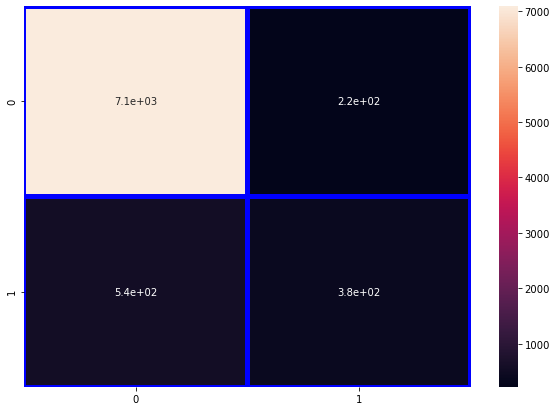

In [105]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### Calculating optimal value threshold for full model using the Youden's index:

In [106]:
# Computing the True Positive rate(TPR),False Positive rate(FPR) and probability threshold:
fpr, tpr, th= roc_curve(y_test, ypred_prob)

# Creating a Dataframe of the data:
youden= pd.DataFrame({'TPR': tpr,
                       'FPR': fpr,
                        'thres':th})

# Calculating the Younden's index:
youden['YI']= youden.TPR-youden.FPR
youden= youden.sort_values(by='YI',ascending=False).reset_index(drop=True)
print(youden.head(5))
print('-----------------------------------------','\n')
# or
print('Optimal threshold for probability: ',round(youden['YI'].max(),2))

        TPR       FPR     thres        YI
0  0.898707  0.151710  0.110695  0.746997
1  0.899784  0.152804  0.109174  0.746980
2  0.900862  0.153899  0.108453  0.746963
3  0.897629  0.151300  0.111410  0.746330
4  0.896552  0.150616  0.111762  0.745936
----------------------------------------- 

Optimal threshold for probability:  0.75


#### Considering the Optimal probability threshold:

In [112]:
# Initialising the optimal probability threshold:
opt_th=0.75
ypred_prob=logit_model.predict(X_test)
ypred_optimal=[0 if p<opt_th else 1 for p in ypred_prob]

# Computing the Confusion matrix:
confusion_mat_optimal=confusion_matrix(y_test,ypred_optimal)
tn = confusion_mat_optimal[0,0]
tp = confusion_mat_optimal[1,1]
fp = confusion_mat_optimal[0,1]
fn = confusion_mat_optimal[1,0]
print('Confusion Matrix from Logit Model : ')
print('------------------------------------','\n')
print(confusion_mat_optimal)

Confusion Matrix from Logit Model : 
------------------------------------ 

[[7225   85]
 [ 732  196]]


#### Graphical Representation of Confusion Matrix:

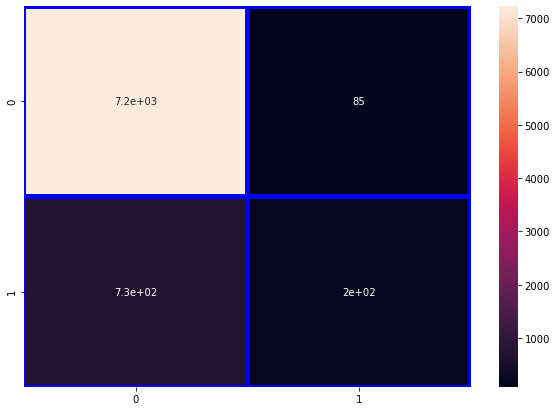

In [113]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat_optimal,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### Logit model accuracy from confusion matrix :

In [188]:
# For probability threshold as 0.5:
logit_model_accuracy_test=accuracy_score(y_test,ypred)
print('Logit model accuracy for test data using confusion matrix : ',logit_model_accuracy_test)

Logit model accuracy for test data using confusion matrix :  0.9071376547705754


In [189]:
# For optimal probability threshold as 0.75:
logit_model_optimal_accuracy=accuracy_score(y_test,ypred_optimal)
print('Logit model accuracy using confusion matrix : ',logit_model_optimal_accuracy)

Logit model accuracy using confusion matrix :  0.900825443068706


#### Logit model classification report:

In [190]:
# Computing the classification report:

logit_classification=classification_report(y_test,ypred)
print('Logit model classification report: ')
print('------------------------------------','\n')
print(logit_classification)

Logit model classification report: 
------------------------------------ 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.63      0.41      0.50       928

    accuracy                           0.91      8238
   macro avg       0.78      0.69      0.72      8238
weighted avg       0.90      0.91      0.90      8238



In [120]:
###################################################################################################

# 1. Logistic Regression Model using Scikit-learn:

In [191]:
# Logistic Regression Model using sklearn:
log_reg=LogisticRegression()
log_model=log_reg.fit(X_train,y_train)
ypred_lr_test=log_model.predict(X_test)
ypred_lr_train=log_model.predict(X_train)
ypred_lr_probability=log_model.predict_proba(X_test)[:,1]

## 1.a) Model Performance Evaluation:

#### 1.a).1. Confusion Matrix for Logistic Regression Model:


In [192]:
# Computing the Confusion matrix: 

confusion_mat=confusion_matrix(y_test,ypred_lr_test)
tn = confusion_mat[0,0]
tp = confusion_mat[1,1]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
print('Confusion Matrix form Logistic Regression Model : ')
print('------------------------------------------------','\n')
print(confusion_mat)

Confusion Matrix form Logistic Regression Model : 
------------------------------------------------ 

[[7089  221]
 [ 544  384]]


#### 1.a).2. Graphical Representation of Confusion Matrix:

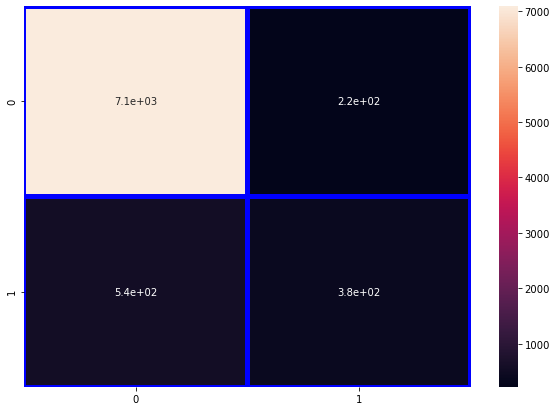

In [123]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### 1.a).3. Sensitivity and Specificity:


In [124]:
Sensitivity_Logistic=(tp/(tp+fn))
print('Sensitivity of the Logistic Regression Model: ')
print('---------------------------------------------','\n')
print(Sensitivity_Logistic)
print('\n')
Specificity_Logistic=(tn/(tn+fp))
print('Specificity of the Logistic Regression Model: ')
print('---------------------------------------------','\n')
print(Specificity_Logistic)

Sensitivity of the Logistic Regression Model: 
--------------------------------------------- 

0.41379310344827586


Specificity of the Logistic Regression Model: 
--------------------------------------------- 

0.9697674418604652


#### 1.a).4. Accuracy Analysis:

In [125]:
print('The Accuracy score of the test data for Logistic Regression model : ')
print(accuracy_score(y_test,ypred_lr_test),'\n')
print('The Accuracy score of the train data for Logistic Regression model : ')
print(accuracy_score(y_train,ypred_lr_train))

The Accuracy score of the test data for Logistic Regression model : 
0.9071376547705754 

The Accuracy score of the train data for Logistic Regression model : 
0.9129286798179059


#### 1.a).5. Logistic Regression model classification report:

In [130]:
# Computing the classification report:

logistic_report=classification_report(y_test,ypred_lr_test)
print('Logit model classification report: ')
print('------------------------------------','\n')
print(logistic_report)

Logit model classification report: 
------------------------------------ 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.63      0.41      0.50       928

    accuracy                           0.91      8238
   macro avg       0.78      0.69      0.72      8238
weighted avg       0.90      0.91      0.90      8238



#### 1.a).6. ROC Curve for Logistic Regression Model:

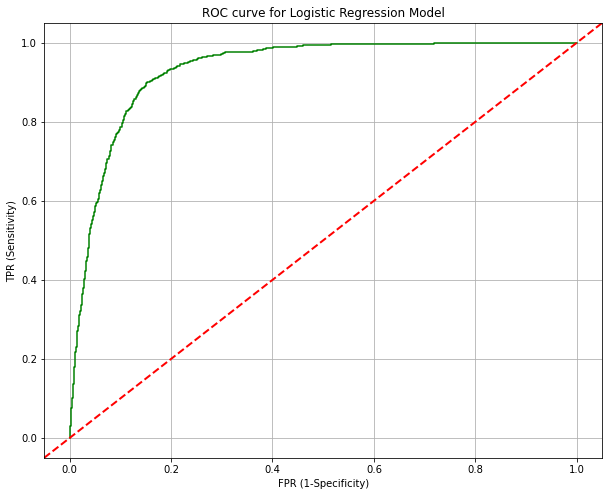

In [138]:
fpr,tpr,th=roc_curve(y_test,ypred_lr_probability)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='green')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('ROC curve for Logistic Regression Model')
plt.grid()
plt.plot([-0.05,1.05],[-0.05,1.05],'r--',linewidth=2)
plt.show()

#### 1.a).7. ROC AUC Score:

In [141]:
print('The ROC AUC score of the Logistic Regression model: ')
print('--------------------------------------------------- ','\n')
print('ROC AUC : ',roc_auc_score(y_test,ypred_lr_probability))

The ROC AUC score of the Logistic Regression model: 
---------------------------------------------------  

ROC AUC :  0.9315524906835226


#### 1.a).8. Cross Entropy:

In [142]:
cross_entropy=log_loss(y_test,ypred_lr_test)
print('The Cross Entropy score of the Logistic Regression model ')
print('--------------------------------------------------- ','\n')
print('Cross Entropy : ',cross_entropy)

The Cross Entropy score of the Logistic Regression model 
---------------------------------------------------  

Cross Entropy :  3.2073732281061846


## 1.b) Inferences for Logistic Regression Model:

* Cross Entropy for the Logistic Regression Model is 3.20


* ROC AUC Score for the Logistic Regression Model is 93.15


* The Model Accuracy for the Logistic Regression Model is coming out to be around 91%.


* f1 weighted avg for the Logistic Regression Model is around 90%.


* Specificity : 96.97%


* Sensitivity : 41.37%

In [143]:
###################################################################################################

# 2. K-Nearest Neighbors Classification Model using Scikit-learn:

In [193]:
# Classification Model using sklearn:
knn_algorithm=KNeighborsClassifier()
knn_model=knn_algorithm.fit(X_train,y_train)
ypred_knn_test=knn_model.predict(X_test)
ypred_knn_train=knn_model.predict(X_train)
ypred_probability_knn=knn_model.predict_proba(X_test)[:,1]

## 2.a) Model Performance Evaluation:


#### 2.a).1. Confusion Matrix for K-Nearest Neighbors Model:

In [194]:
# Computing the Confusion matrix:

knn_confusion_mat=confusion_matrix(y_test,ypred_knn_test)
tn = knn_confusion_mat[0,0]
tp = knn_confusion_mat[1,1]
fp = knn_confusion_mat[0,1]
fn = knn_confusion_mat[1,0]
print('Confusion Matrix for K-Nearest Neighbors Model : ')
print('------------------------------------------------','\n')
print(knn_confusion_mat)

Confusion Matrix for K-Nearest Neighbors Model : 
------------------------------------------------ 

[[7059  251]
 [ 572  356]]


#### 2.a).2. Graphical Representation of Confusion Matrix:

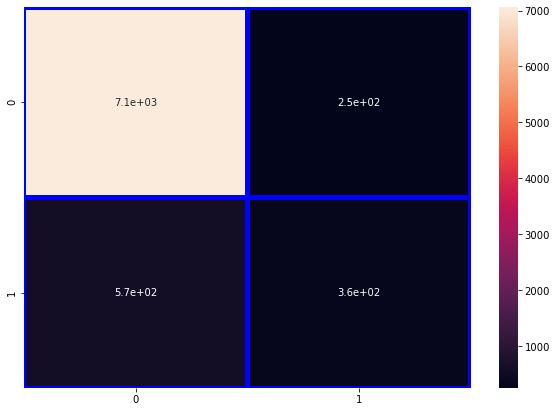

In [147]:
plt.figure(figsize=(10,7))
sns.heatmap(knn_confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### 2.a).3. Sensitivity and Specificity:


In [150]:
Sensitivity_KNN=(tp/(tp+fn))
print('Sensitivity of the KNN Model: ')
print('---------------------------------------------','\n')
print(Sensitivity_KNN)
print('\n')
Specificity_KNN=(tn/(tn+fp))
print('Specificity of the KNN Model: ')
print('---------------------------------------------','\n')
print(Specificity_KNN)

Sensitivity of the KNN Model: 
--------------------------------------------- 

0.38362068965517243


Specificity of the KNN Model: 
--------------------------------------------- 

0.9656634746922025


#### 2.a).4. Accuracy Analysis:

In [151]:
print('The Accuracy score of the test data for K-Nearest Neighbors Model : ')
print(accuracy_score(y_test,ypred_knn_test),'\n')
print('The Accuracy score of the train data for K-Nearest Neighbors Model : ')
print(accuracy_score(y_train,ypred_knn_train))

The Accuracy score of the test data for K-Nearest Neighbors Model : 
0.9000971109492595 

The Accuracy score of the train data for K-Nearest Neighbors Model : 
0.9298634294385433


#### 2.a).5. K-Nearest Neighbors Model classification report:

In [152]:
# Computing the classification report:

knn_report=classification_report(y_test,ypred_knn_test)
print('K-Nearest Neighbors Model classification report: ')
print('------------------------------------------------','\n')
print(knn_report)

K-Nearest Neighbors Model classification report: 
------------------------------------------------ 

              precision    recall  f1-score   support

           0       0.93      0.97      0.94      7310
           1       0.59      0.38      0.46       928

    accuracy                           0.90      8238
   macro avg       0.76      0.67      0.70      8238
weighted avg       0.89      0.90      0.89      8238



#### 2.a).6. ROC Curve for K-Nearest Neighbors Model:

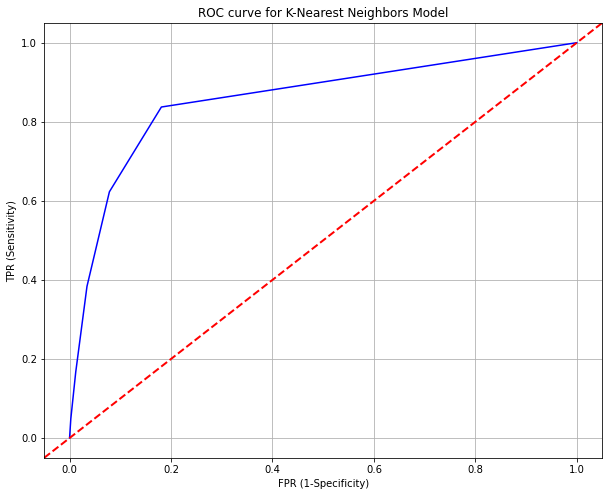

In [154]:
fpr,tpr,th=roc_curve(y_test,ypred_probability_knn)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='blue')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('ROC curve for K-Nearest Neighbors Model')
plt.grid()
plt.plot([-0.05,1.05],[-0.05,1.05],'r--',linewidth=2)
plt.show()

#### 2.a).7. ROC AUC Score:

In [155]:
print('The ROC AUC score of the K-Nearest Neighbors Model ')
print('--------------------------------------------------','\n')
print('ROC AUC : ',roc_auc_score(y_test,ypred_probability_knn))

The ROC AUC score of the K-Nearest Neighbors Model 
-------------------------------------------------- 

ROC AUC :  0.8566297348931553


#### 2.a).8. Cross Entropy:

In [156]:
cross_entropy=log_loss(y_test,ypred_knn_test)
print('The Cross Entropy score of K-Nearest Neighbors Model ')
print('----------------------------------------------------','\n')
print('Cross Entropy : ',cross_entropy)

The Cross Entropy score of K-Nearest Neighbors Model 
---------------------------------------------------- 

Cross Entropy :  3.450547908711638


## 2.b) Inferences for K-Nearest Neighbors Classification Model:

* Cross Entropy for K-Nearest Neighbors Model is 3.45


* ROC AUC Score for the K-Nearest Neighbors Model is 85.66 


* The Model Accuracy for the K-Nearest Neighbors Model is coming out to be around 90%.


* f1 weighted avg for the K-Nearest Neighbors Model is around 89%.


* Specificity : 97%


* Sensitivity : 38%


In [158]:
###################################################################################################

# 3. Decision Tree Classification Model using Scikit-learn:

In [223]:
# Classification Model using sklearn:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_test_dt=dt.predict(X_test)
y_pred_train_dt=dt.predict(X_train)
y_test_prob_dt=dt.predict_proba(X_test)[:,1]

## 3.a) Model Performance Evaluation:



#### 3.a).1. Confusion Matrix for Decision Tree classification:

In [225]:
# Computing the Confusion matrix:

dt_confusion_mat=confusion_matrix(y_test,y_pred_test_dt)
tn = dt_confusion_mat[0,0]
tp = dt_confusion_mat[1,1]
fp = dt_confusion_mat[0,1]
fn = dt_confusion_mat[1,0]
print('Confusion Matrix for Decision Tree Model : ')
print('------------------------------------------------','\n')
print(dt_confusion_mat)

Confusion Matrix for Decision Tree Model : 
------------------------------------------------ 

[[6812  498]
 [ 458  470]]


#### 3.a).2. Graphical Representation of Confusion Matrix:

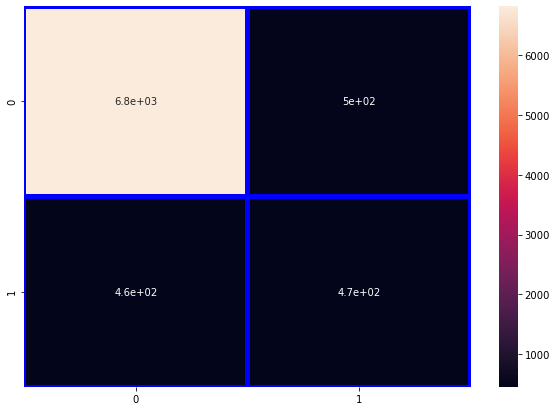

In [227]:
plt.figure(figsize=(10,7))
sns.heatmap(dt_confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### 3.a).3. Sensitivity and Specificity:

In [228]:
Sensitivity_Decision_tree=(tp/(tp+fn))
print('Sensitivity of the Decision Tree Model: ')
print('---------------------------------------------','\n')
print(Sensitivity_Decision_tree)
print('\n')
Specificity_Decision_tree=(tn/(tn+fp))
print('Specificity of the Decision Tree Model: ')
print('---------------------------------------------','\n')
print(Specificity_Decision_tree)

Sensitivity of the Decision Tree Model: 
--------------------------------------------- 

0.5064655172413793


Specificity of the Decision Tree Model: 
--------------------------------------------- 

0.93187414500684


#### 3.a).4. Accuracy Analysis:

In [229]:
print('The Accuracy score of test data for the Decision Tree Model: ')
print(accuracy_score(y_test,y_pred_test_dt),'\n')
print('The Accuracy score of the train data for the Decision Tree Model: ')
print(accuracy_score(y_train,y_pred_train_dt))

The Accuracy score of test data for the Decision Tree Model: 
0.8839524156348628 

The Accuracy score of the train data for the Decision Tree Model: 
1.0


#### 3.a).5. Decision Tree Model classification report:

In [230]:
# Computing the classification report:

dt_report=classification_report(y_test,y_pred_test_dt)
print('Decision Tree Model classification report: ')
print('-----------------------------------------','\n')
print(dt_report)

Decision Tree Model classification report: 
----------------------------------------- 

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7310
           1       0.49      0.51      0.50       928

    accuracy                           0.88      8238
   macro avg       0.71      0.72      0.72      8238
weighted avg       0.89      0.88      0.89      8238



#### 3.a).6. ROC Curve for Decision Tree Model:

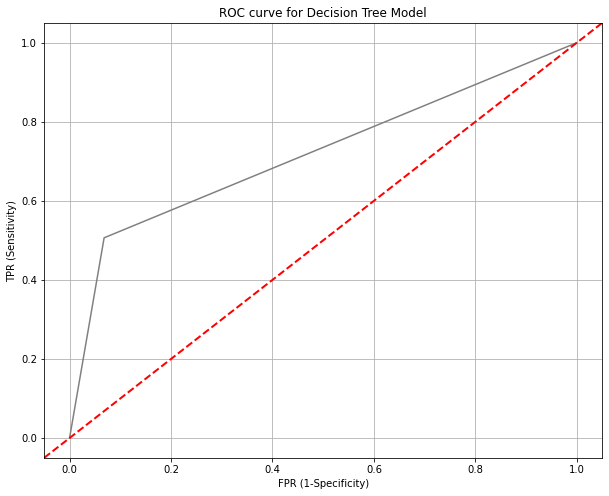

In [231]:
fpr,tpr,th=roc_curve(y_test,y_test_prob_dt)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='grey')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('ROC curve for Decision Tree Model')
plt.grid()
plt.plot([-0.05,1.05],[-0.05,1.05],'r--',linewidth=2)
plt.show()

#### 3.a).7. ROC AUC Score:

In [232]:
print('The ROC AUC score of the Decision Tree Model ')
print('--------------------------------------------------','\n')
print('ROC AUC : ',roc_auc_score(y_test,y_test_prob_dt))

The ROC AUC score of the Decision Tree Model 
-------------------------------------------------- 

ROC AUC :  0.7191698311241097


#### 3.a).7. Cross Entropy:

In [233]:
cross_entropy=log_loss(y_test,y_pred_test_dt)
print('The Cross Entropy score of Decision Tree Model ')
print('----------------------------------------------------','\n')
print('Cross Entropy : ',cross_entropy)

The Cross Entropy score of Decision Tree Model 
---------------------------------------------------- 

Cross Entropy :  4.008189904473762


# 3.b) Inferences for Decision Tree Classification Model:

* The Cross entropy for the Decision Tree model is 4.01


* ROC AUC Score for the Decision Tree Model is 71.91


* The Model Accuracy for the Decision Tree Model is coming out to be around 88%.


* f1 weighted avg for the Decision Tree Model is around 89%.


* Specificity : 93.18%


* Sensitivity : 50.64%

In [234]:
###################################################################################################

                                     Overall Inference: 

# Tabular representation of derived Inferences:


## Model Comparison:

In [235]:
# Initializing the structure of the table:

columns=['Overall Accuracy Score','Accuracy for train data','Accuracy for test data','Specificity',
         'Sensitivity','f1 score weighted avg','ROC AUC Score','Cross Entropy']
indexes=['Logistic Regresion Model','K-Nearest Neighbors Model','Descision Tree Model']

In [236]:
# Creating a Dataframe for compariosn of Models:
model_data=pd.DataFrame(columns=columns,index=indexes)

# Inserting observed readings to the data fields:
model_data['Overall Accuracy Score']=['91%','90%','88%']
model_data['Accuracy for train data']=['91.29%','92.98%','100%']
model_data['Accuracy for test data']=['90.71%','90.00%','88.39%']
model_data['Specificity']=['96.97%','96.56%','93.18%']
model_data['Sensitivity']=['41.37%','38%','50.64%']
model_data['f1 score weighted avg']=['90%','89%','89%']
model_data['ROC AUC Score']=[93.15,85.66,71.91]
model_data['Cross Entropy']=[3.20,3.45,4.01]
model_data

Overall Accuracy Score Accuracy for train data  \
Logistic Regresion Model                     91%                  91.29%   
K-Nearest Neighbors Model                    90%                  92.98%   
Descision Tree Model                         88%                    100%   

                          Accuracy for test data Specificity Sensitivity  \
Logistic Regresion Model                  90.71%      96.97%      41.37%   
K-Nearest Neighbors Model                 90.00%      96.56%         38%   
Descision Tree Model                      88.39%      93.18%      50.64%   

                          f1 score weighted avg  ROC AUC Score  Cross Entropy  
Logistic Regresion Model                    90%          93.15           3.20  
K-Nearest Neighbors Model                   89%          85.66           3.45  
Descision Tree Model                        89%          71.91           4.01

# Inferences based on model comparison:

#### 1. Overall Accuracy Score: 

    1. Logistic Regression Model has the highest overall accuracy of about 91%.

    2. Decision Tree Model yeilds the lowest overall model accuracy of about 88%.

#### 2. Overfitting/Underfitting:

    1. All the classification models exhibit overfitting of the trained data with respect to the test data.

    2. The model accuracy for train data and test data for both Logistic Regression Model and K-Nearest Neighbors Model has very less overfitting.
    
    3. As observed,the model accuracy for train data and test data for the Decision Tree Model has a considerably high difference in accuracies which can be considered a high overfitting condition in comparison to other models.

#### 3. f1 score weighted avg:

    1. The Logistic Regression Model has the highest weighted harmonic mean between precison and recall of about 90% based on the classification report.
    
    2. Both K-Nearest Neighbors Model and Descision Tree Model have nearly similar weighted harmonic mean between precison and recall of about 89%.
    
    3. We can further look at the recall values of the positive class and negative class to get more insights on the specificity and sensitivity.

#### Sensitivity and Specificity:

    1. Logistic Regression Model :
      * Specificity = 96.97%
      * Sensitivity = 41.37% 
    
    2. K-Nearest Neigbors Model :
      * Specificity = 96.56%
      * Sensitivity = 38% 
    
    3. Decision Tree Model :
      * Specificity = 93.18%
      * Sensitivity = 50.64% 

#### 5. ROC AUC Score:

    1. The Logistic Regression Model has the maximum area under the ROC curve with a ROC AUC Score of 93.15.
    
    2. The Decision Tree Model has the minimum area under the ROC curve with a ROC AUC Score of 71.91.

#### 6. Cross Entropy:

    1. Minimum Cross Entropy score for Logistic Regression model : 
    H_logistic(y) = 3.20
    
    2. Maximum Cross Entropy score for Decision Tree Model : 
    H_Decisiontree(y) = 4.01